In [18]:
options(repr.matrix.max.cols=107, repr.matrix.max.rows=100)

In [19]:
library(tidyverse)
library(data.table)
library(ggplot2)

In [20]:
plotdir <- '/home/kpettie/code/github/plotting'
source(file.path(plotdir,"plotting.R"))

In [21]:
fontdir <- '/cashew/shared_data/fonts'
extrafont::font_import(path=fontdir, prompt=FALSE)
extrafont::choose_font('Arial')

Scanning ttf files in /cashew/shared_data/fonts ...

Extracting .afm files from .ttf files...

/cashew/shared_data/fonts/ArialMT.ttf
 : ArialMT already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /opt/modules/pkgs/R/4.1.0/lib/R/library/extrafontdb/metrics



[1] "Arial"

In [22]:
outdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/noCEU'
suppdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/noCEU/supp'

# Fig. 3

In [23]:
# bfe_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/050722output/aggregate/allZerosFilt.meanQN.16.AFR_EUR.diff.allComponents.diffQTLoverlap.fisherEnrichmentsAgg.txt'
# bfw_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/050722output/aggregate/allZerosFilt.meanQN.16.AFR_EUR.diff.allComponents.diffQTLoverlap.fstWilcoxDataAgg.txt.gz'
bfe_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/190922outputNoCEU/aggregate/allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.diffQTLoverlap.fisherEnrichmentsAgg.txt'
bfw_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/190922outputNoCEU/aggregate/allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.diffQTLoverlap.fstWilcoxDataAgg.txt.gz'

bfe <- read_tsv(bfe_fname) %>% 
    mutate(fst_percentile = as_factor(fst_percentile))
bfw <- read_tsv(bfw_fname)

Rows: 665 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): test_type, qtl_type, score_type, cre_type, de_celltype, chip_type
dbl (14): qtl_significance, diff_significance, odds_ratio, pvalue, conf_lowe...
lgl  (1): self_promoter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 49132 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (10): seqnames, name, class, qtl_dir, abc_dir, diff_status, cre_type, qt...
dbl  (9): start, end, qtl_p, abc_p, atac_lfc, chip_lfc, hic_lfc, fst_var, di...
lgl  (1): isSelfPromoter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
bfw <- bfw %>% 
    mutate(cre_type = if_else(cre_type=='promoter','promoter','enhancer'),
           score_type = case_when(score_type=='ABC' ~ 'ABC',
                                  score_type=='atac' ~ 'ATAC',
                                  score_type=='chip' ~ 'ChIP',
                                  score_type=='hic' ~ 'HiC'))
bfe <- bfe %>% 
    mutate(cre_type = case_when(cre_type=='promoter' ~ 'promoter',
                                cre_type=='non-promoter' ~ 'enhancer',
                                cre_type=='all' ~ 'all'),
           score_type = case_when(score_type=='ABC' ~ 'ABC',
                                  score_type=='atac' ~ 'ATAC',
                                  score_type=='chip' ~ 'ChIP',
                                  score_type=='hic' ~ 'HiC'))
bfe <- bfe %>% 
    mutate(fst_percentile=if_else(fst_percentile=='0.95', 'top 5% FST', 'all FST'))


In [25]:
bfe <- bfe %>% 
    mutate(chip_type = case_when(chip_type=='nfkB' ~ "NF-\u03baB",
                               chip_type=='stat1' ~ "Stat1",
                               chip_type=='oct1' ~ "Oct1",
                               chip_type=='h3k4me3' ~ "H3K4me3",
                               chip_type=='pu1' ~ "PU.1",
                               chip_type=='junD' ~ "JunD",
                               chip_type=='ctcf' ~ "CTCF"))

In [26]:
bfw <- bfw %>% 
    mutate(chip_type = case_when(chip_type=='nfkB' ~ "NF-\u03baB",
                               chip_type=='stat1' ~ "Stat1",
                               chip_type=='oct1' ~ "Oct1",
                               chip_type=='h3k4me3' ~ "H3K4me3",
                               chip_type=='pu1' ~ "PU.1",
                               chip_type=='junD' ~ "JunD",
                               chip_type=='ctcf' ~ "CTCF"))

## a

In [11]:
bfe %>%
                      dplyr::filter(!is.na(chip_type),
                                    test_type=='diffQTL',
                                    cre_type=='all')

qtl_significance diff_significance odds_ratio pvalue       conf_lower
1  0.05             0.05              1.1348803  5.200720e-02 0.9985307 
2  0.05             0.05              1.0679109  1.808077e-01 0.9504212 
3  0.05             0.05              1.0859803  2.208464e-01 0.9150720 
4  0.05             0.05              1.2921504  9.427062e-05 1.1523938 
5  0.05             0.05              1.2678301  5.350094e-05 1.1450453 
6  0.05             0.05              0.9813020  6.015956e-01 0.8443858 
7  0.05             0.05              1.0349713  3.232684e-01 0.9207028 
8  0.05             0.05              1.3012882  2.070939e-05 1.1693232 
9  0.05             0.05              0.9501812  7.221807e-01 0.8102200 
10 0.05             0.05              1.1346357  4.923959e-02 1.0005539 
11 0.05             0.05              1.1044030  8.011930e-02 0.9835050 
12 0.05             0.05              1.1355175  1.043740e-01 0.9628200 
13 0.05             0.05              1.2785877  2.166863e-04 1.1382008 
14 0.05             0.05              1.1252789  3.149699e-02 1.0134714 
15 0.05             0.05              0.9948655  5.409679e-01 0.8558782 
16 0.05             0.05              1.1960698  2.940674e-02 1.0230041 
17 0.05             0.05              0.9669413  6.652689e-01 0.8338299 
18 0.05             0.05              1.2871056  2.029197e-02 1.0501106 
   conf_upper up_up up_down down_up down_down test_type qtl_type score_type
1  Inf         435   722     731    1377      diffQTL   bqtl     ChIP      
2  Inf         611   646    1154    1303      diffQTL   bqtl     ATAC      
3  Inf         198   732     334    1341      diffQTL   bqtl     HiC       
4  Inf         867  1404     529    1107      diffQTL   bqtl     ChIP      
5  Inf        1223  1206     875    1094      diffQTL   bqtl     ATAC      
6  Inf         358  1436     282    1110      diffQTL   bqtl     HiC       
7  Inf         623  1101     661    1209      diffQTL   bqtl     ChIP      
8  Inf         895   872     989    1254      diffQTL   bqtl     ATAC      
9  Inf         254  1096     310    1271      diffQTL   bqtl     HiC       
10 Inf         479   814     669    1290      diffQTL   bqtl     ChIP      
11 Inf         655   684    1050    1211      diffQTL   bqtl     ATAC      
12 Inf         231   822     318    1285      diffQTL   bqtl     HiC       
13 Inf         795  1270     539    1101      diffQTL   bqtl     ChIP      
14 Inf        1030  1111     898    1090      diffQTL   bqtl     ATAC      
15 Inf         341  1264     301    1110      diffQTL   bqtl     HiC       
16 Inf         243   382     861    1619      diffQTL   bqtl     ChIP      
17 Inf         304   337    1349    1446      diffQTL   bqtl     ATAC      
18 Inf         121   376     395    1580      diffQTL   bqtl     HiC       
   cre_type fst_percentile de_celltype self_promoter n_success n_trials
1  all      all FST        NA          NA            NA        NA      
2  all      all FST        NA          NA            NA        NA      
3  all      all FST        NA          NA            NA        NA      
4  all      all FST        NA          NA            NA        NA      
5  all      all FST        NA          NA            NA        NA      
6  all      all FST        NA          NA            NA        NA      
7  all      all FST        NA          NA            NA        NA      
8  all      all FST        NA          NA            NA        NA      
9  all      all FST        NA          NA            NA        NA      
10 all      all FST        NA          NA            NA        NA      
11 all      all FST        NA          NA            NA        NA      
12 all      all FST        NA          NA            NA        NA      
13 all      all FST        NA          NA            NA        NA      
14 all      all FST        NA          NA            NA        NA      
15 all      all FST        NA          NA            NA        NA      
16 all      all FST 

In [12]:
bfe %>%
    dplyr::filter(!is.na(chip_type),
                test_type=='diffQTL') %>% 
    arrange(pvalue)

qtl_significance diff_significance odds_ratio pvalue       conf_lower
1  0.05             0.05              1.4510268  8.800743e-07 1.2738385 
2  0.05             0.05              1.3012882  2.070939e-05 1.1693232 
3  0.05             0.05              1.3837301  4.569302e-05 1.2046071 
4  0.05             0.05              1.2678301  5.350094e-05 1.1450453 
5  0.05             0.05              1.4190783  7.515960e-05 1.2158242 
6  0.05             0.05              1.2921504  9.427062e-05 1.1523938 
7  0.05             0.05              1.2785877  2.166863e-04 1.1382008 
8  0.05             0.05              1.3481928  4.875889e-04 1.1587593 
9  0.05             0.05              1.4252558  3.567818e-03 1.1447669 
10 0.05             0.05              1.3057025  4.890875e-03 1.0999078 
11 0.05             0.05              1.2332122  5.506467e-03 1.0755265 
12 0.05             0.05              1.2492780  8.725743e-03 1.0695402 
13 0.05             0.05              1.2615707  1.842996e-02 1.0493830 
14 0.05             0.05              1.2871056  2.029197e-02 1.0501106 
15 0.05             0.05              1.2043603  2.293451e-02 1.0325516 
16 0.05             0.05              1.1960698  2.940674e-02 1.0230041 
17 0.05             0.05              1.1252789  3.149699e-02 1.0134714 
18 0.05             0.05              1.2204853  3.253726e-02 1.0211551 
19 0.05             0.05              1.2097937  3.420114e-02 1.0181985 
20 0.05             0.05              1.1346357  4.923959e-02 1.0005539 
21 0.05             0.05              1.1348803  5.200720e-02 0.9985307 
22 0.05             0.05              1.3094551  5.743493e-02 0.9888307 
23 0.05             0.05              1.1785342  6.089029e-02 0.9900347 
24 0.05             0.05              1.1044030  8.011930e-02 0.9835050 
25 0.05             0.05              1.2204714  9.735857e-02 0.9505742 
26 0.05             0.05              1.1355175  1.043740e-01 0.9628200 
27 0.05             0.05              1.0679109  1.808077e-01 0.9504212 
28 0.05             0.05              1.1234307  1.975992e-01 0.9039492 
29 0.05             0.05              1.0859803  2.208464e-01 0.9150720 
30 0.05             0.05              1.1326414  2.229090e-01 0.8745931 
31 0.05             0.05              1.0901954  2.248808e-01 0.9097402 
32 0.05             0.05              1.1329843  2.697955e-01 0.8265785 
33 0.05             0.05              1.0349713  3.232684e-01 0.9207028 
34 0.05             0.05              1.0492158  3.338395e-01 0.8855650 
35 0.05             0.05              1.0641316  3.528800e-01 0.8398075 
36 0.05             0.05              1.0364174  3.775119e-01 0.8766305 
37 0.05             0.05              1.0429555  3.905497e-01 0.8435874 
38 0.05             0.05              1.0206459  4.385038e-01 0.8616389 
39 0.05             0.05              1.0188304  4.692419e-01 0.8101796 
40 0.05             0.05              1.0066184  4.978182e-01 0.8349757 
41 0.05             0.05              1.0014483  5.209844e-01 0.7953319 
42 0.05             0.05              0.9948655  5.409679e-01 0.8558782 
43 0.05             0.05              0.9842087  5.773279e-01 0.8047041 
44 0.05             0.05              0.9813020  6.015956e-01 0.8443858 
45 0.05             0.05              0.9659349  6.272450e-01 0.7657343 
46 0.05             0.05              0.9698724  6.333649e-01 0.8097332 
47 0.05             0.05              0.9669413  6.652689e-01 0.8338299 
48 0.05             0.05              0.9423733  7.218557e-01 0.7795987 
49 0.05             0.05              0.9501812  7.221807e-01 0.8102200 
50 0.05             0.05              0.9130661  7.625233e-01 0.7164238 
51 0.05             0.05              0.9216228  7.738600e-01 0.7538774 
52 0.05             0.05              0.9096818  7.957431e-01 0.7361778 
53 0.05             0.05              0.8143291  9.321337e-01 0.6346288 
54 0.05             0.05              0.8347878  9.575661e-01

In [13]:
bfe %>%
    dplyr::filter(!is.na(chip_type),
                test_type=='diffQTL') %>% 
    arrange(desc(odds_ratio))

qtl_significance diff_significance odds_ratio pvalue       conf_lower
1  0.05             0.05              1.4510268  8.800743e-07 1.2738385 
2  0.05             0.05              1.4252558  3.567818e-03 1.1447669 
3  0.05             0.05              1.4190783  7.515960e-05 1.2158242 
4  0.05             0.05              1.3837301  4.569302e-05 1.2046071 
5  0.05             0.05              1.3481928  4.875889e-04 1.1587593 
6  0.05             0.05              1.3094551  5.743493e-02 0.9888307 
7  0.05             0.05              1.3057025  4.890875e-03 1.0999078 
8  0.05             0.05              1.3012882  2.070939e-05 1.1693232 
9  0.05             0.05              1.2921504  9.427062e-05 1.1523938 
10 0.05             0.05              1.2871056  2.029197e-02 1.0501106 
11 0.05             0.05              1.2785877  2.166863e-04 1.1382008 
12 0.05             0.05              1.2678301  5.350094e-05 1.1450453 
13 0.05             0.05              1.2615707  1.842996e-02 1.0493830 
14 0.05             0.05              1.2492780  8.725743e-03 1.0695402 
15 0.05             0.05              1.2332122  5.506467e-03 1.0755265 
16 0.05             0.05              1.2204853  3.253726e-02 1.0211551 
17 0.05             0.05              1.2204714  9.735857e-02 0.9505742 
18 0.05             0.05              1.2097937  3.420114e-02 1.0181985 
19 0.05             0.05              1.2043603  2.293451e-02 1.0325516 
20 0.05             0.05              1.1960698  2.940674e-02 1.0230041 
21 0.05             0.05              1.1785342  6.089029e-02 0.9900347 
22 0.05             0.05              1.1355175  1.043740e-01 0.9628200 
23 0.05             0.05              1.1348803  5.200720e-02 0.9985307 
24 0.05             0.05              1.1346357  4.923959e-02 1.0005539 
25 0.05             0.05              1.1329843  2.697955e-01 0.8265785 
26 0.05             0.05              1.1326414  2.229090e-01 0.8745931 
27 0.05             0.05              1.1252789  3.149699e-02 1.0134714 
28 0.05             0.05              1.1234307  1.975992e-01 0.9039492 
29 0.05             0.05              1.1044030  8.011930e-02 0.9835050 
30 0.05             0.05              1.0901954  2.248808e-01 0.9097402 
31 0.05             0.05              1.0859803  2.208464e-01 0.9150720 
32 0.05             0.05              1.0679109  1.808077e-01 0.9504212 
33 0.05             0.05              1.0641316  3.528800e-01 0.8398075 
34 0.05             0.05              1.0492158  3.338395e-01 0.8855650 
35 0.05             0.05              1.0429555  3.905497e-01 0.8435874 
36 0.05             0.05              1.0364174  3.775119e-01 0.8766305 
37 0.05             0.05              1.0349713  3.232684e-01 0.9207028 
38 0.05             0.05              1.0206459  4.385038e-01 0.8616389 
39 0.05             0.05              1.0188304  4.692419e-01 0.8101796 
40 0.05             0.05              1.0066184  4.978182e-01 0.8349757 
41 0.05             0.05              1.0014483  5.209844e-01 0.7953319 
42 0.05             0.05              0.9948655  5.409679e-01 0.8558782 
43 0.05             0.05              0.9842087  5.773279e-01 0.8047041 
44 0.05             0.05              0.9813020  6.015956e-01 0.8443858 
45 0.05             0.05              0.9698724  6.333649e-01 0.8097332 
46 0.05             0.05              0.9669413  6.652689e-01 0.8338299 
47 0.05             0.05              0.9659349  6.272450e-01 0.7657343 
48 0.05             0.05              0.9501812  7.221807e-01 0.8102200 
49 0.05             0.05              0.9423733  7.218557e-01 0.7795987 
50 0.05             0.05              0.9216228  7.738600e-01 0.7538774 
51 0.05             0.05              0.9130661  7.625233e-01 0.7164238 
52 0.05             0.05              0.9096818  7.957431e-01 0.7361778 
53 0.05             0.05              0.8347878  9.575661e-01 0.6943955 
54 0.05             0.05              0.8143291  9.321337e-01

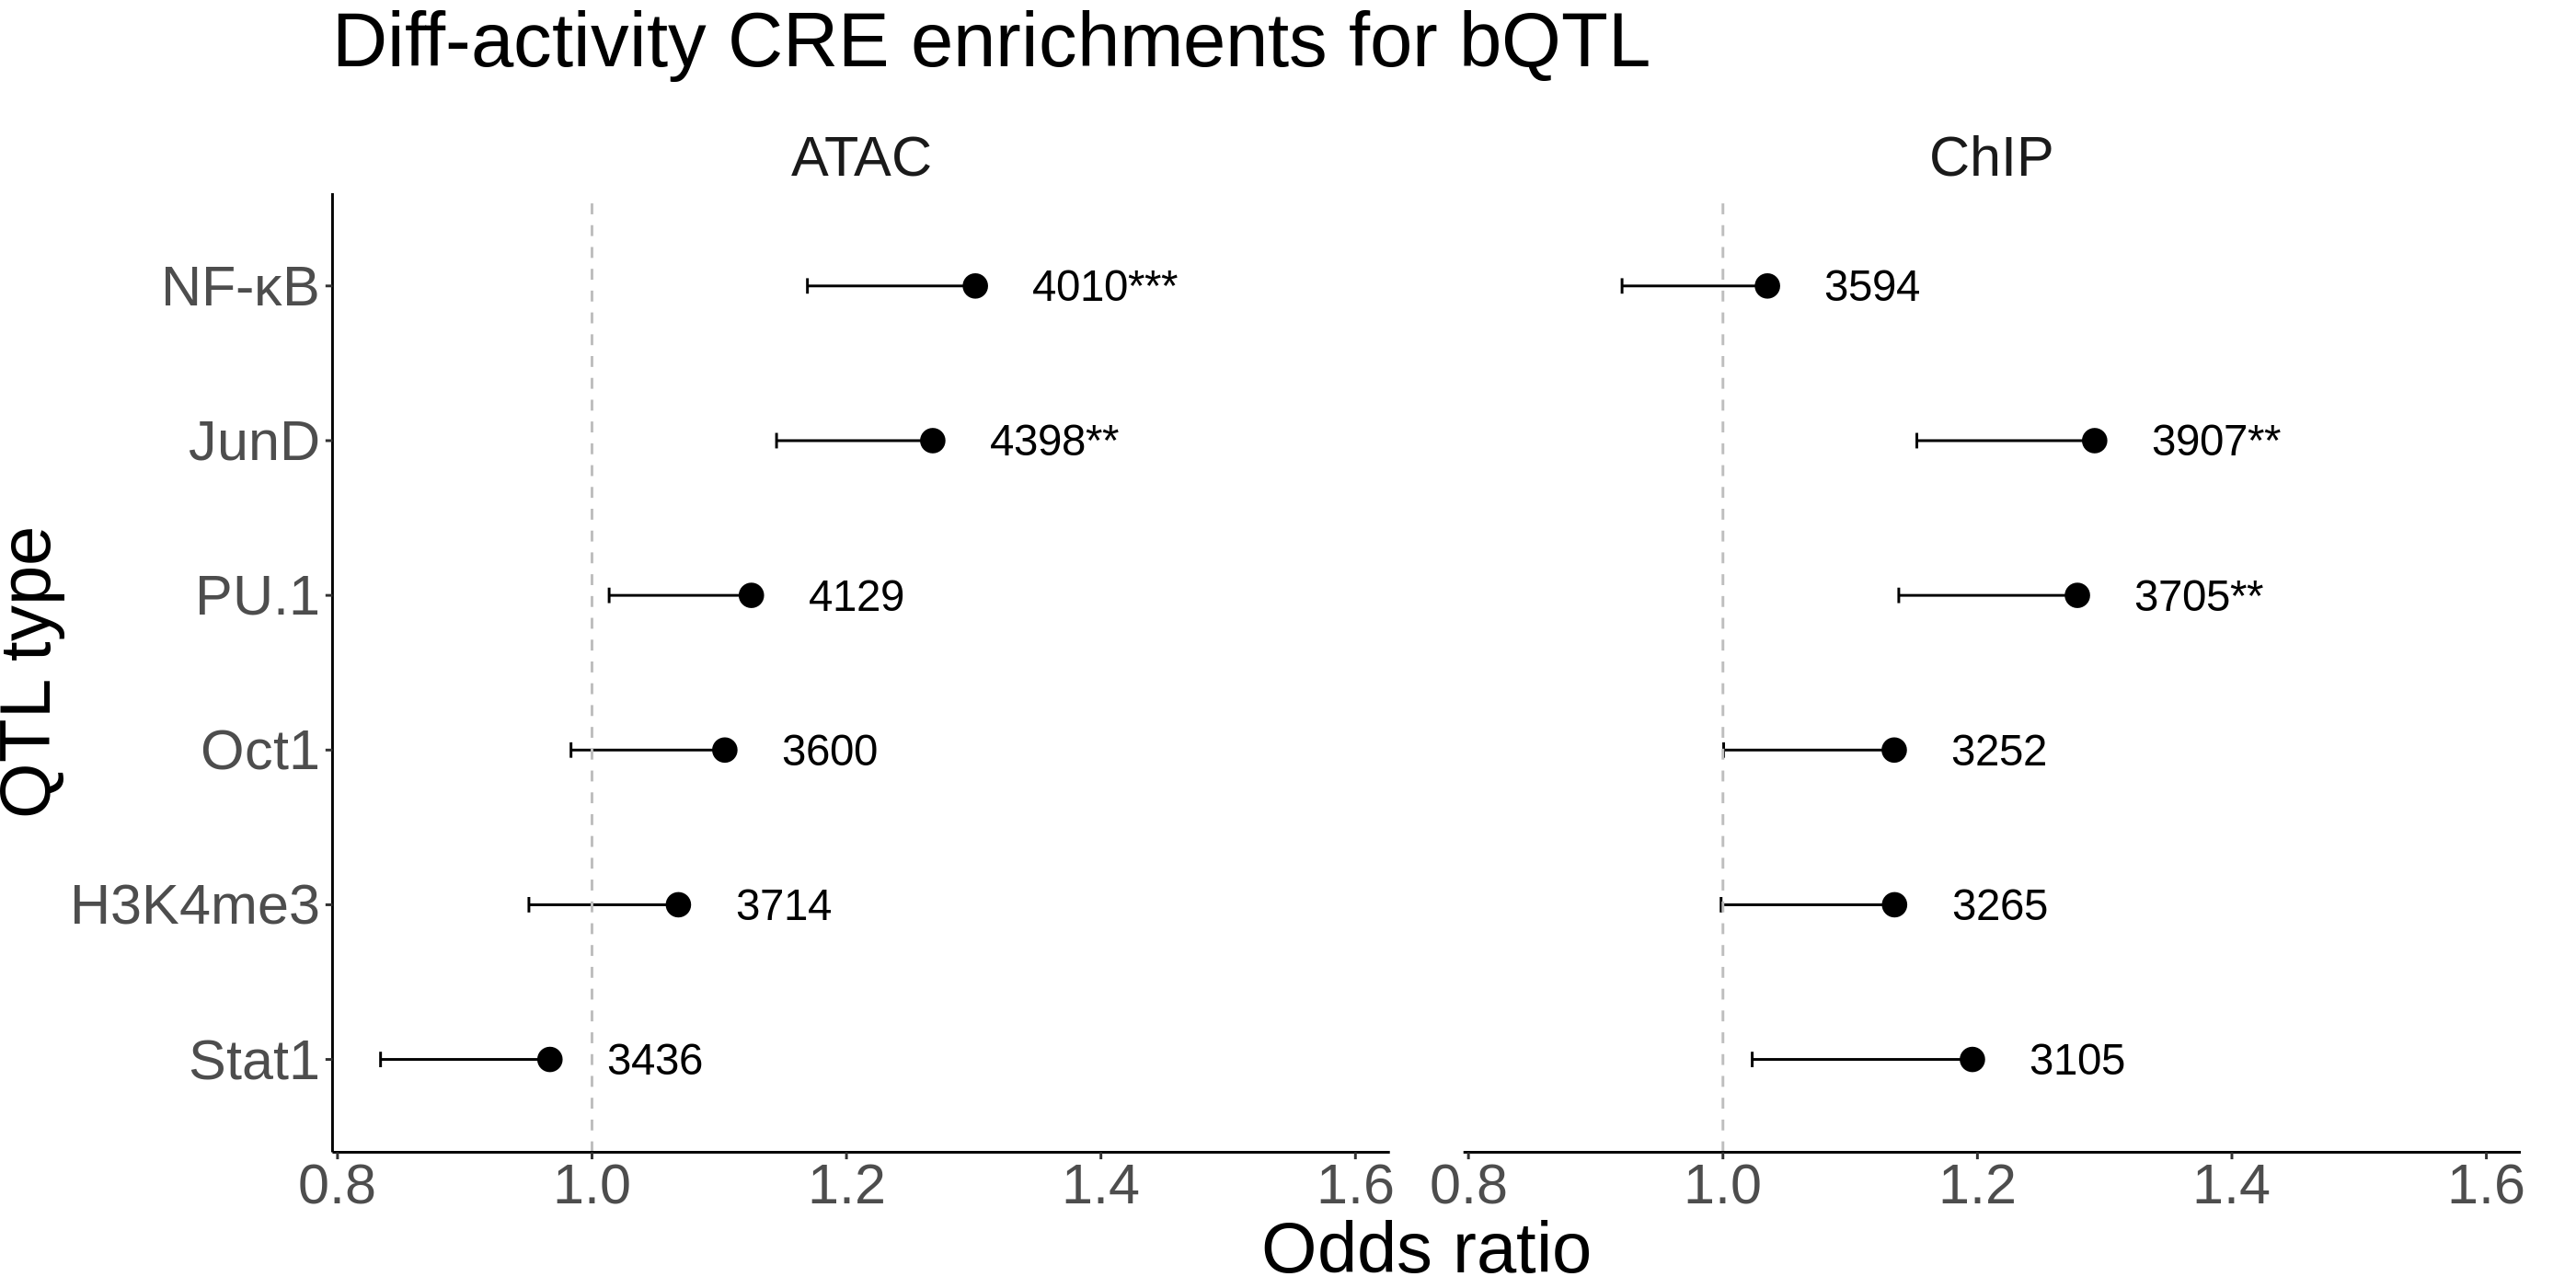

In [14]:
ntests <- 12

p1 <- plotFisherEnrichments(bfe %>%
                      dplyr::filter(!is.na(chip_type),
                                    test_type=='diffQTL',
                                    cre_type=='all',
                                    score_type %in% c('ATAC','ChIP')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                  yvar_col='chip_type',
                  ylabel='QTL type',
                  xvar_col='odds_ratio',
                  xlabel='Odds ratio',
                  althypoth='greater',
                  line_intercept=1,
                  groupvar=NULL,
                  groupvarlab=NULL,
                  groupvarord=NULL,
                  colorvals=NULL,
                  sep_groups=FALSE,
                  w=14,
                  h=7,
                  facets='score_type',
                  frows=1,
                  fscales='fixed', # free, free_x, free_y
                  fdir='h',
                  legendpos=NULL, # c(xpos, ypos)
                  debug=FALSE) +
    ggtitle("Diff-activity CRE enrichments for bQTL") +
#     ggtitle("Diff-activity CREs are enriched for specific TF bQTL") +
    theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p1

ggsave(
    file.path(
        outdir, 
        'Fig3a.png'
    ),
    width=14, 
    height=7
)

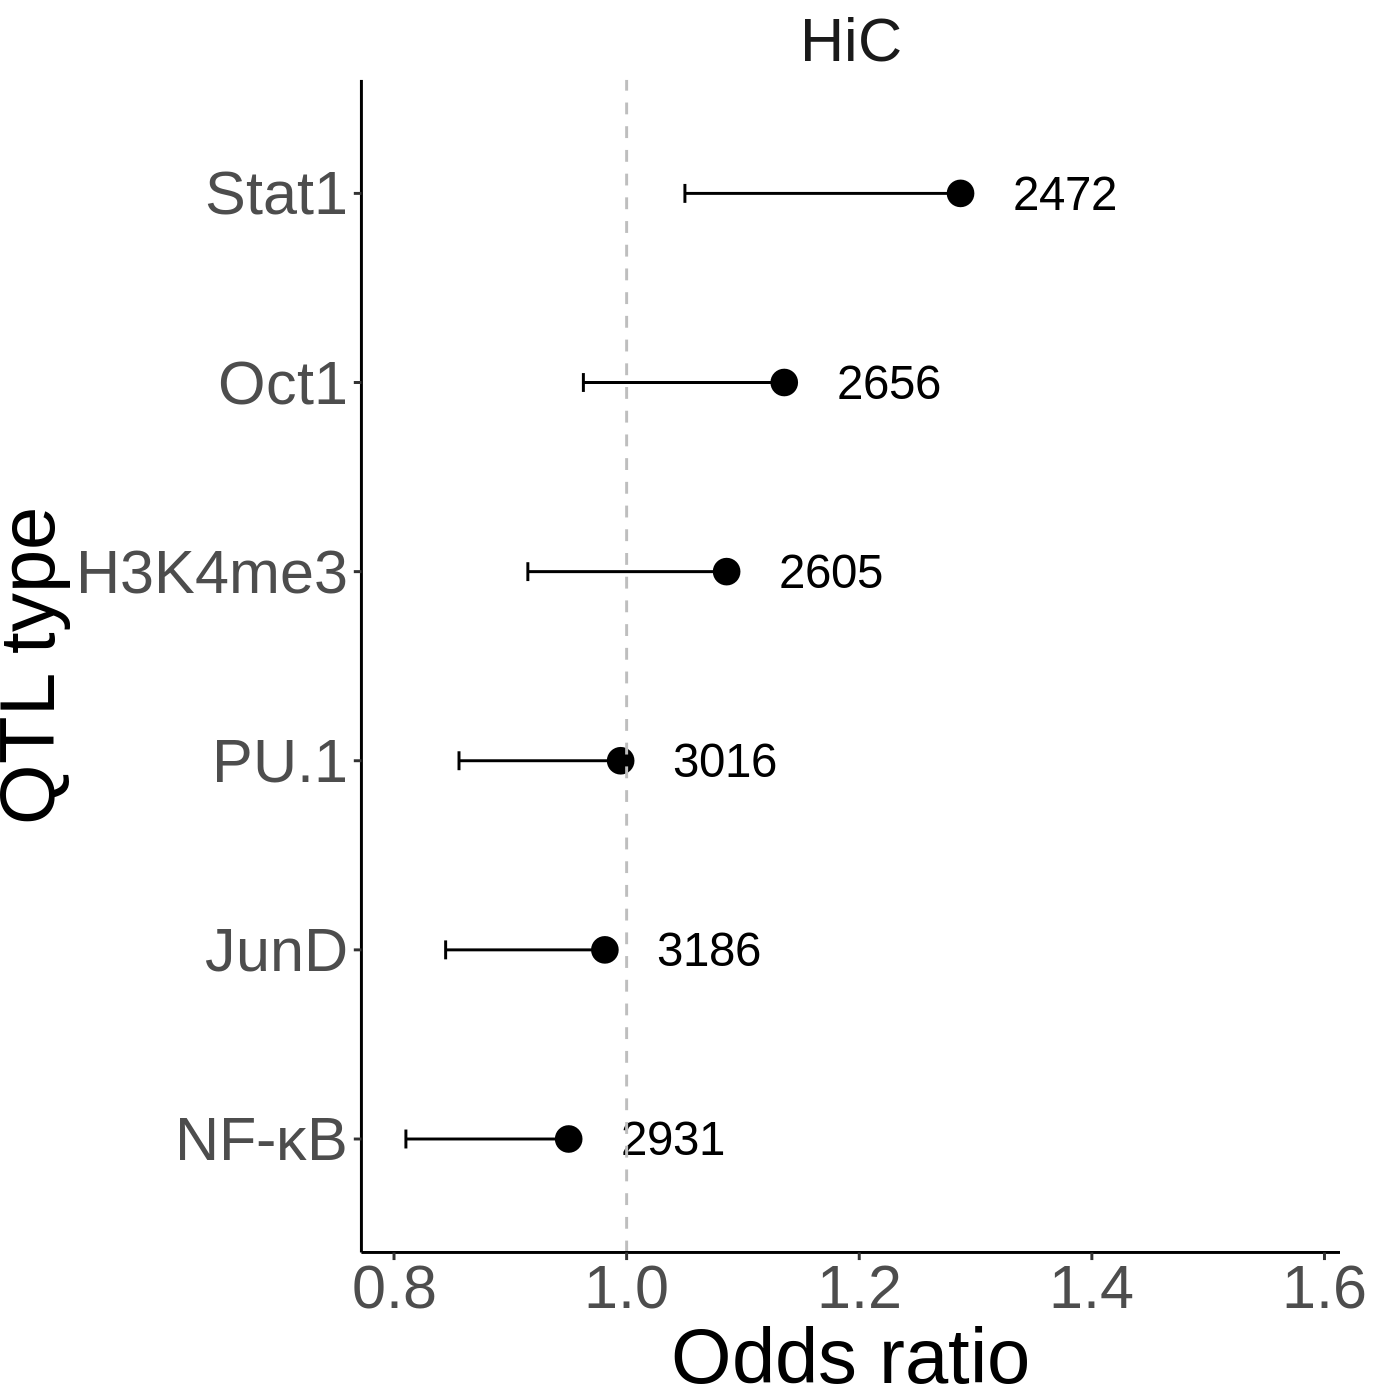

In [15]:
ps1 <- plotFisherEnrichments(bfe %>%
                      dplyr::filter(!is.na(chip_type),
                                    test_type=='diffQTL',
                                    cre_type=='all',
                                    score_type %in% c('HiC')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                  yvar_col='chip_type',
                  ylabel='QTL type',
                  xvar_col='odds_ratio',
                  xlabel='Odds ratio',
                  althypoth='greater',
                  line_intercept=1,
                  groupvar=NULL,
                  groupvarlab=NULL,
                  groupvarord=NULL,
                  colorvals=NULL,
                  sep_groups=FALSE,
                  w=7,
                  h=7,
                  facets='score_type',
                  frows=1,
                  fscales='fixed', # free, free_x, free_y
                  fdir='h',
                  legendpos=NULL, # c(xpos, ypos)
                  debug=FALSE) +
    theme(plot.title = element_text(size=30, hjust=0, margin=margin(0,0,15,0)))
ps1

# ggsave(
#     file.path(
#         suppdir, 
#         'HiC_bQTL.png'
#     ),
#     width=14, 
#     height=7
# )

## b

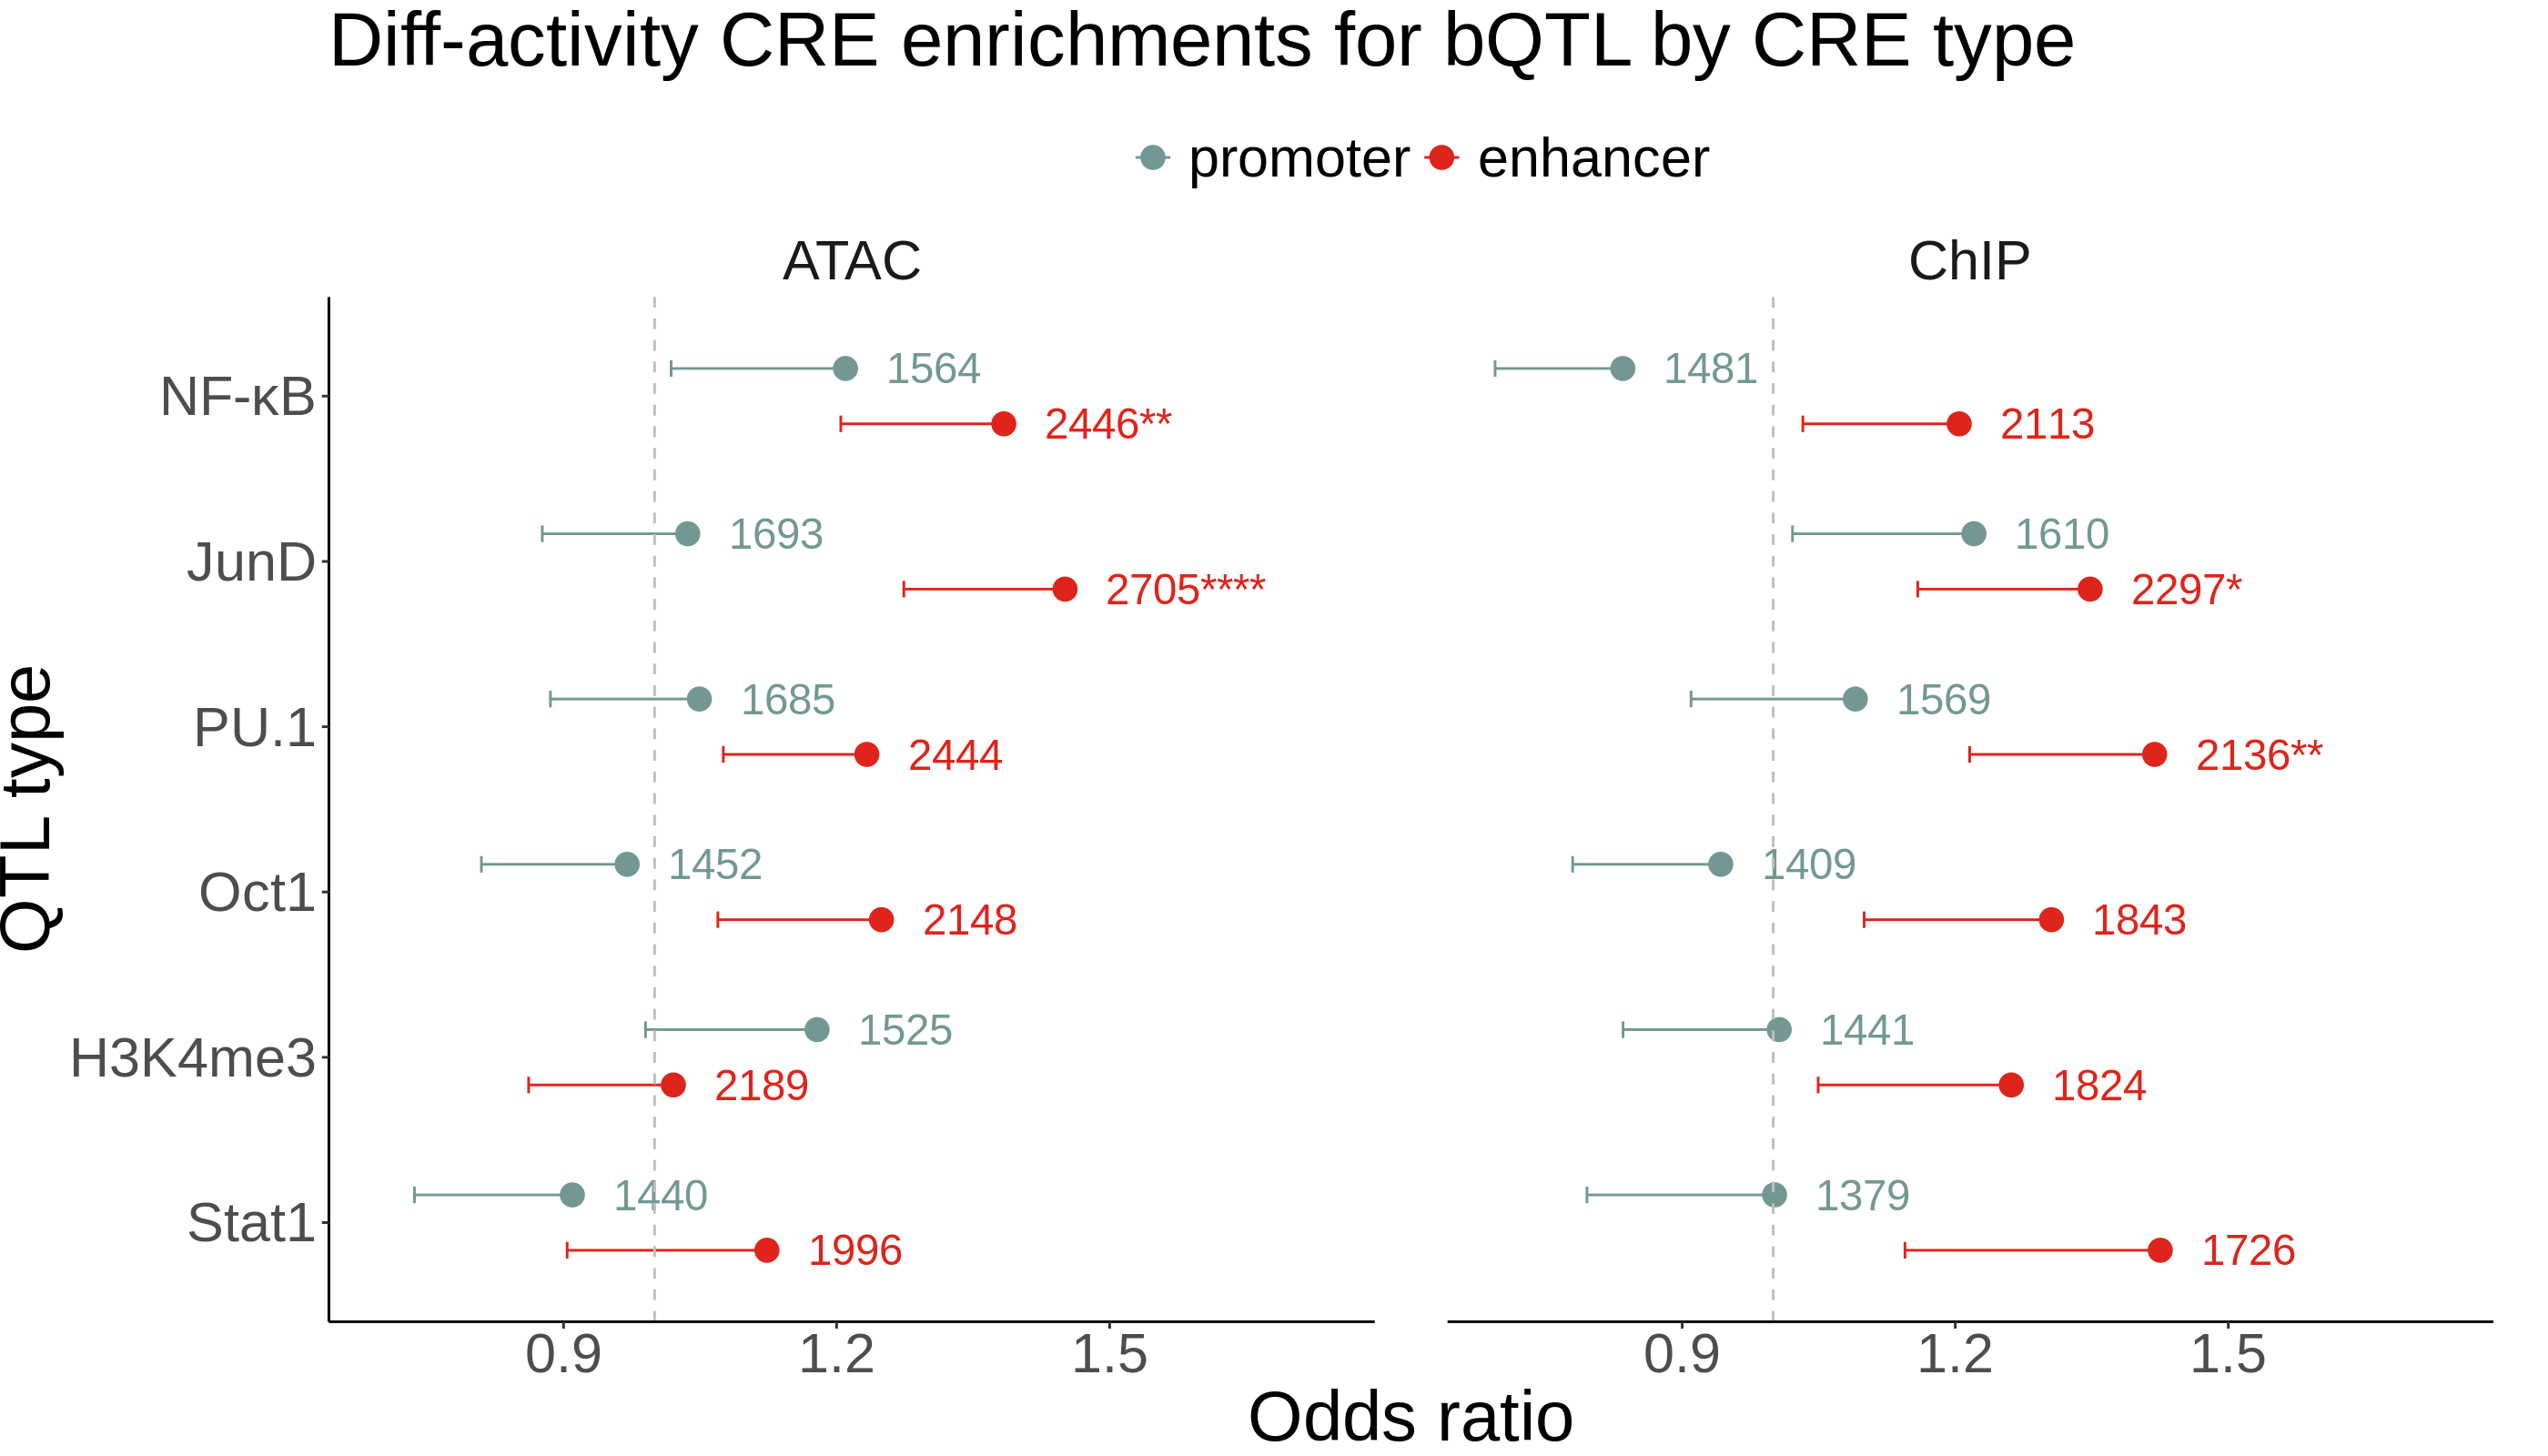

In [16]:
cre_colors <- c("#DF241B", "#739893")

ntests <- 24

p2 <- plotFisherEnrichments(bfe %>%
                          dplyr::filter(!is.na(chip_type),
                                        test_type=='diffQTL',
                                        cre_type!='all',
                                    score_type %in% c('ATAC','ChIP')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                      yvar_col='chip_type',
                      ylabel='QTL type',
                      xvar_col='odds_ratio',
                        xlabel='Odds ratio',
                      althypoth='greater',
                      line_intercept=1,
                      groupvar='cre_type',
                      groupvarord=NULL,
                      colorvals=cre_colors,
                      sep_groups=FALSE,
                      groupvarlab=NULL,
                      dodgewidth=0.67,
                      legendpos='top', # c(xpos, ypos)
                      w=14,
                      h=8,
                      fscales='fixed', # free, free_x, free_y
                      facets='score_type',
                      frows=1,
                      fdir='h',
                      debug=FALSE) + 
        ggtitle("Diff-activity CRE enrichments for bQTL by CRE type") +
#         ggtitle("Enhancers drive diff-activity CRE bQTL enrichments") +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p2

ggsave(
    file.path(
        outdir, 
        'Fig3b.png'
    ),
    width=14, 
    height=8
)

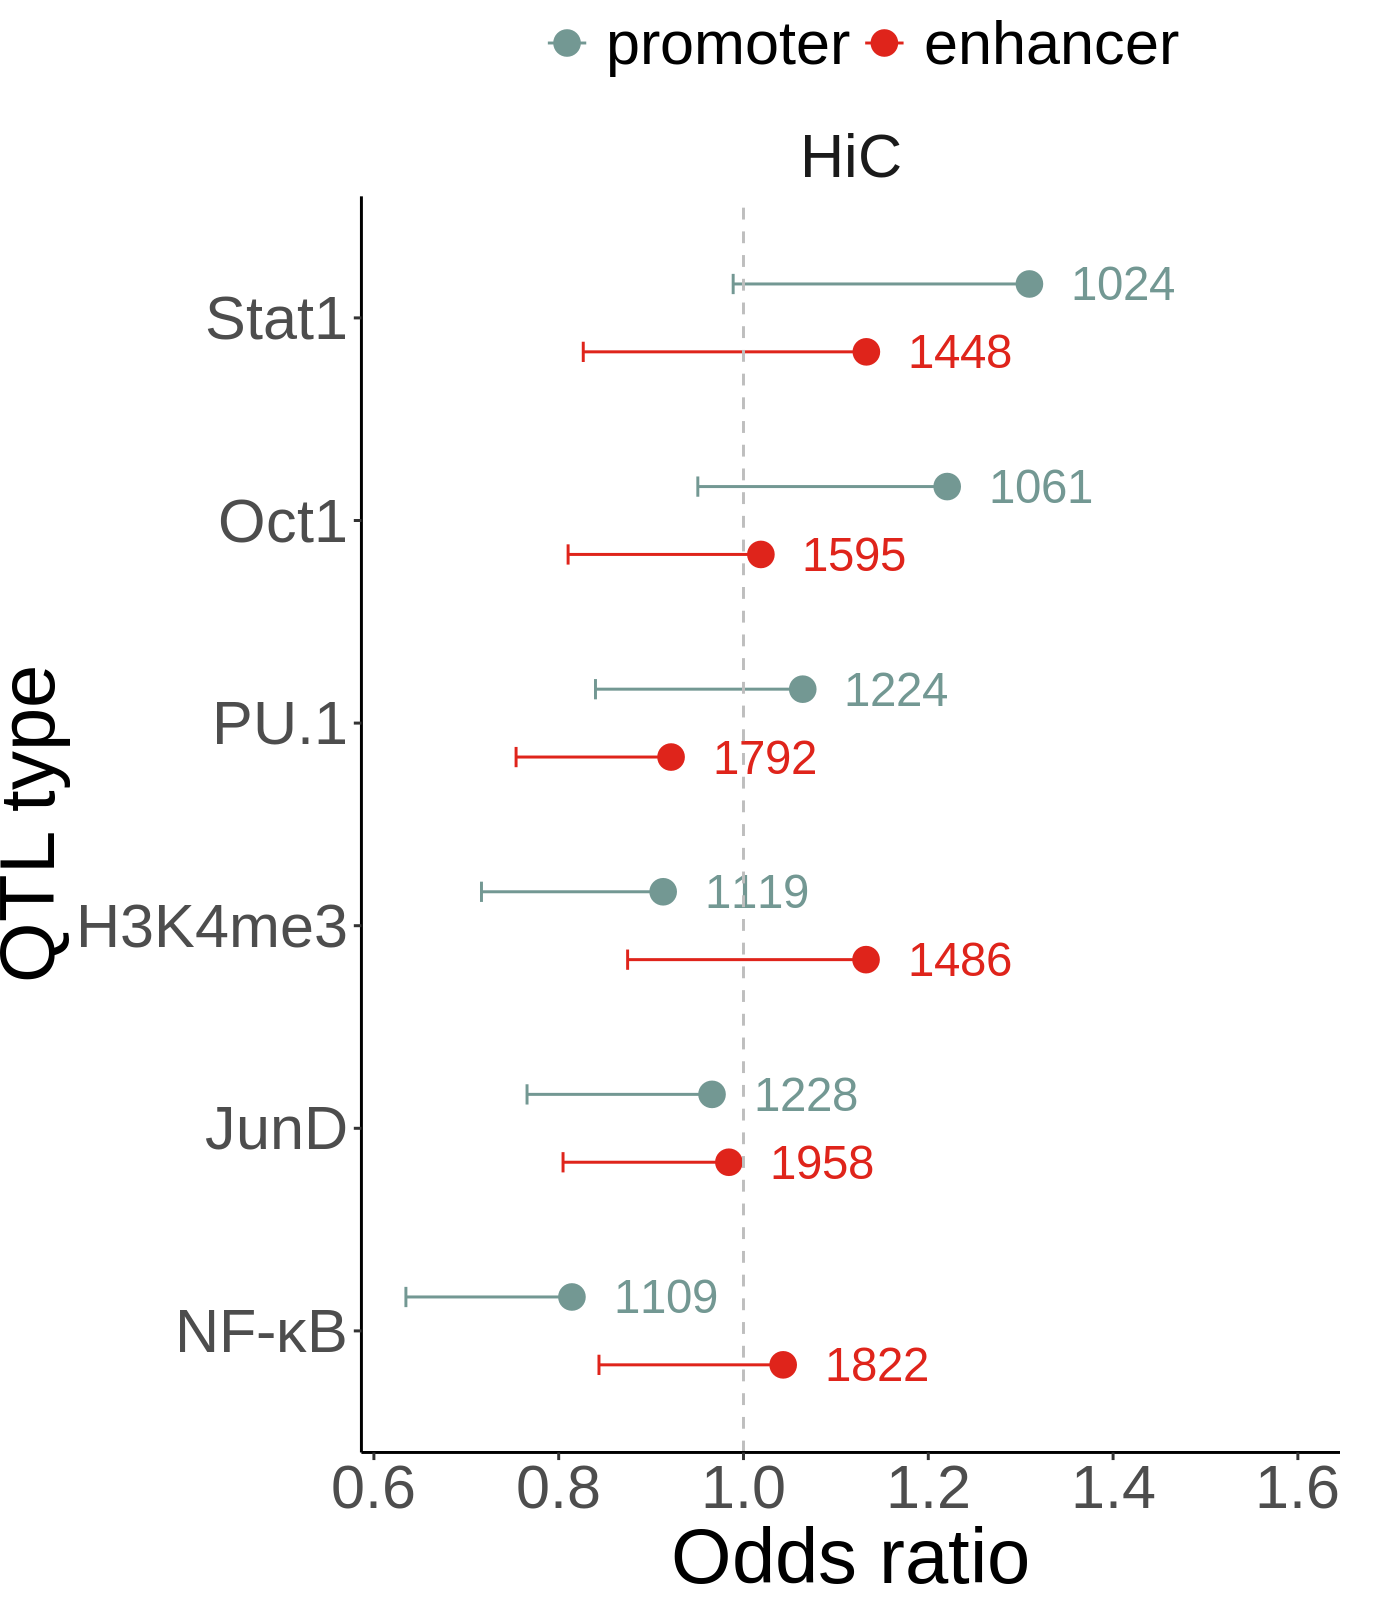

In [17]:
cre_colors <- c("#DF241B", "#739893")

ps2 <- plotFisherEnrichments(bfe %>%
                          dplyr::filter(!is.na(chip_type),
                                        test_type=='diffQTL',
                                        cre_type!='all',
                                    score_type %in% c('HiC')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                      yvar_col='chip_type',
                      ylabel='QTL type',
                      xvar_col='odds_ratio',
                      xlabel='Odds ratio',
                      althypoth='greater',
                      line_intercept=1,
                      groupvar='cre_type',
                      groupvarord=NULL,
                      colorvals=cre_colors,
                      sep_groups=FALSE,
                      groupvarlab=NULL,
                      dodgewidth=0.67,
                      legendpos='top', # c(xpos, ypos)
                      w=7,
                      h=8,
                      fscales='fixed', # free, free_x, free_y
                      facets='score_type',
                      frows=1,
                      fdir='h',
                      debug=FALSE) +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(0,0,15,0)))
ps2


## c

In [18]:
bfe %>%
    dplyr::filter(!is.na(chip_type),
                  test_type=='diffQTLdirection',
                  cre_type=='all') %>% 
    mutate(padj = pvalue*n()) %>% 
    group_by(score_type, chip_type) %>% 
    mutate(padj_all = padj[fst_percentile=='all FST']) %>% 
    filter(padj_all < 0.05) %>% 
    group_by(fst_percentile) %>% 
    summarize(N = n(),
                mean(odds_ratio))

fst_percentile N mean(odds_ratio)
1 all FST        6 2.143599        
2 top 5% FST     6 5.057372

In [19]:
5.057372/2.143599

[1] 2.35929

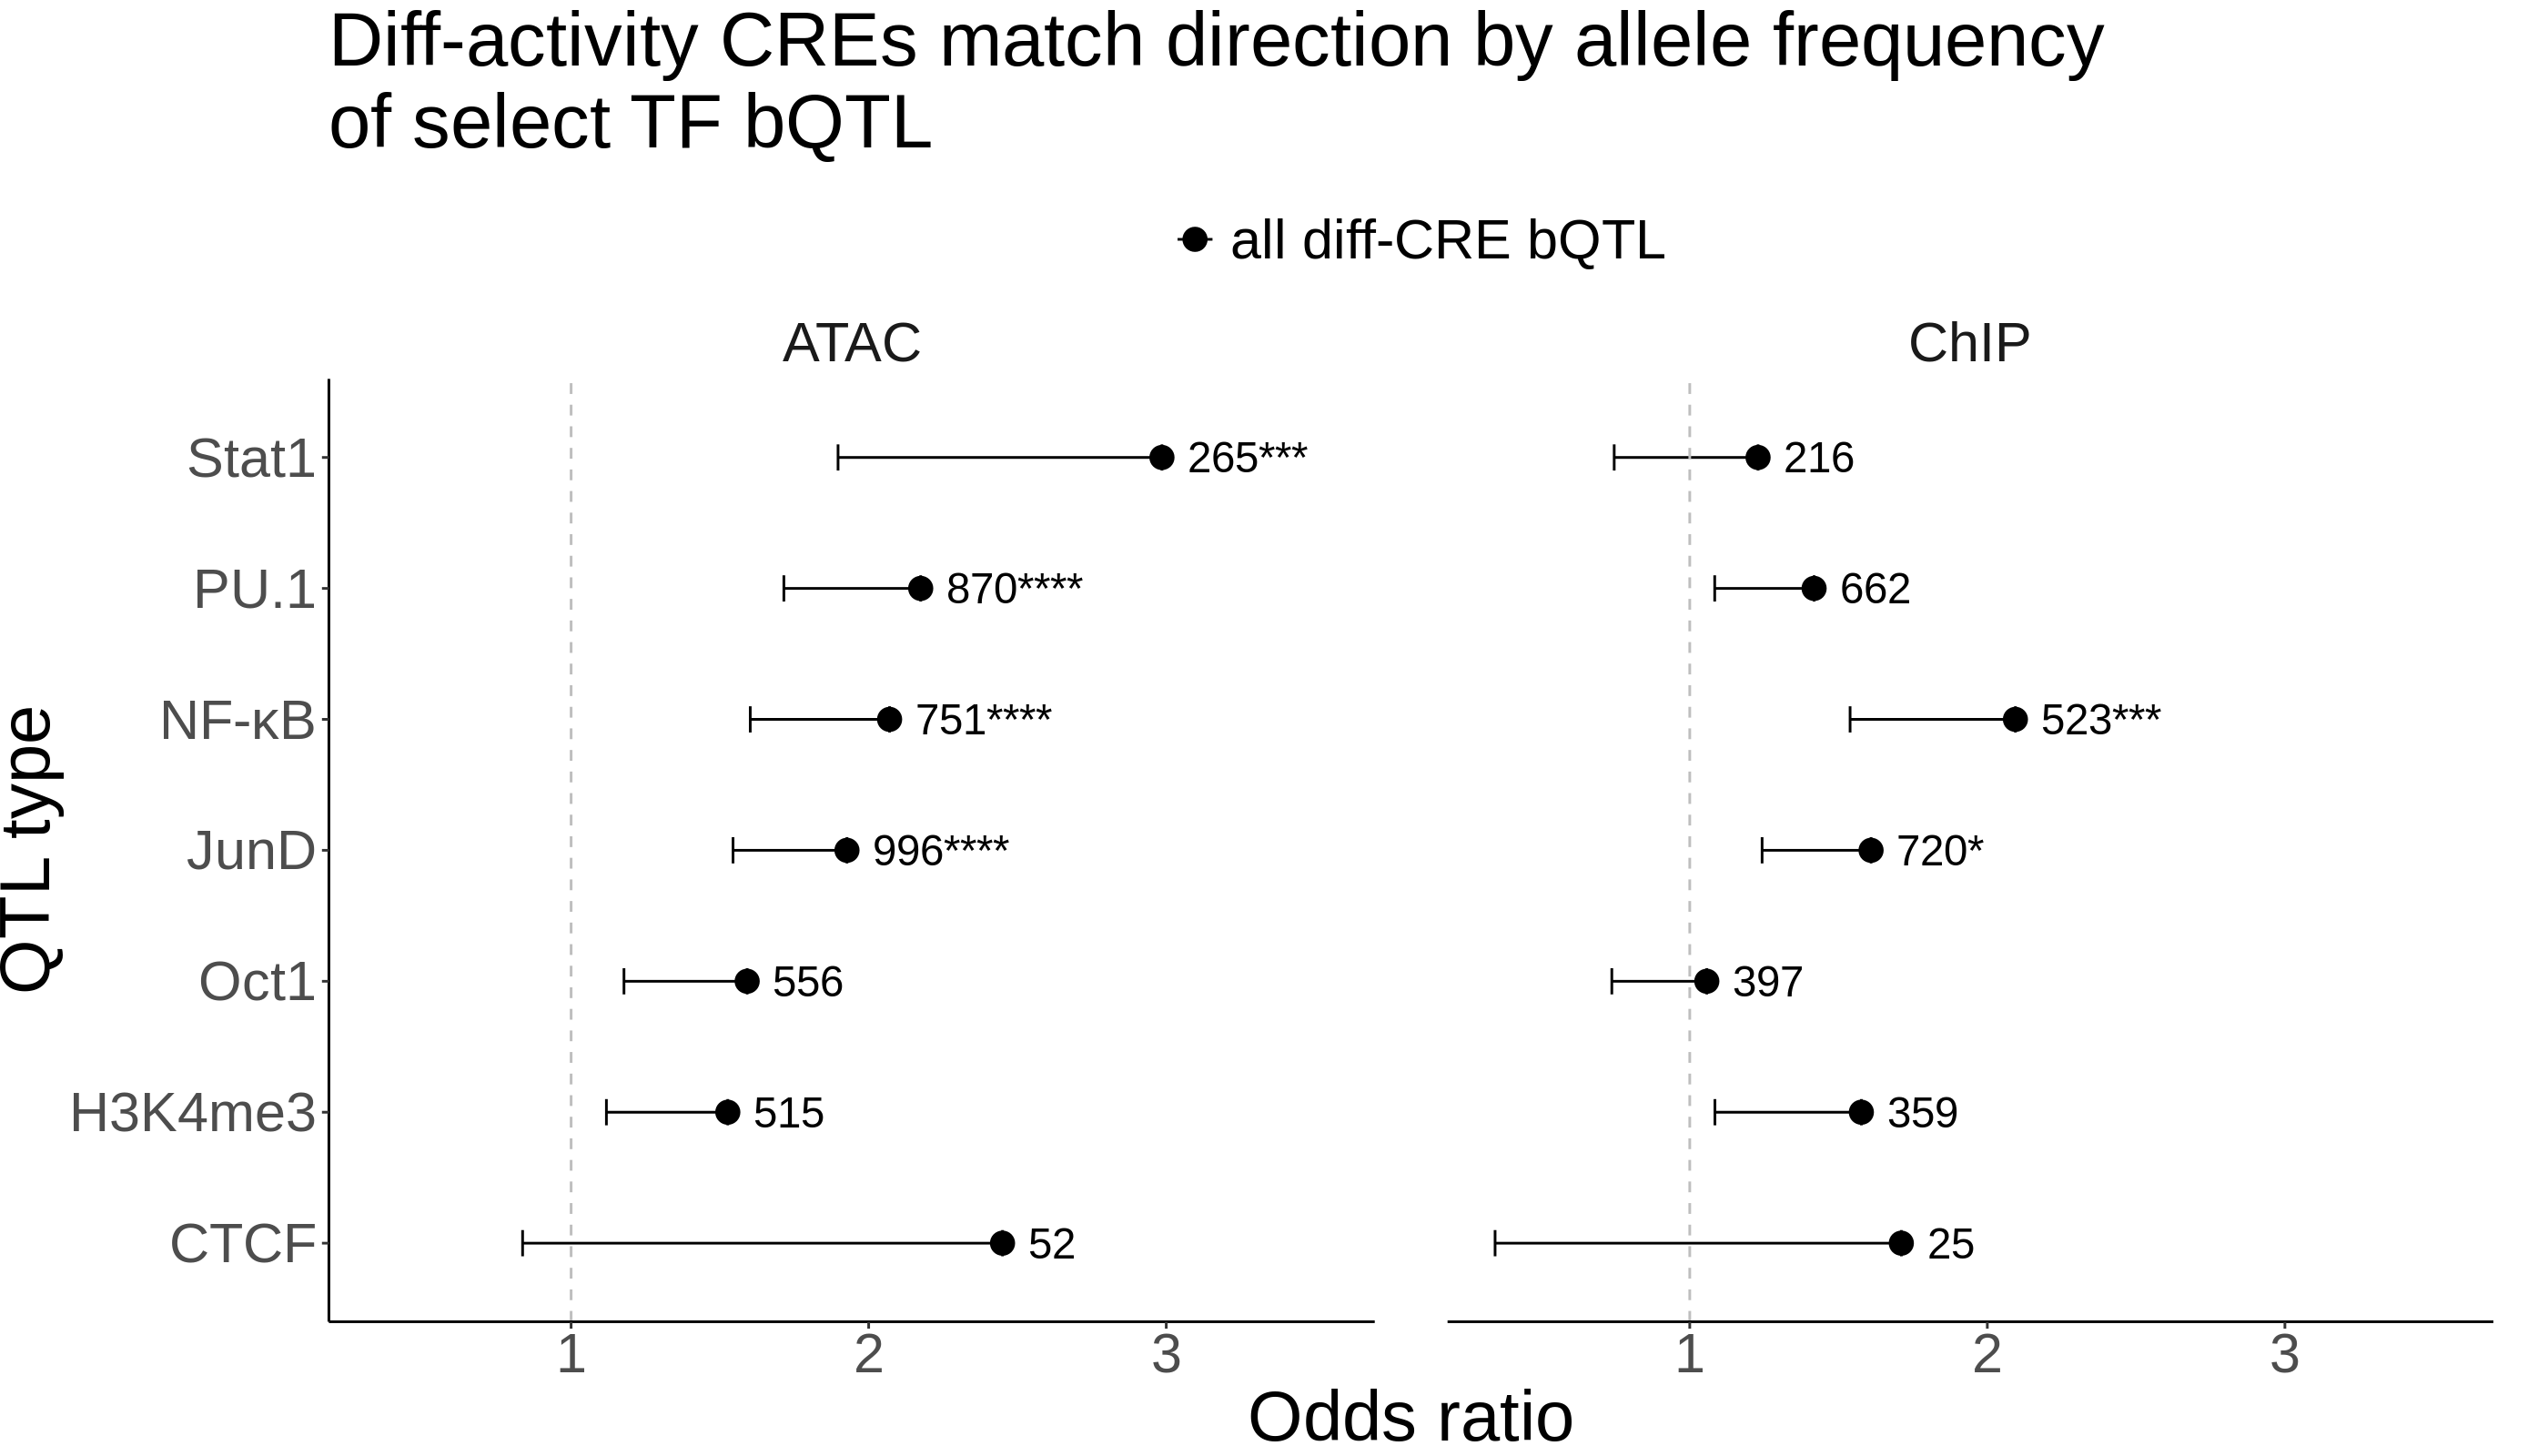

In [20]:
ntests <- 28

p3td <- plotFisherEnrichments(bfe %>%
                                    dplyr::filter(!is.na(chip_type),
                                                  test_type=='diffQTLdirection',
                                                  cre_type=='all',
                                    score_type %in% c('ATAC','ChIP')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)) %>% 
                                  dplyr::filter(fst_percentile=='all FST') %>% 
                                  mutate(fst_percentile='all diff-CRE bQTL'),
                                yvar_col='chip_type',
                                ylabel='QTL type',
                                xvar_col='odds_ratio',
                            xlabel='Odds ratio',
                                althypoth='greater',
                                line_intercept=1,
                                groupvar='fst_percentile',
                                groupvarord=NULL,
                                colorvals=c('black','purple2'),
                                sep_groups=FALSE,
                                  groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                                  w=14,
                                  h=8,
                                  facets='score_type',
                                frows=1,
                                fscales='fixed', # free, free_x, free_y
                                fdir='v',
                                debug=FALSE) +
                  ggtitle("Diff-activity CREs match direction by allele frequency\nof select TF bQTL") +
                  theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p3td

ggsave(
    file.path(
        outdir, 
        'Fig3c_TD_allFST.png'
    ),
    width=14, 
    height=8
)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



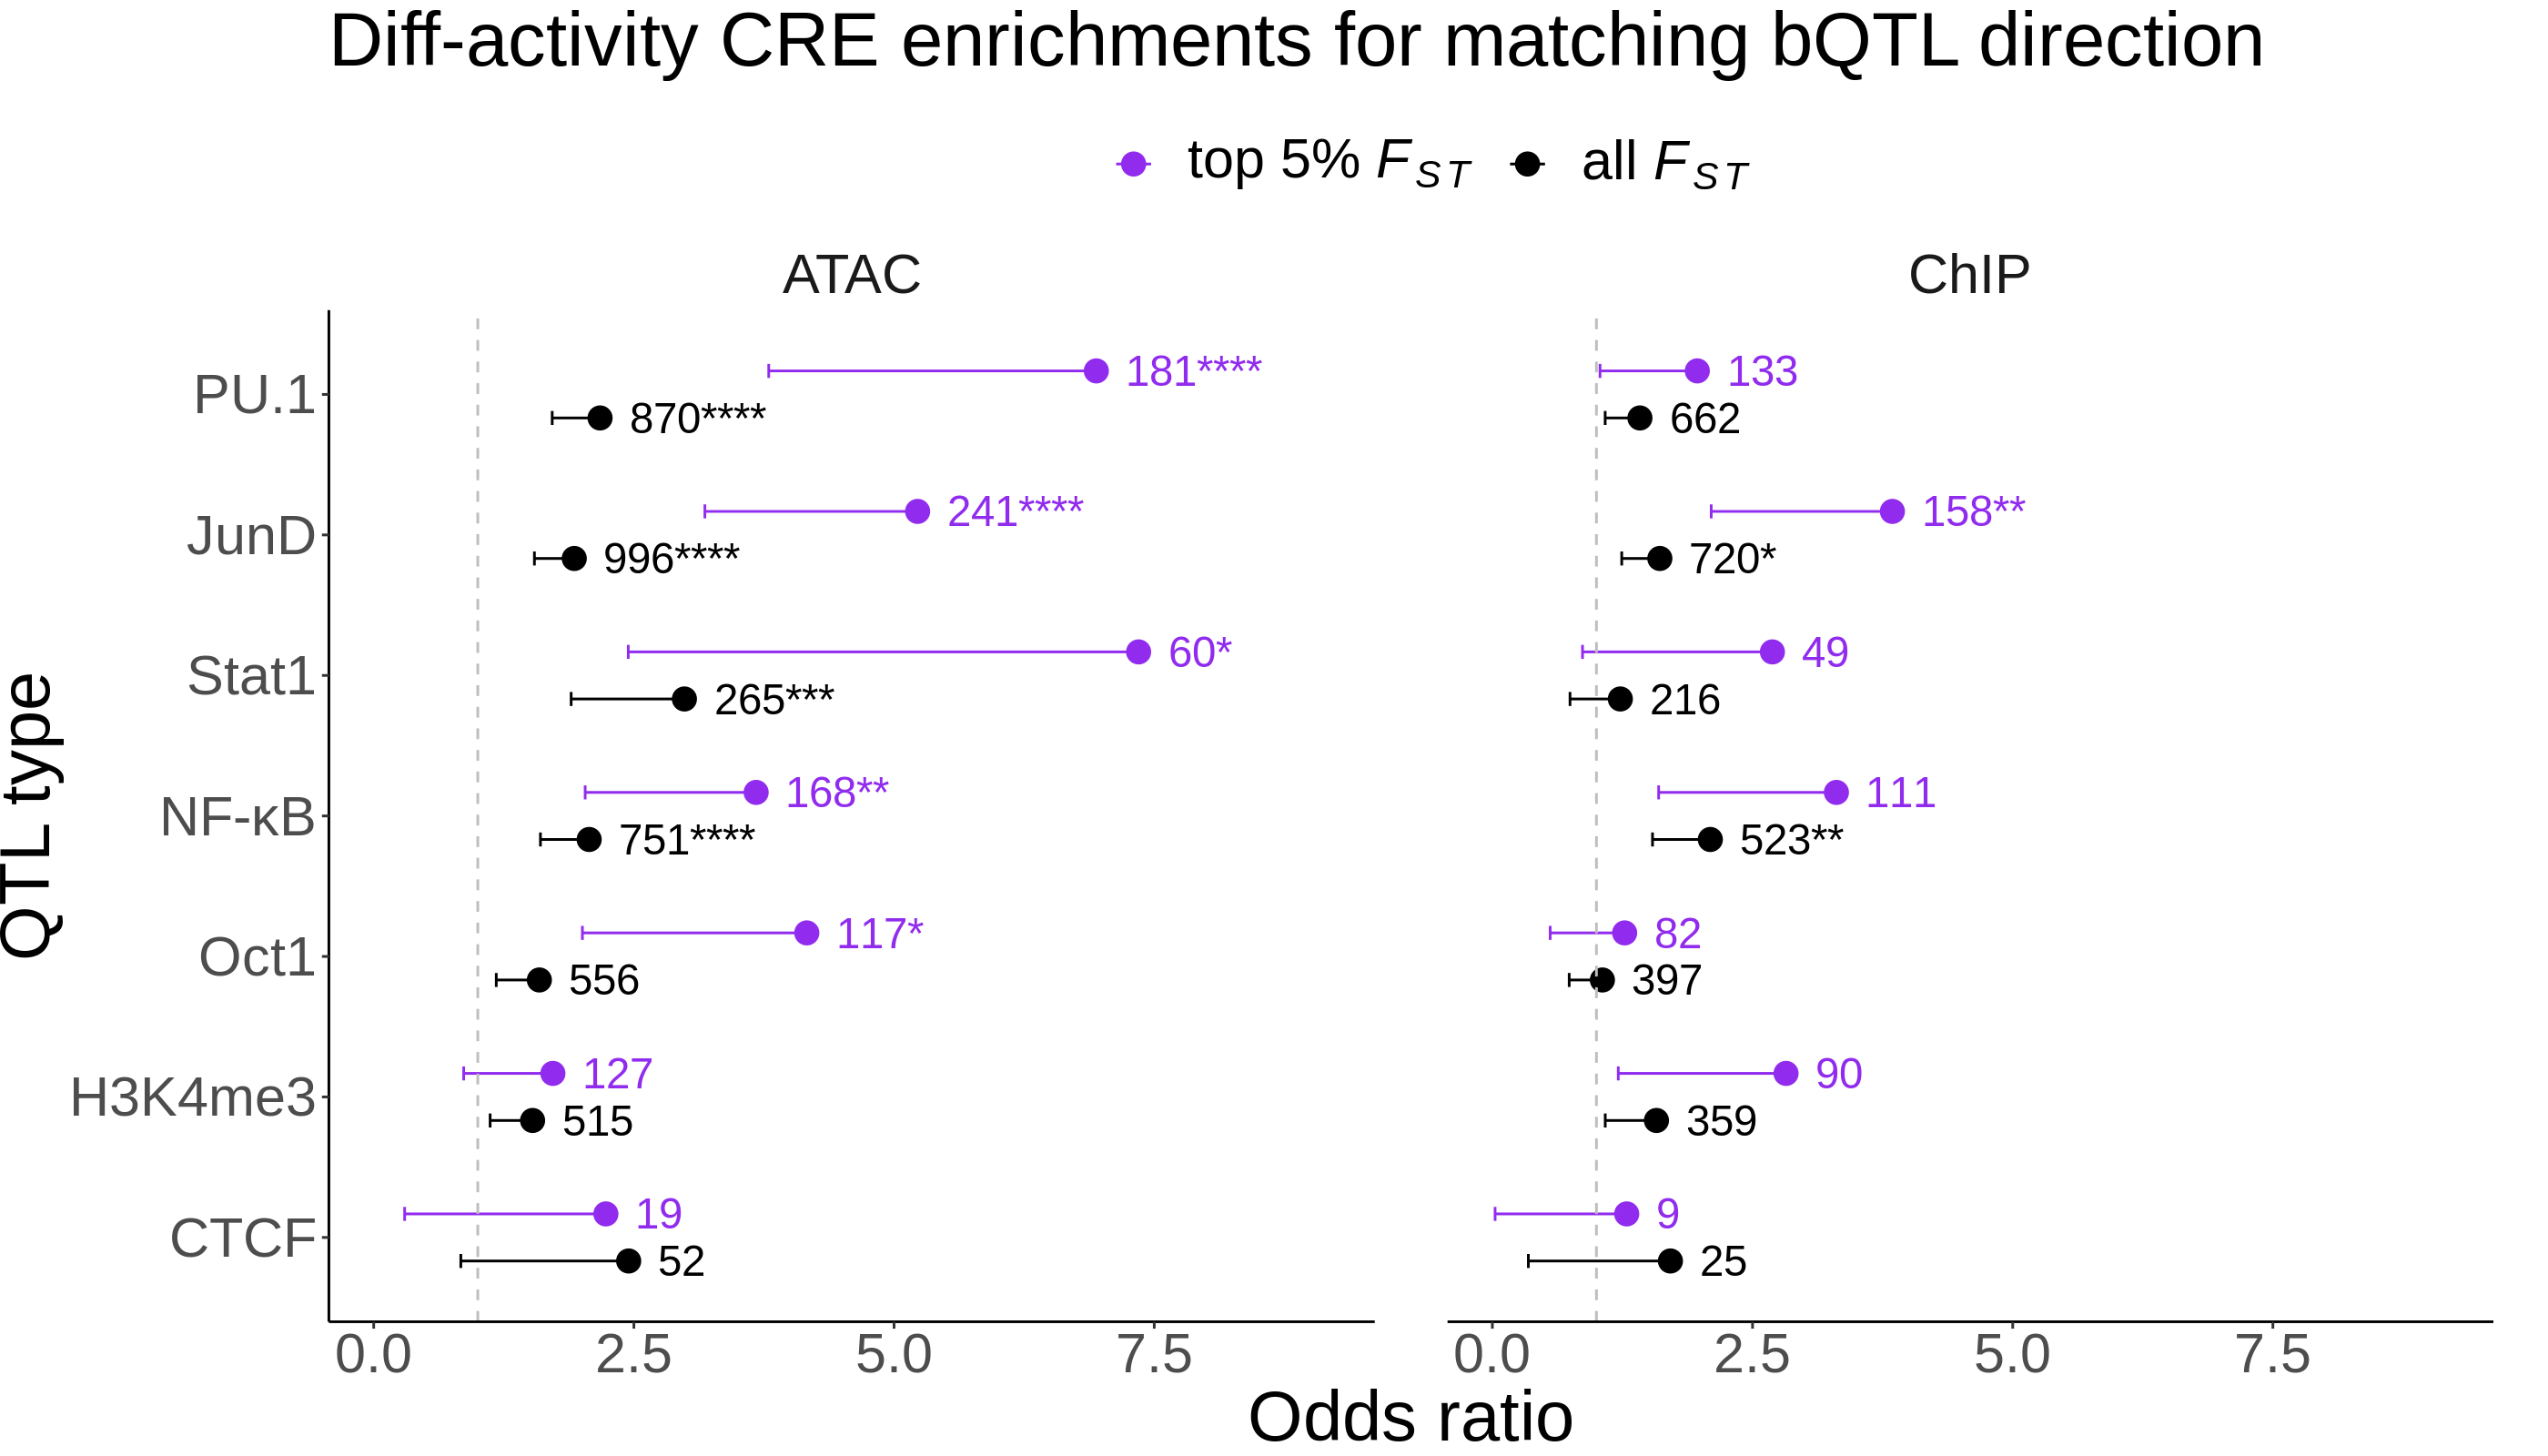

In [21]:
ntests <- 28

p3 <- plotFisherEnrichments(bfe %>%
                                    dplyr::filter(!is.na(chip_type),
                                                  test_type=='diffQTLdirection',
                                                  cre_type=='all',
                                    score_type %in% c('ATAC','ChIP')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                                yvar_col='chip_type',
                                ylabel='QTL type',
                                xvar_col='odds_ratio',
                            xlabel='Odds ratio',
                                althypoth='greater',
                                line_intercept=1,
                                groupvar='fst_percentile',
                                groupvarord=NULL,
                                colorvals=c('black','purple2'),
                                sep_groups=FALSE,
                                  groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                                  w=14,
                                  h=8,
                                  facets='score_type',
                                frows=1,
                                fscales='fixed', # free, free_x, free_y
                                fdir='v',
                                debug=FALSE) + 
                  scale_color_discrete(type = c('black','purple2'),
                                       labels = c(expression("all "*italic(F[ST])),
                                                  expression("top 5% "*italic(F[ST])))) + 
                  theme(legend.spacing.x = unit(1, 'line')) + 
                  ggtitle("Diff-activity CRE enrichments for matching bQTL direction") +
#                   ggtitle("Diff-activity CREs match direction by allele frequency\nof select TF bQTL") +
                  theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p3

ggsave(
    file.path(
        outdir, 
        'Fig3c.png'
    ),
    width=14, 
    height=8
)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



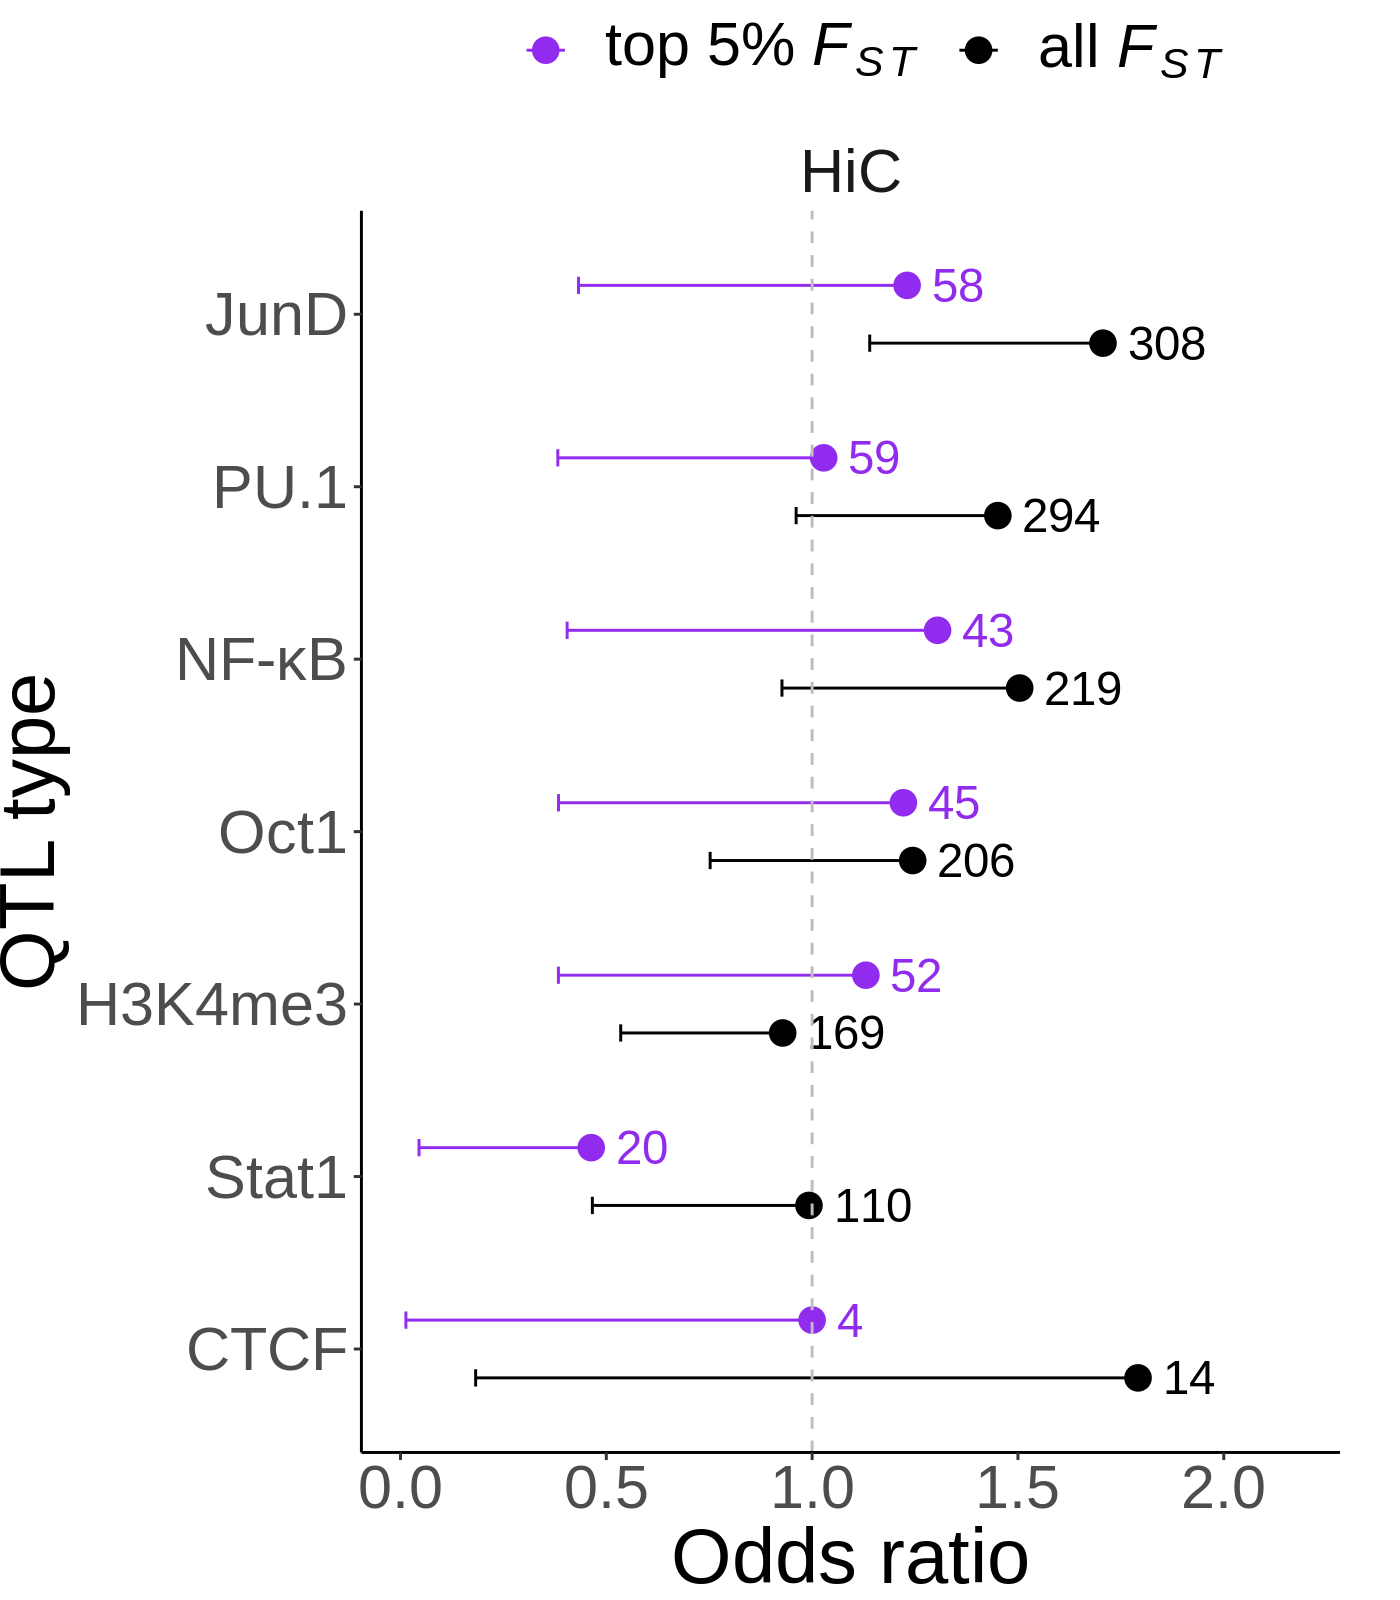

In [22]:

ps3 <- plotFisherEnrichments(bfe %>%
                                    dplyr::filter(!is.na(chip_type),
                                                  test_type=='diffQTLdirection',
                                                  cre_type=='all',
                                    score_type %in% c('HiC')) %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                                yvar_col='chip_type',
                                ylabel='QTL type',
                                xvar_col='odds_ratio',
                            xlabel='Odds ratio',
                                althypoth='greater',
                                line_intercept=1,
                                groupvar='fst_percentile',
                                groupvarord=NULL,
                                colorvals=c('black','purple2'),
                                sep_groups=FALSE,
                                  groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                                  w=7,
                                  h=8,
                                  facets='score_type',
                                frows=1,
                                fscales='fixed', # free, free_x, free_y
                                fdir='v',
                                debug=FALSE) + 
                  scale_color_discrete(type = c('black','purple2'),
                                       labels = c(expression("all "*italic(F[ST])),
                                                  expression("top 5% "*italic(F[ST])))) + 
                  theme(legend.spacing.x = unit(1, 'line')) +
                  theme(plot.title = element_text(size=30, hjust=0, margin=margin(0,0,15,0)))
ps3


In [23]:
bfe %>%
    dplyr::filter(!is.na(chip_type),
                  test_type=='diffQTLdirection',
                  cre_type!='all') %>% 
    mutate(padj = pvalue*n()) %>% 
    group_by(score_type, chip_type, cre_type) %>% 
    mutate(padj_all = padj[fst_percentile=='all FST']) %>% 
    filter(padj_all < 0.05) %>% 
    group_by(fst_percentile) %>% 
    summarize(N = n(),
                mean(odds_ratio))

fst_percentile N mean(odds_ratio)
1 all FST        5  3.090422       
2 top 5% FST     5 10.547344

In [24]:
10.547344/3.090422

[1] 3.412914

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



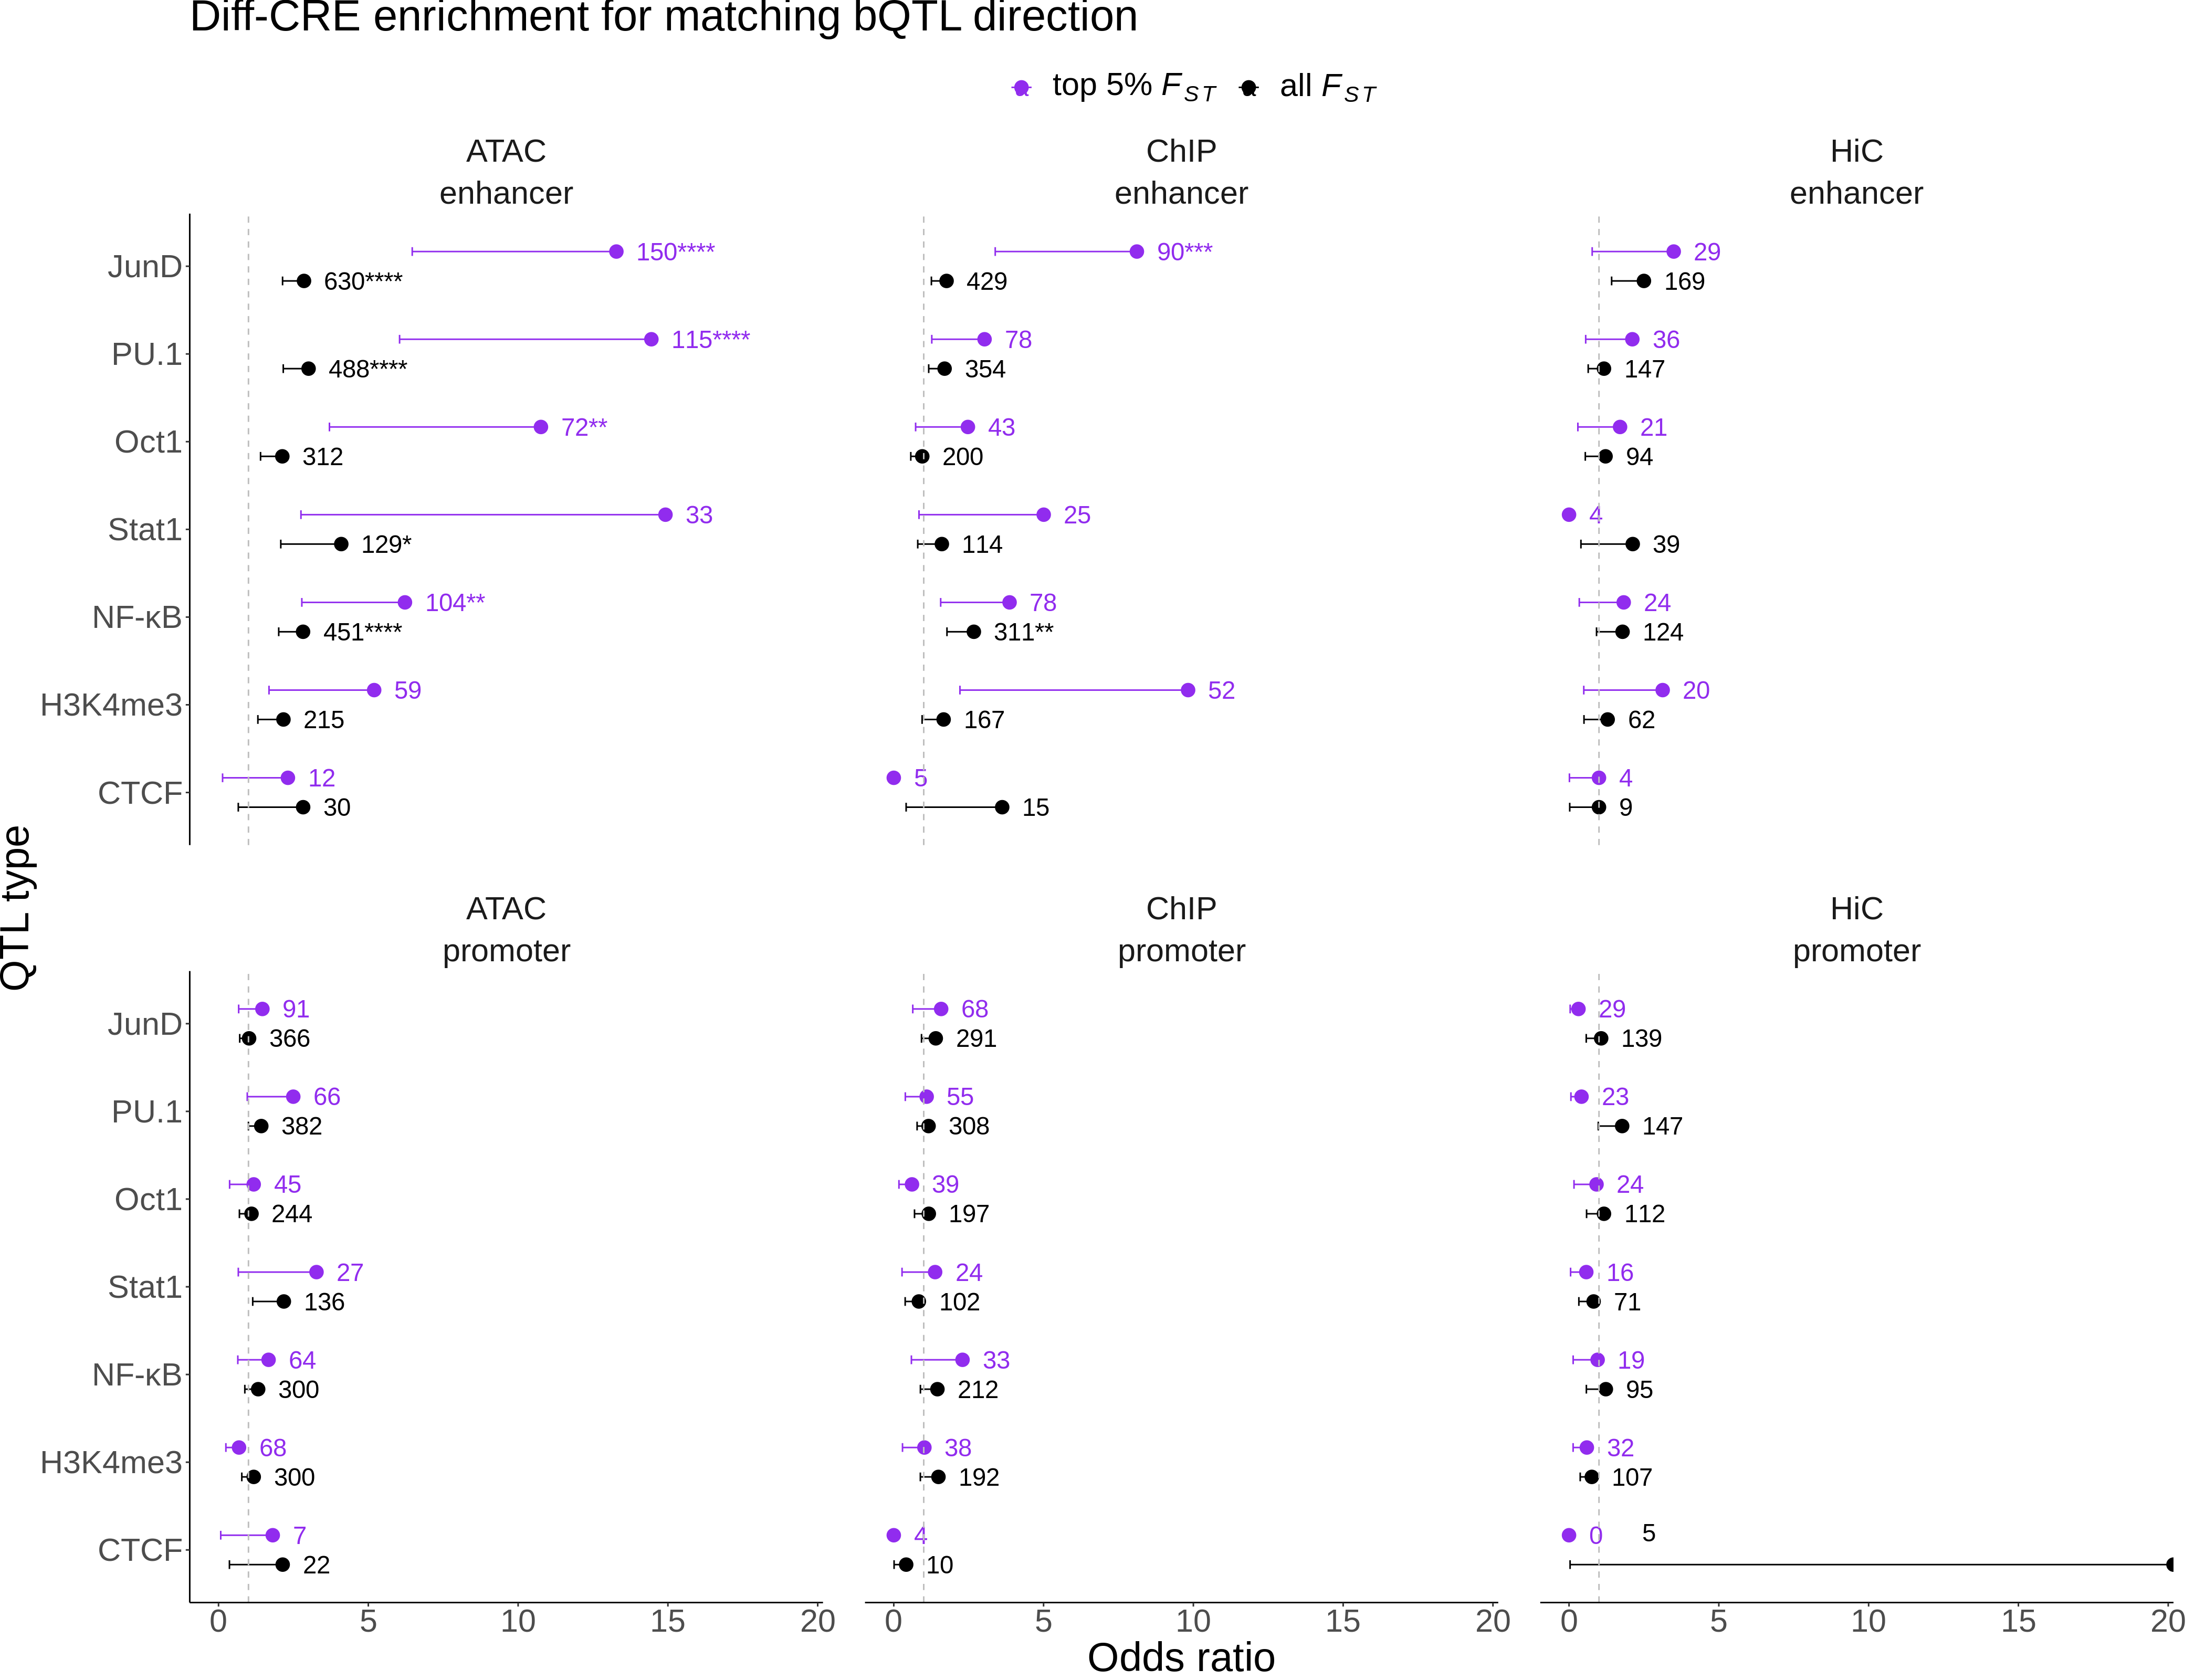

In [25]:
ntests <- 56

p5 <- plotFisherEnrichments(bfe %>%
                          dplyr::filter(!is.na(chip_type),
                                        test_type=='diffQTLdirection',
                                        cre_type!='all') %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                      yvar_col='chip_type',
                      ylabel='QTL type',
                      xvar_col='odds_ratio',
                      xlabel='Odds ratio',
                      althypoth='greater',
                      line_intercept=1,
                      groupvar='fst_percentile',
                      groupvarord=NULL,
                      colorvals=c('black','purple2'),
                      sep_groups=FALSE,
                      groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                      w=21,
                      h=16,
                      facets=c('score_type','cre_type'),
                      frows=2,
                      fscales='fixed', # free, free_x, free_y
                      fdir='v',
                      debug=FALSE) + 
                  scale_color_discrete(type = c('black','purple2'),
                                       labels = c(expression("all "*italic(F[ST])),
                                                  expression("top 5% "*italic(F[ST])))) + 
                  theme(legend.spacing.x = unit(1, 'line')) +
        ggtitle("Diff-CRE enrichment for matching bQTL direction") +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(0,0,15,0)))
p5

ggsave(
    file.path(
        suppdir, 
        'FigS3_bQTL_direction_cretype.png'
    ),
    width=21, 
    height=16
)

# Fig. 4

## a

In [146]:
head(bfw)

seqnames start     end       name                              class   
1 chr1       1342443   1342976 promoter|chr1:1342443-1342976     promoter
2 chr1     151762760 151763277 promoter|chr1:151762760-151763277 promoter
3 chr1     161008524 161009028 promoter|chr1:161008524-161009028 promoter
4 chr1     161067882 161068430 promoter|chr1:161067882-161068430 promoter
5 chr1     203734033 203734535 promoter|chr1:203734033-203734535 promoter
6 chr1      22378869  22379384 promoter|chr1:22378869-22379384   promoter
  isSelfPromoter qtl_p        abc_p   qtl_dir abc_dir atac_lfc    chip_lfc     
1 FALSE          1.513581e-02 0.30500 down    down     0.01907116 -5.525851e-02
2  TRUE          1.736939e-04 0.99800 down    down    -0.05345256 -7.383098e-05
3 FALSE          6.753689e-13 0.00013 up      up       0.13316206  1.191760e-01
4 FALSE          2.053515e-02 0.02350 up      up       0.04390752  7.348213e-02
5  TRUE          1.155476e-11 0.58500 up      down    -0.08730829 -1.752578e-02
6  TRUE          2.876244e-08 0.38000 up      up       0.03255997  2.905985e-02
  hic_lfc     fst_var   diff_status diff_wilcoxP cre_type qtl_type score_type
1  0.28392831 0.0107757 non-diff    0.2417981    promoter eqtl_lcl ChIP      
2 -0.13862591 0.2923230 non-diff    0.2417981    promoter eqtl_lcl ChIP      
3  0.53775675 0.0307309 diff        0.2417981    promoter eqtl_lcl ChIP      
4  0.11647311 0.1045110 diff        0.2417981    promoter eqtl_lcl ChIP      
5 -0.04707959 0.1202960 non-diff    0.2417981    promoter eqtl_lcl ChIP      
6  0.05265304 0.0133940 non-diff    0.2417981    promoter eqtl_lcl ChIP      
  chip_type
1 NA       
2 NA       
3 NA       
4 NA       
5 NA       
6 NA

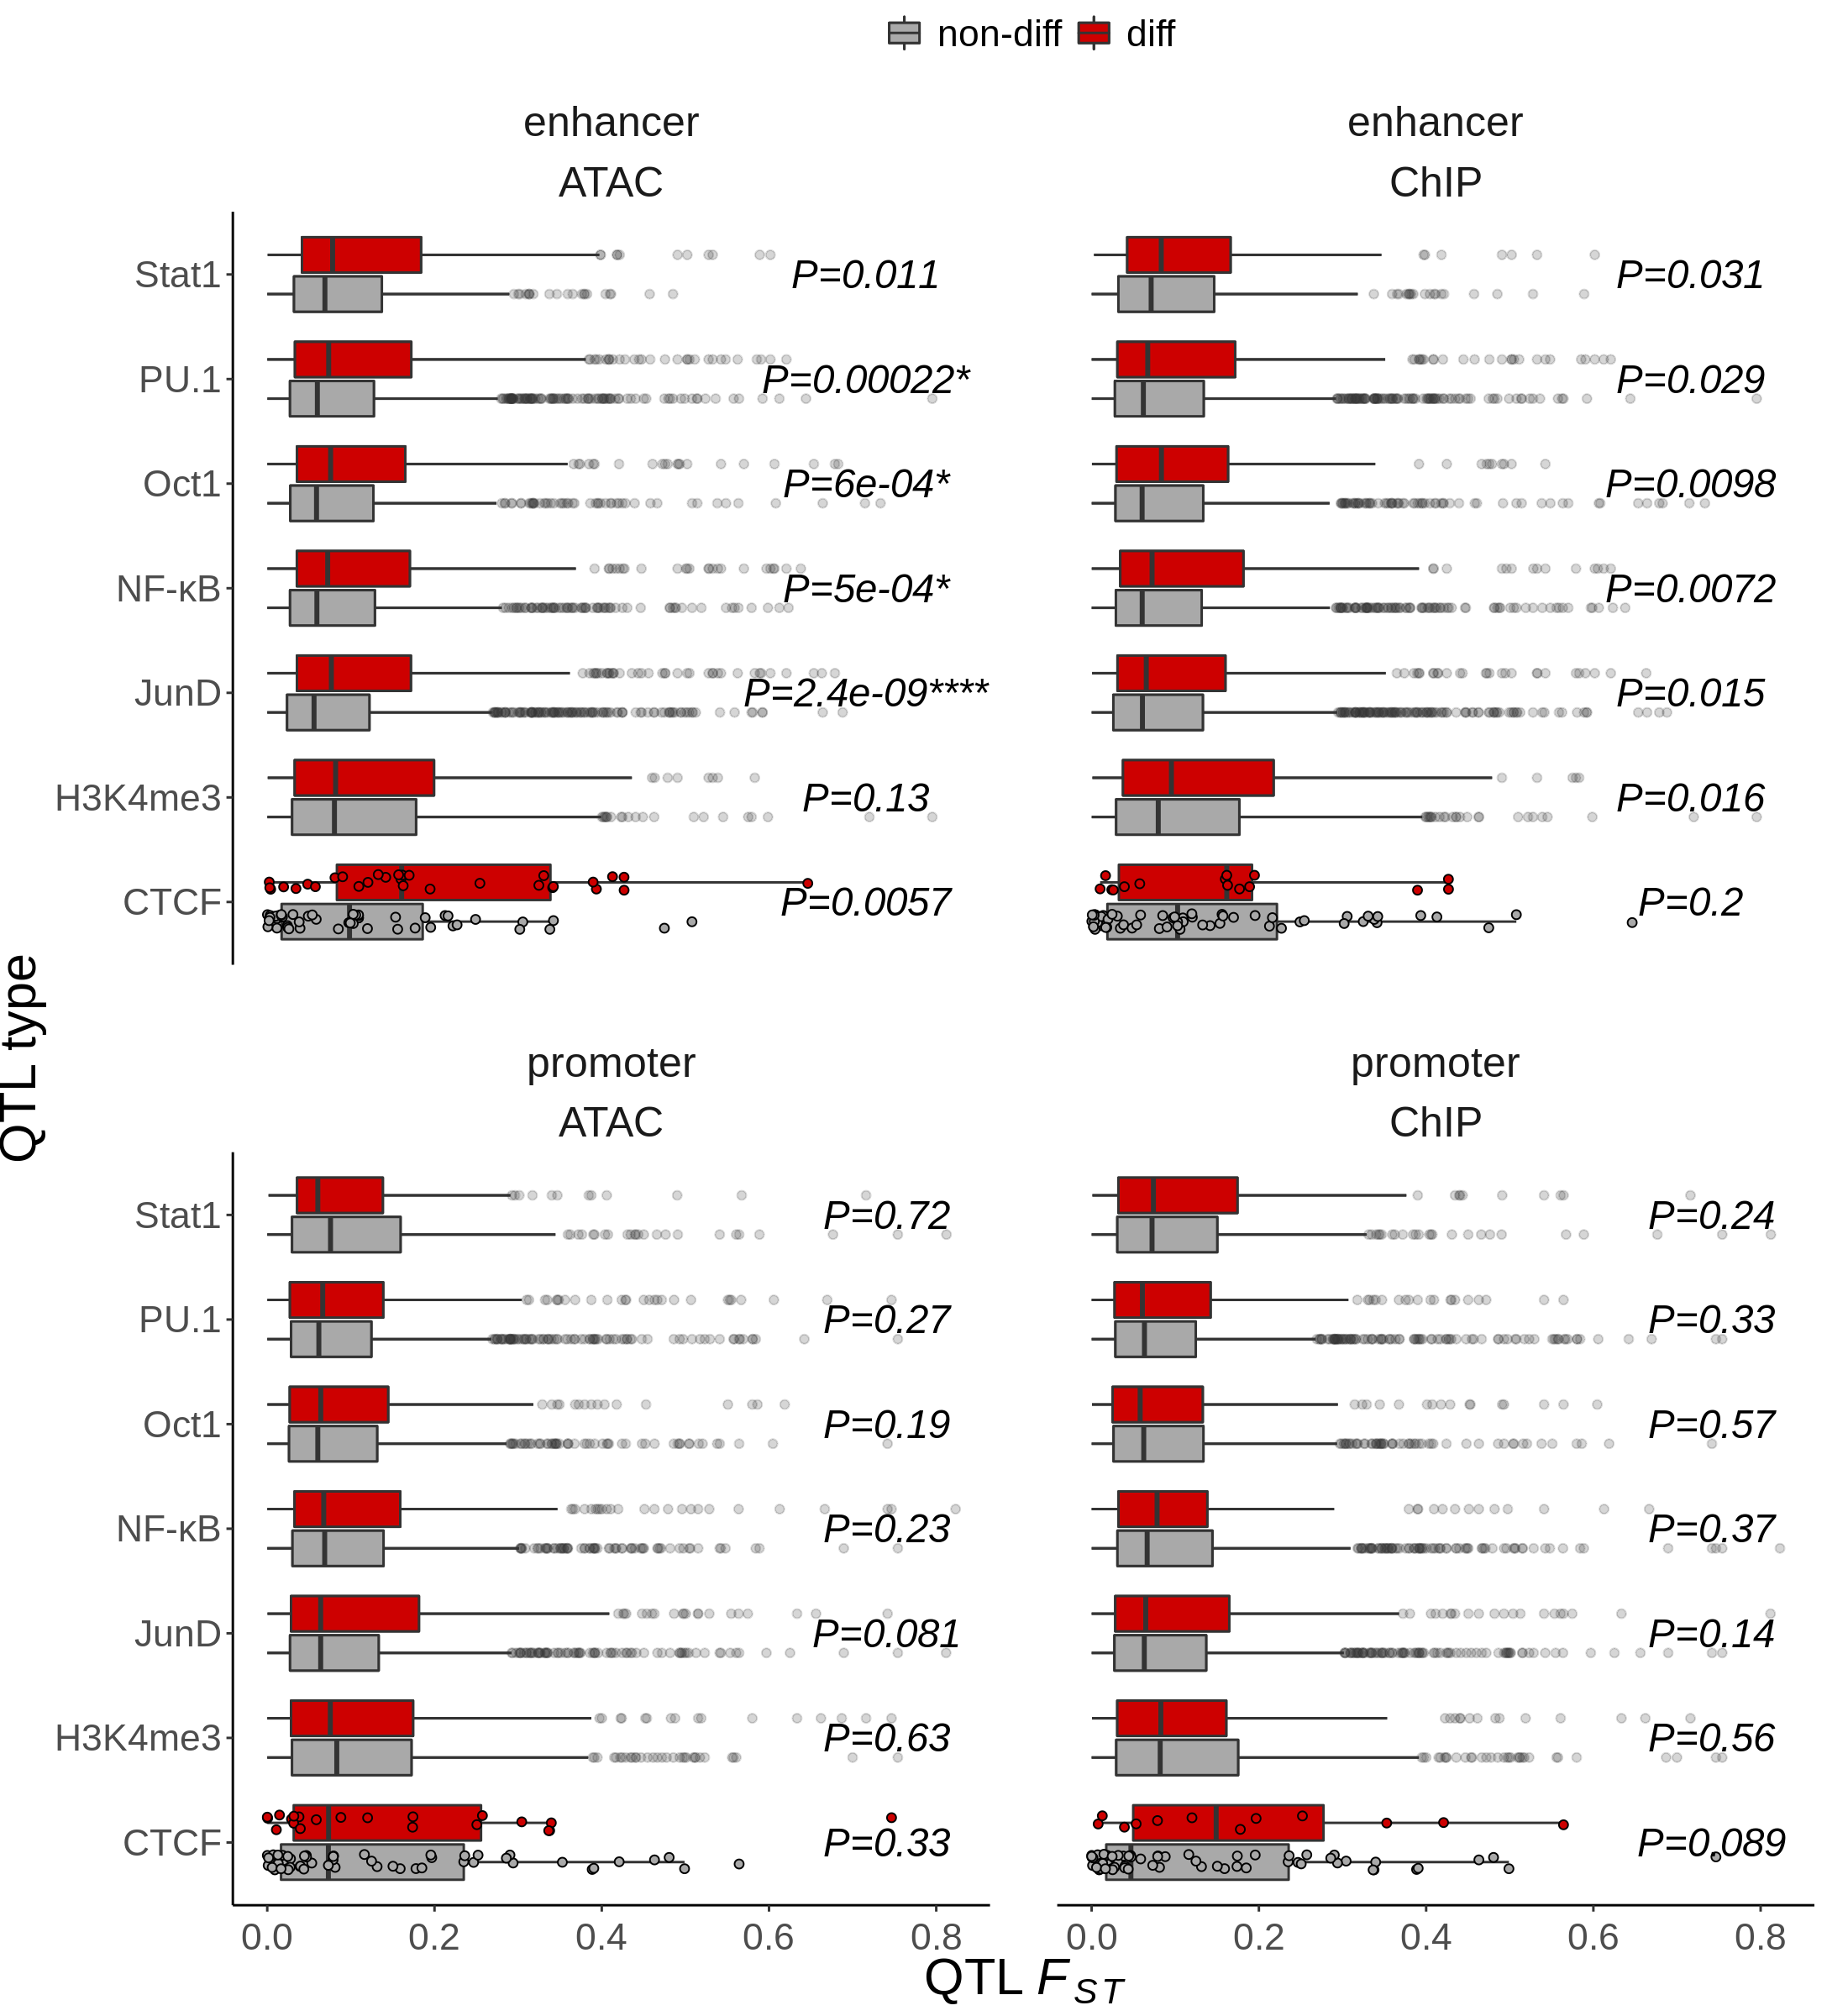

In [43]:
p18 <- groupedBoxplot(bfw %>%
                             mutate(diff_status = fct_relevel(diff_status,c('non-diff','diff'))) %>%
                             dplyr::filter(qtl_type=='bqtl',
                                    score_type %in% c('ATAC','ChIP')),
             'chip_type',
             'fst_var',
             groupvar='diff_status',
             xlab='QTL type',
             ylab=expression('QTL '*italic(F[ST])),
             plotpoints=TRUE,
             show_wilcox=TRUE,
             pvalsize=6,
             nominal_p_only=FALSE,
             legtextsize=16,
             alt='less',
             logscale=FALSE,
             colorX=FALSE,
             colorvals=c('darkgray','red3'),
             showleg=TRUE,
             legendpos='top',
             horizontal=TRUE,
             facets=c('cre_type','score_type'),
             frows=2,
             fscales='fixed',
             fdir='h',
             w=11,h=12,
             angleHjVj=c(0,.5,0),
             debug=FALSE) +
          theme(legend.title = element_blank()) +
#         ggtitle("Ancestry divergence of select TF bQTL allele\nfrequency is greater in diff-ATAC enhancers") +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p18

ggsave(
    file.path(
        outdir, 
        'Fig4a.png'
    ),
    width=11, 
    height=12
)

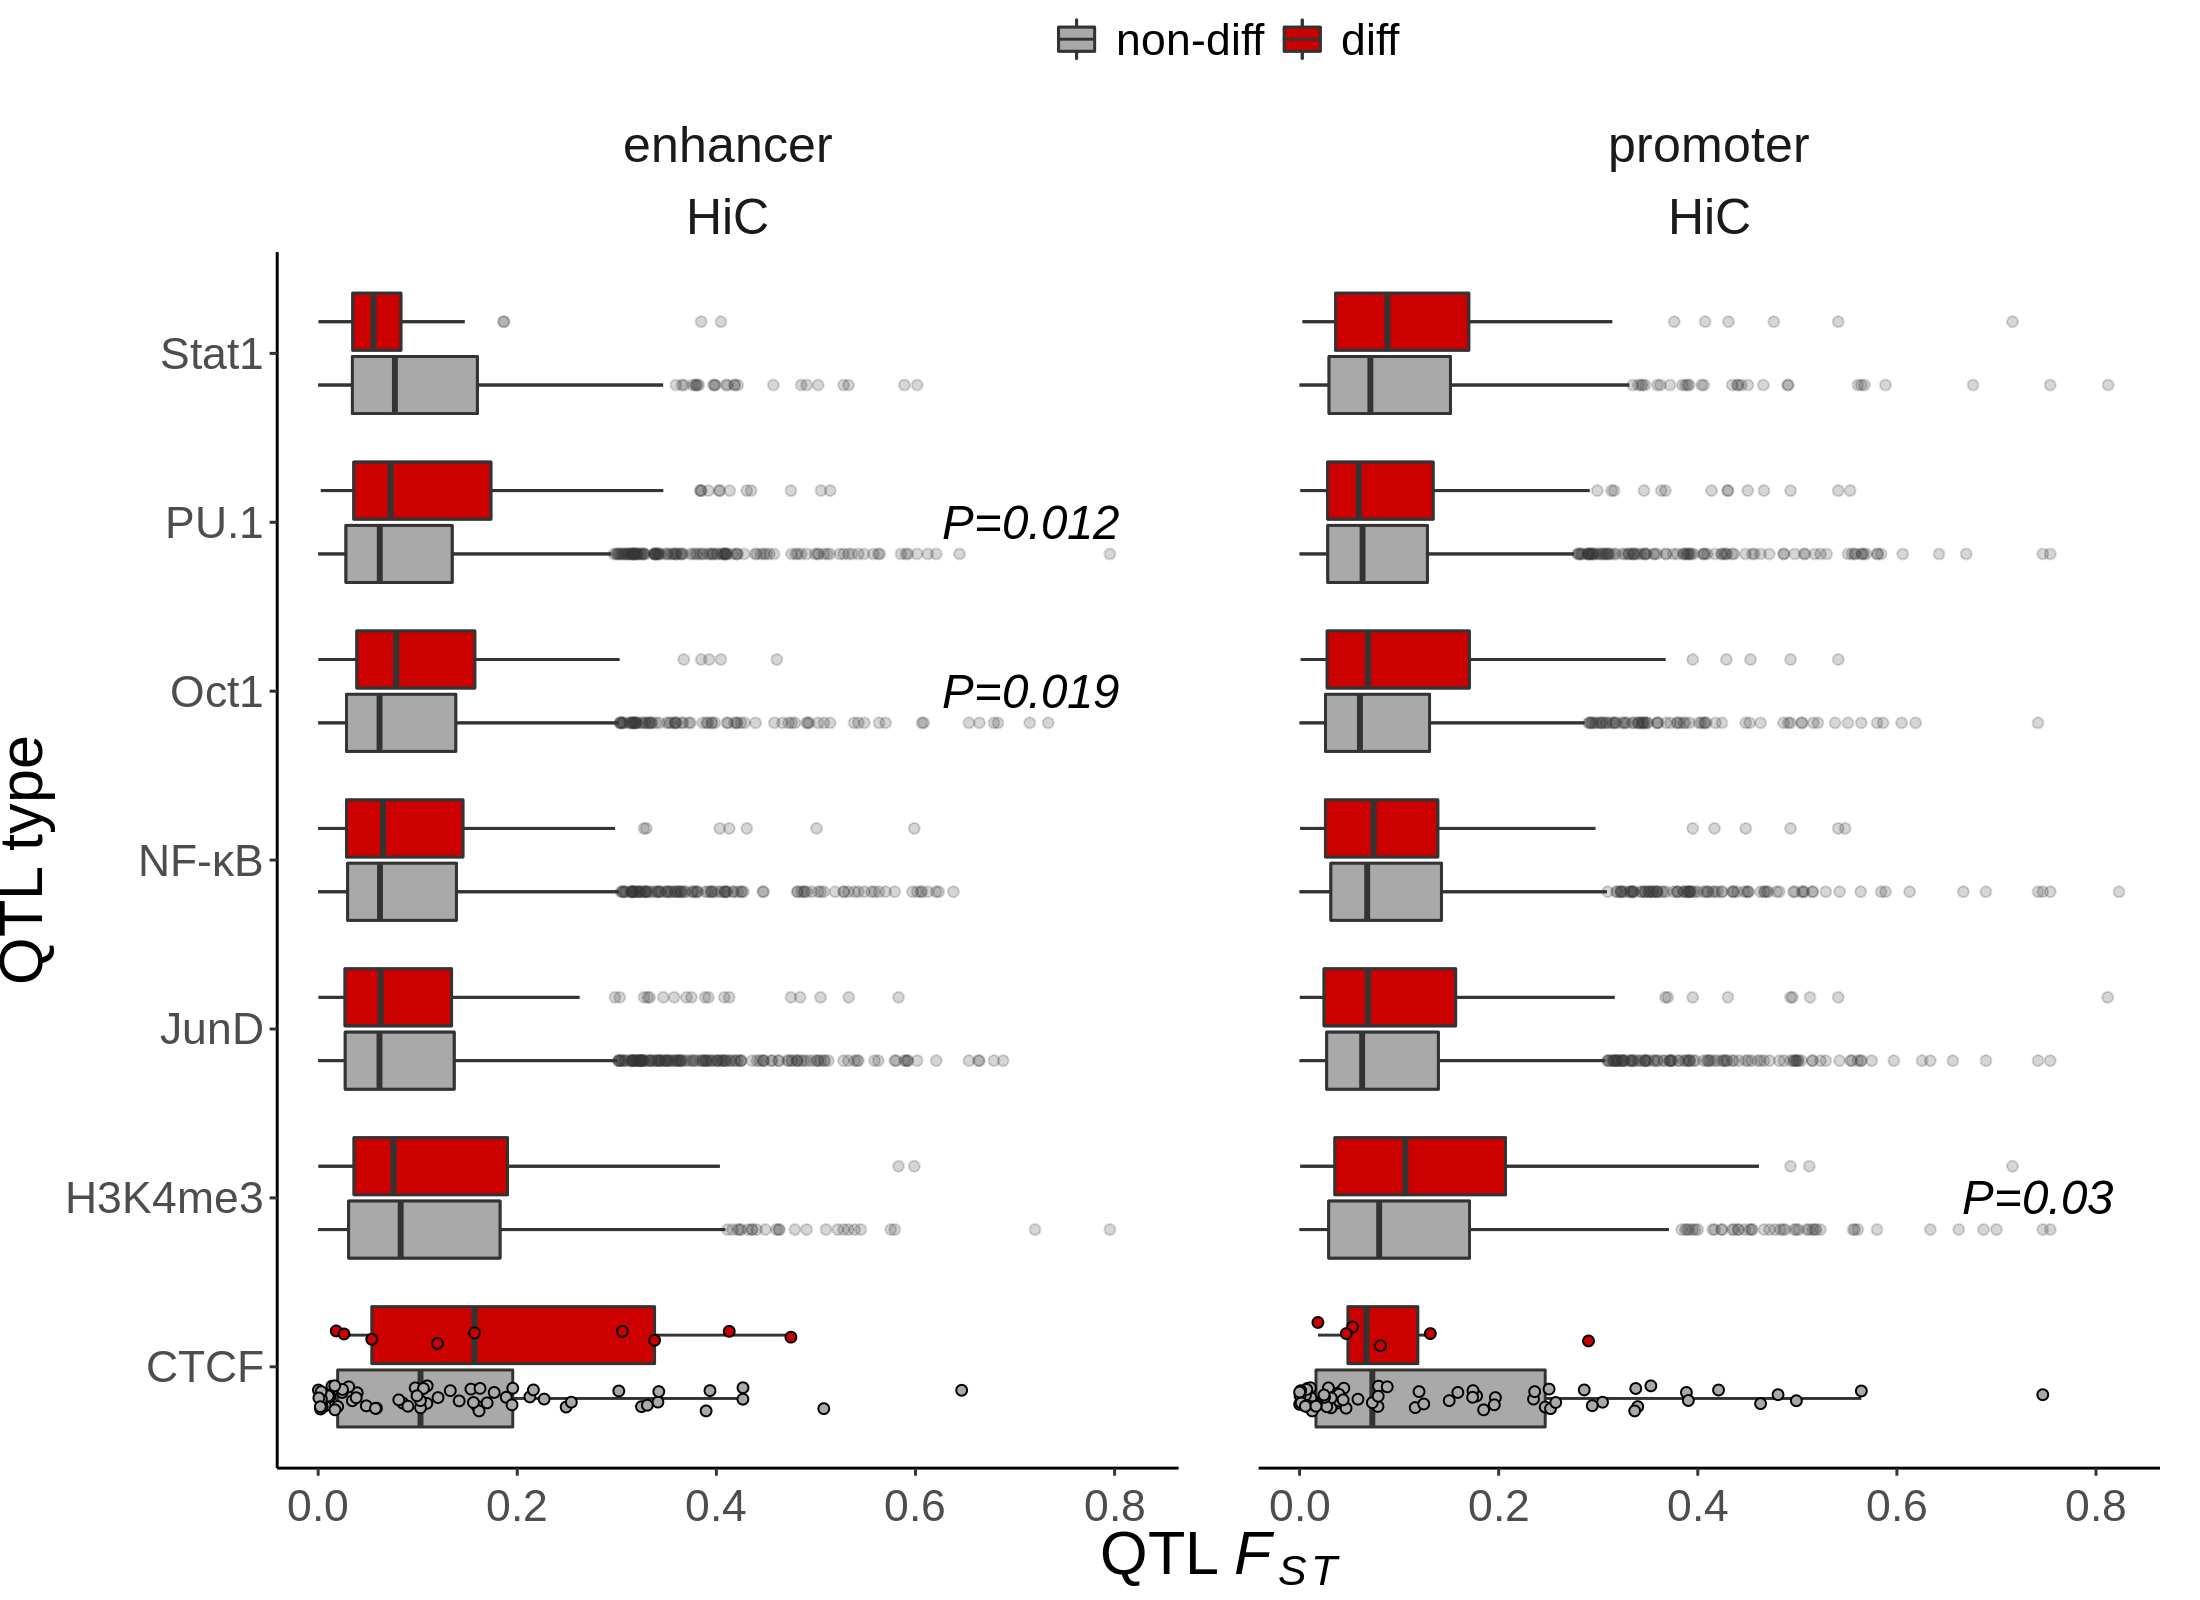

In [27]:
ps4 <- groupedBoxplot(bfw %>%
                             mutate(diff_status = fct_relevel(diff_status,c('non-diff','diff'))) %>%
                             dplyr::filter(qtl_type=='bqtl',
                                    score_type %in% c('HiC')),
             'chip_type',
             'fst_var',
             groupvar='diff_status',
             xlab='QTL type',
             ylab=expression('QTL '*italic(F[ST])),
             plotpoints=TRUE,
             show_wilcox=TRUE,
             pvalsize=6,
             nominal_p_only=TRUE,
             legtextsize=16,
             alt='less',
             logscale=FALSE,
             colorX=FALSE,
             colorvals=c('darkgray','red3'),
             showleg=TRUE,
             legendpos='top',
             horizontal=TRUE,
             facets=c('cre_type','score_type'),
             frows=1,
             fscales='fixed',
             fdir='h',
             w=11,h=8,
             angleHjVj=c(0,.5,0),
             debug=FALSE) +
          theme(legend.title = element_blank())
ps4

## b

In [28]:
bfe %>%
    dplyr::filter(qtl_type=='bqtl',
                  test_type=='binomSignTest',
                  n_trials > 0,
                  cre_type=='all') %>% 
    arrange(pvalue)

qtl_significance diff_significance odds_ratio pvalue    conf_lower
1  0.05             0.05              1.2044742  0.1211117 0.94830315
2  0.05             0.05              1.0905436  0.2698537 0.93218730
3  0.05             0.05              0.7608454  0.2803897 0.39347368
4  0.05             0.05              0.8781767  0.2921412 0.66851668
5  0.05             0.05              1.1500073  0.2985269 0.87396384
6  0.05             0.05              1.1748670  0.3779734 0.80425064
7  0.05             0.05              1.4857143  0.3823746 0.52665240
8  0.05             0.05              0.9452693  0.4043622 0.81789270
9  0.05             0.05              0.9521501  0.4224439 0.83589584
10 0.05             0.05              1.0302230  0.4267420 0.95601764
11 0.05             0.05              1.0604752  0.4342058 0.90838422
12 0.05             0.05              0.8792609  0.4668521 0.58966238
13 0.05             0.05              1.0308915  0.4740148 0.94565809
14 0.05             0.05              1.0390801  0.4943929 0.93252722
15 0.05             0.05              1.0651138  0.5348995 0.85700681
16 0.05             0.05              1.0243490  0.5365776 0.94684497
17 0.05             0.05              1.0804299  0.5519043 0.80308756
18 0.05             0.05              1.1818182  0.5620194 0.57182304
19 0.05             0.05              1.0486965  0.5664890 0.89023149
20 0.05             0.05              1.0823646  0.5761151 0.82698102
21 0.05             0.05              1.0531265  0.5845166 0.86893893
22 0.05             0.05              0.9061147  0.6493748 0.57123349
23 0.05             0.05              1.1579854  0.6674609 0.61767247
24 0.05             0.05              0.9552496  0.6960005 0.74093962
25 0.05             0.05              0.9450838  0.7315357 0.68557143
26 0.05             0.05              1.0646465  0.7554334 0.67117519
27 0.05             0.05              1.0268509  0.7618846 0.87270366
28 0.05             0.05              1.0601070  0.7792417 0.70547799
29 0.05             0.05              1.0121348  0.8328720 0.91152303
30 0.05             0.05              1.0113457  0.8418064 0.91483220
31 0.05             0.05              1.0181018  0.8464533 0.85033716
32 0.05             0.05              1.0097497  0.8608208 0.92240391
33 0.05             0.05              0.9941863  0.9373243 0.86571305
34 0.05             0.05              0.9886826  0.9383030 0.82642836
35 0.05             0.05              1.0416667  1.0000000 0.47991779
36 0.05             0.05              1.0869565  1.0000000 0.42584907
37 0.05             0.05              0.7647059  1.0000000 0.01923865
38 0.05             0.05              1.0034453  1.0000000 0.52562405
39 0.05             0.05              0.9814815  1.0000000 0.49203087
40 0.05             0.05              1.0229508  1.0000000 0.57939333
41 0.05             0.05              0.9991511  1.0000000 0.54138462
42 0.05             0.05              0.7763158  1.0000000 0.09891513
   conf_upper up_up up_down down_up down_down test_type     qtl_type score_type
1  1.455619   NA    NA      NA      NA        binomSignTest bqtl     HiC       
2  1.244995   NA    NA      NA      NA        binomSignTest bqtl     HiC       
3  1.211694   NA    NA      NA      NA        binomSignTest bqtl     HiC       
4  1.103296   NA    NA      NA      NA        binomSignTest bqtl     ATAC      
5  1.429745   NA    NA      NA      NA        binomSignTest bqtl     ATAC      
6  1.509797   NA    NA      NA      NA        binomSignTest bqtl     ATAC      
7  1.847763   NA    NA      NA      NA        binomSignTest bqtl     ChIP      
8  1.075654   NA    NA      NA      NA        binomSignTest bqtl     ATAC      
9  1.064096   NA    NA      NA      NA        binomSignTest bqtl     ChIP      
10 1.103048   NA    NA      NA      NA        binomSignTest bqtl     ATAC      
11 1.212566   NA    NA      NA      NA        binomSignTest bqtl     ChIP      
12 1.212242   NA    NA      NA   

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



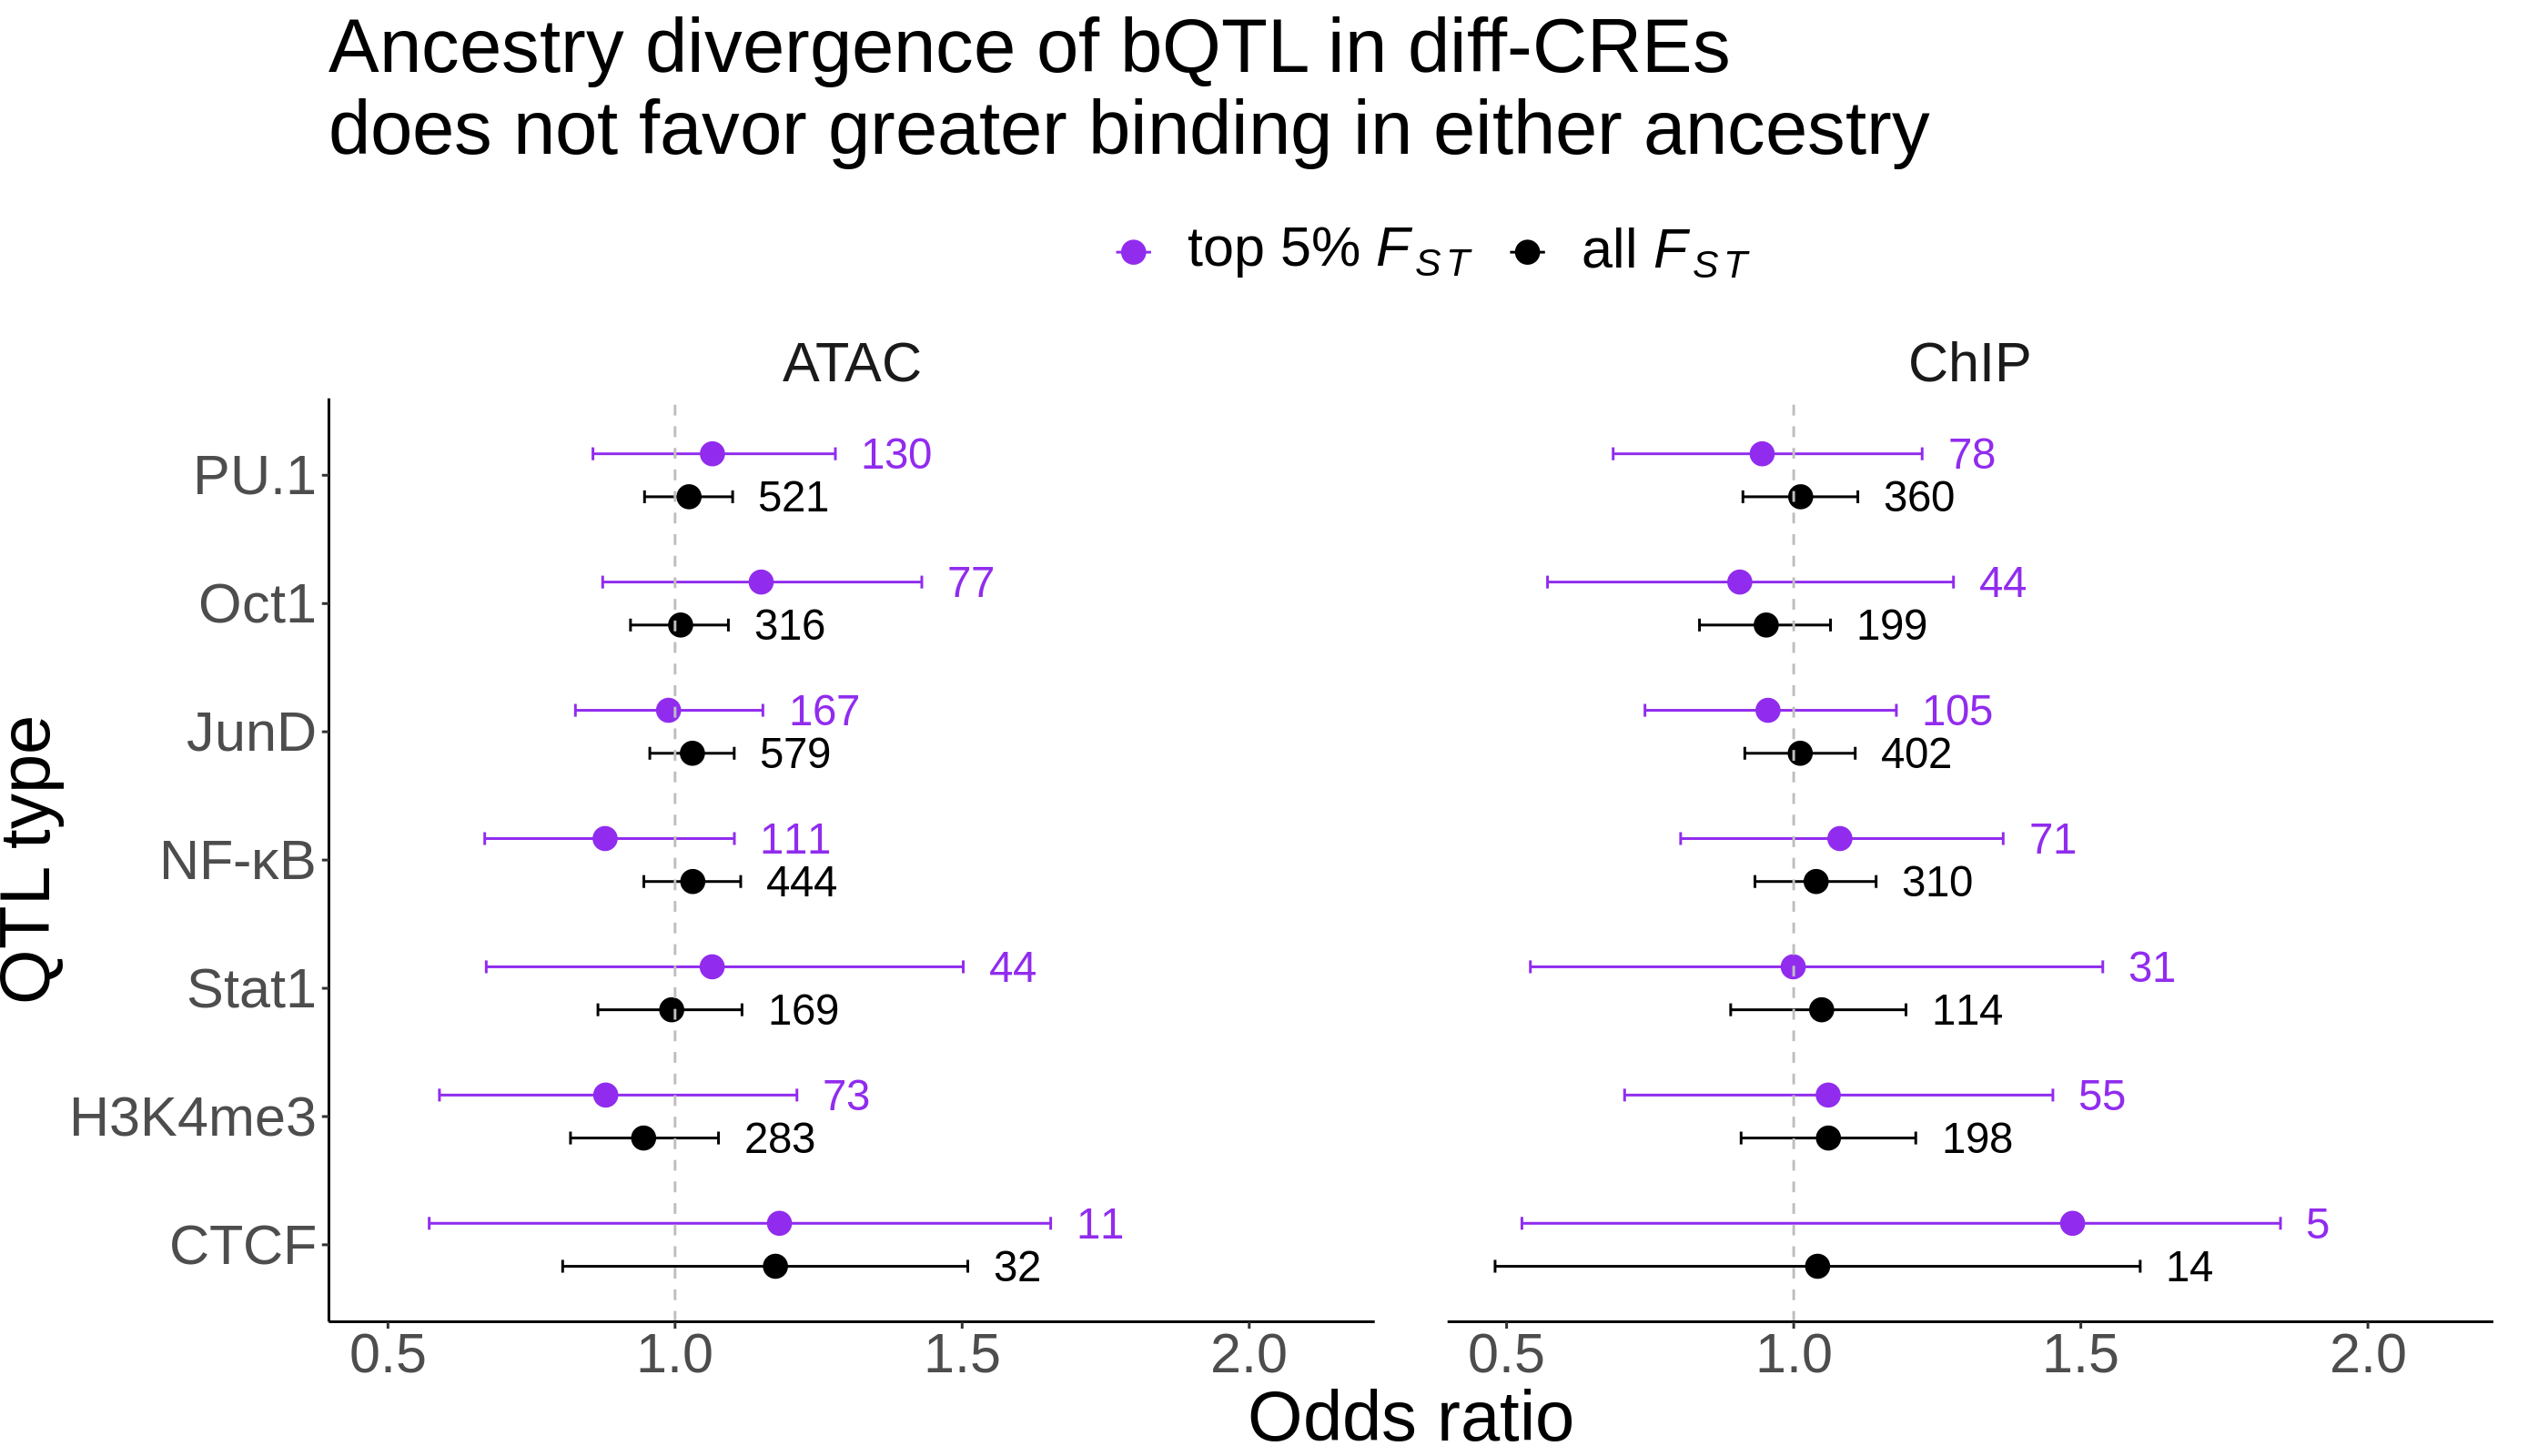

In [29]:
# binomial sign test

ntests <- 28

p14 <- plotFisherEnrichments(bfe %>%
                                    dplyr::filter(qtl_type=='bqtl',
                                                  test_type=='binomSignTest',
                                                  n_trials > 0,
                                                  cre_type=='all') %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)) %>% 
                                 dplyr::filter(score_type!='HiC'),
                                yvar_col='chip_type',
                                ylabel='QTL type',
                                xlabel='Odds ratio',
                                xvar_col='odds_ratio',
                                althypoth='two.sided',
                                line_intercept=1,
                                groupvar='fst_percentile',
                                groupvarord=NULL,
                                colorvals=c('black','purple2'),
                                sep_groups=FALSE,
                                groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                                  w=14,
                                  h=8,
                                 facets='score_type',
                                frows=1,
                                fscales='fixed', # free, free_x, free_y
                                fdir='v',
                                flabpos='top',
                                debug=FALSE) + 
                  scale_color_discrete(type = c('black','purple2'),
                                       labels = c(expression("all "*italic(F[ST])),
                                                  expression("top 5% "*italic(F[ST])))) + 
                  theme(legend.spacing.x = unit(1, 'line')) +
                  ggtitle("Ancestry divergence of bQTL in diff-CREs\ndoes not favor greater binding in either ancestry") +
                  theme(plot.title = element_text(size=30, hjust=0, margin=margin(7.5,0,15,0)))
p14

ggsave(
    file.path(
        suppdir, 
        'FigSX_binom_sign_test_TD.png'
    ),
    width=14, 
    height=8
)


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



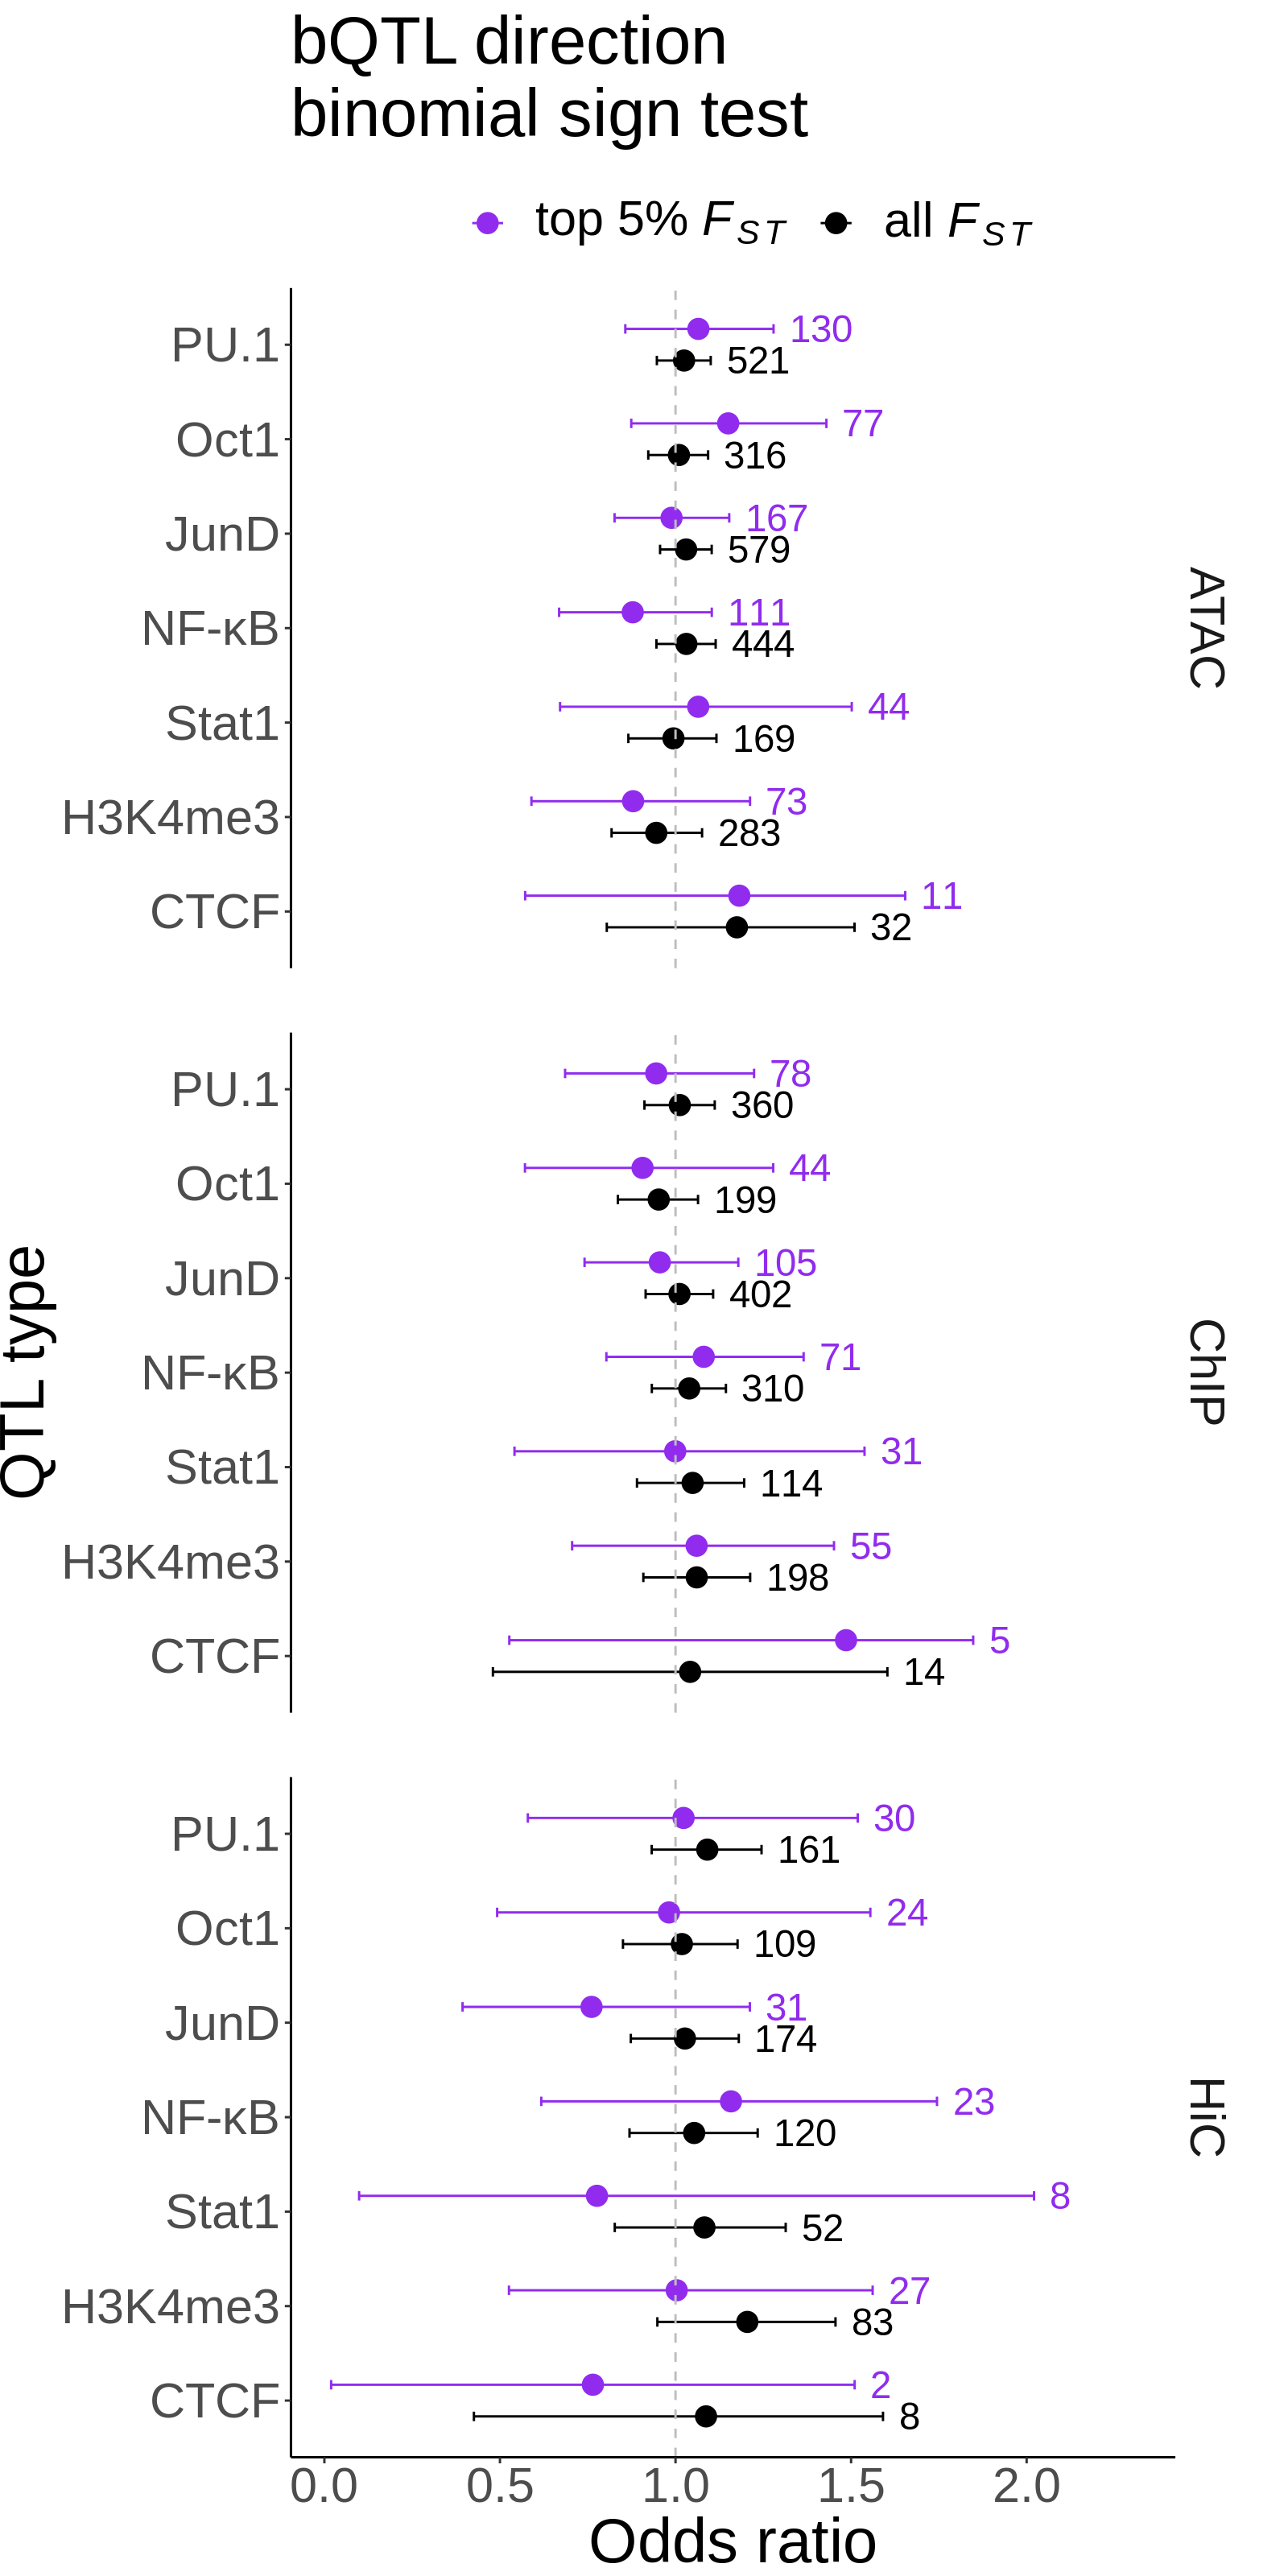

In [30]:
# binomial sign test

ntests <- 28

p14 <- plotFisherEnrichments(bfe %>%
                                    dplyr::filter(qtl_type=='bqtl',
                                                  test_type=='binomSignTest',
                                                  n_trials > 0,
                                                  cre_type=='all') %>% 
                              mutate(padj = case_when(score_type %in% c('ATAC','ChIP') ~ pvalue*ntests,
                                                      TRUE ~ 1)),
                                yvar_col='chip_type',
                                ylabel='QTL type',
                                xlabel='Odds ratio',
                                xvar_col='odds_ratio',
                                althypoth='two.sided',
                                line_intercept=1,
                                groupvar='fst_percentile',
                                groupvarord=NULL,
                                colorvals=c('black','purple2'),
                                sep_groups=FALSE,
                                groupvarlab=NULL,
                                  dodgewidth=0.67,
                                  legendpos='top', # c(xpos, ypos)
                                  w=8,
                                  h=16,
                                 facets='score_type',
                                frows=3,
                                fscales='fixed', # free, free_x, free_y
                                fdir='v',
                                flabpos='right',
                                debug=FALSE) + 
                  scale_color_discrete(type = c('black','purple2'),
                                       labels = c(expression("all "*italic(F[ST])),
                                                  expression("top 5% "*italic(F[ST])))) + 
                  theme(legend.spacing.x = unit(1, 'line')) +
                  ggtitle("bQTL direction\nbinomial sign test") +
#                   ggtitle("Ancestry divergence of bQTL in\ndiff-CREs does not favor greater\nbinding in either ancestry") +
                  theme(plot.title = element_text(size=30, hjust=0, margin=margin(7.5,0,15,0)))
p14

ggsave(
    file.path(
        suppdir, 
        'FigSX_binom_sign_test.png'
    ),
    width=8, 
    height=16
)
# ggsave(
#     file.path(
#         outdir, 
#         'Fig4b.svg'
#     ),
#     width=18, 
#     height=8
# )

# Fig. S4

## b

In [31]:
cre_colors

[1] "#DF241B" "#739893"

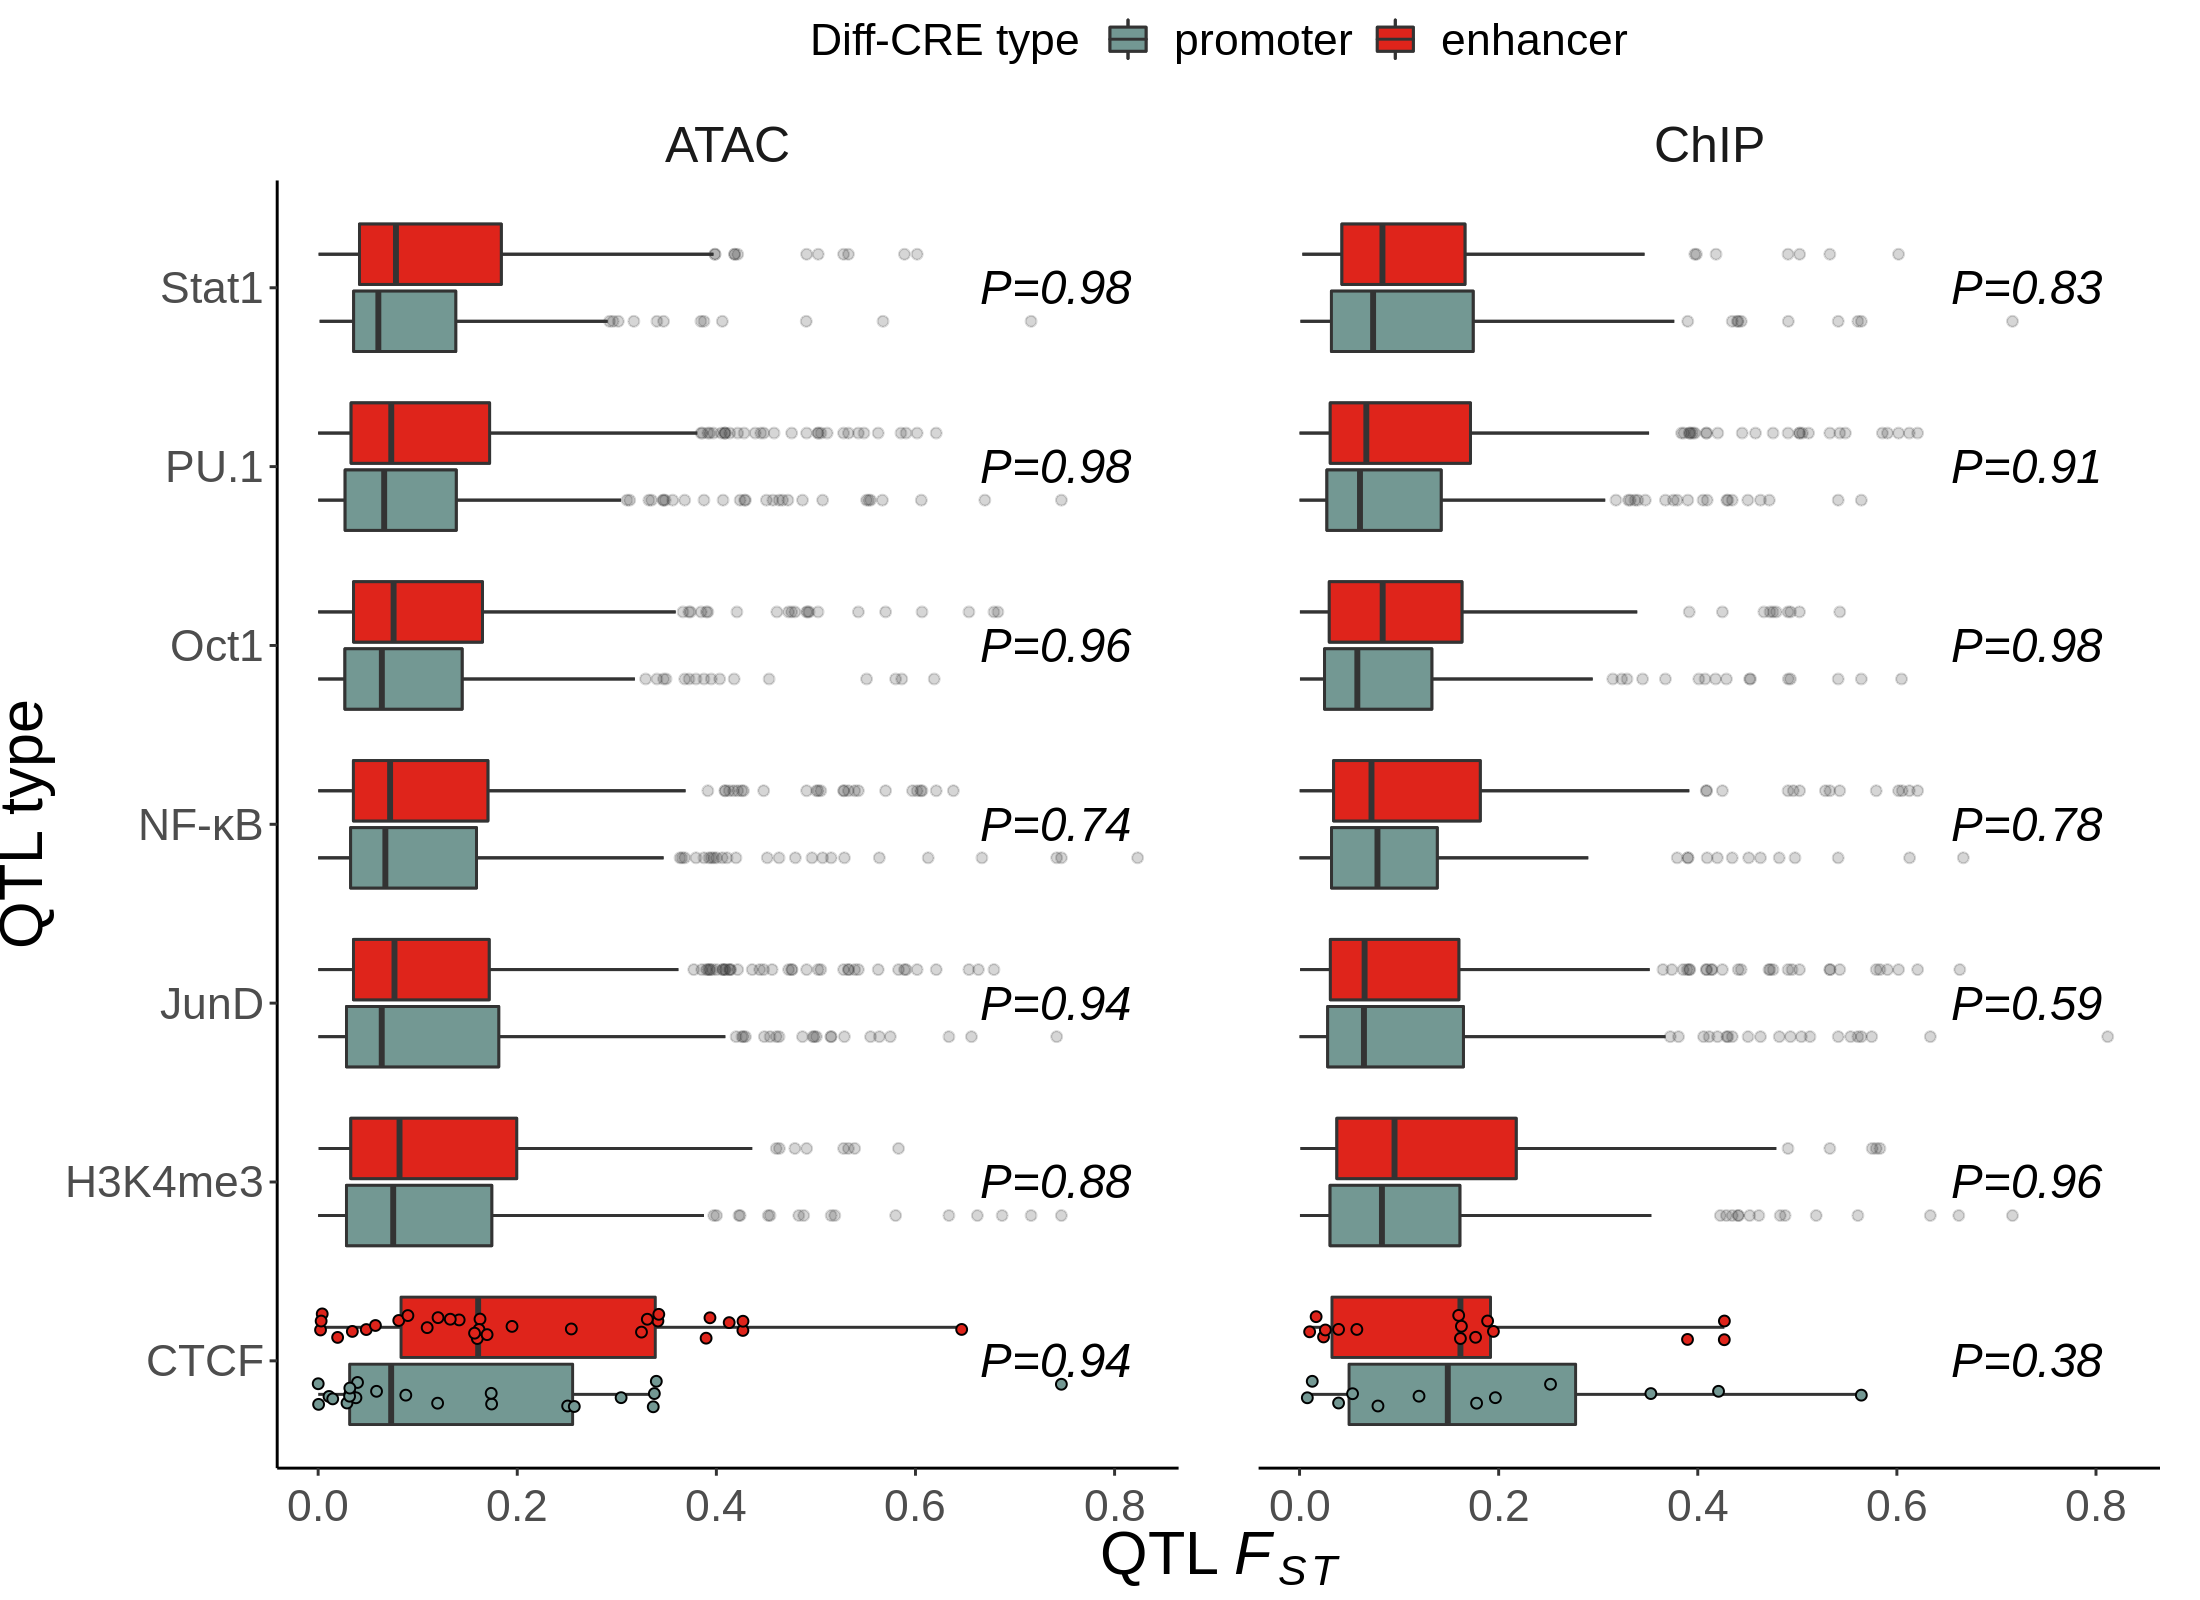

In [42]:
p19 <- groupedBoxplot(bfw %>%
                    dplyr::filter(qtl_type=='bqtl',
                                  diff_status=='diff',
                                    score_type %in% c('ATAC','ChIP')) %>% 
                        mutate(cre_type = fct_relevel(factor(cre_type),rev)),
             'chip_type',
             'fst_var',
             groupvar='cre_type',
             xlab='QTL type',
             ylab=expression('QTL '*italic(F[ST])),
             plotpoints=TRUE,
             show_wilcox=TRUE,
             pvalsize=6,
             nominal_p_only=FALSE,
             legtextsize=16,
             alt='greater',
             logscale=FALSE,
             colorX=FALSE,
             colorvals=c('#739893','#DF241B'),
             showleg=TRUE,
             legendpos='top',
             horizontal=TRUE,
             facets='score_type',
             frows=1,
             fscales='fixed',
             fdir='h',
             w=11,h=8,
             angleHjVj=c(0,.5,0),
             debug=FALSE) +
          labs(fill='Diff-CRE type', alpha='Diff-CRE type') +
#         ggtitle("Ancestry divergence of diff-ATAC and diff-ChIP\nbQTL allele frequency tends to be greater\nin enhancers than in promoters") +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p19

ggsave(
    file.path(
        outdir, 
        'Fig4b.png'
    ),
    width=11, 
    height=7
)

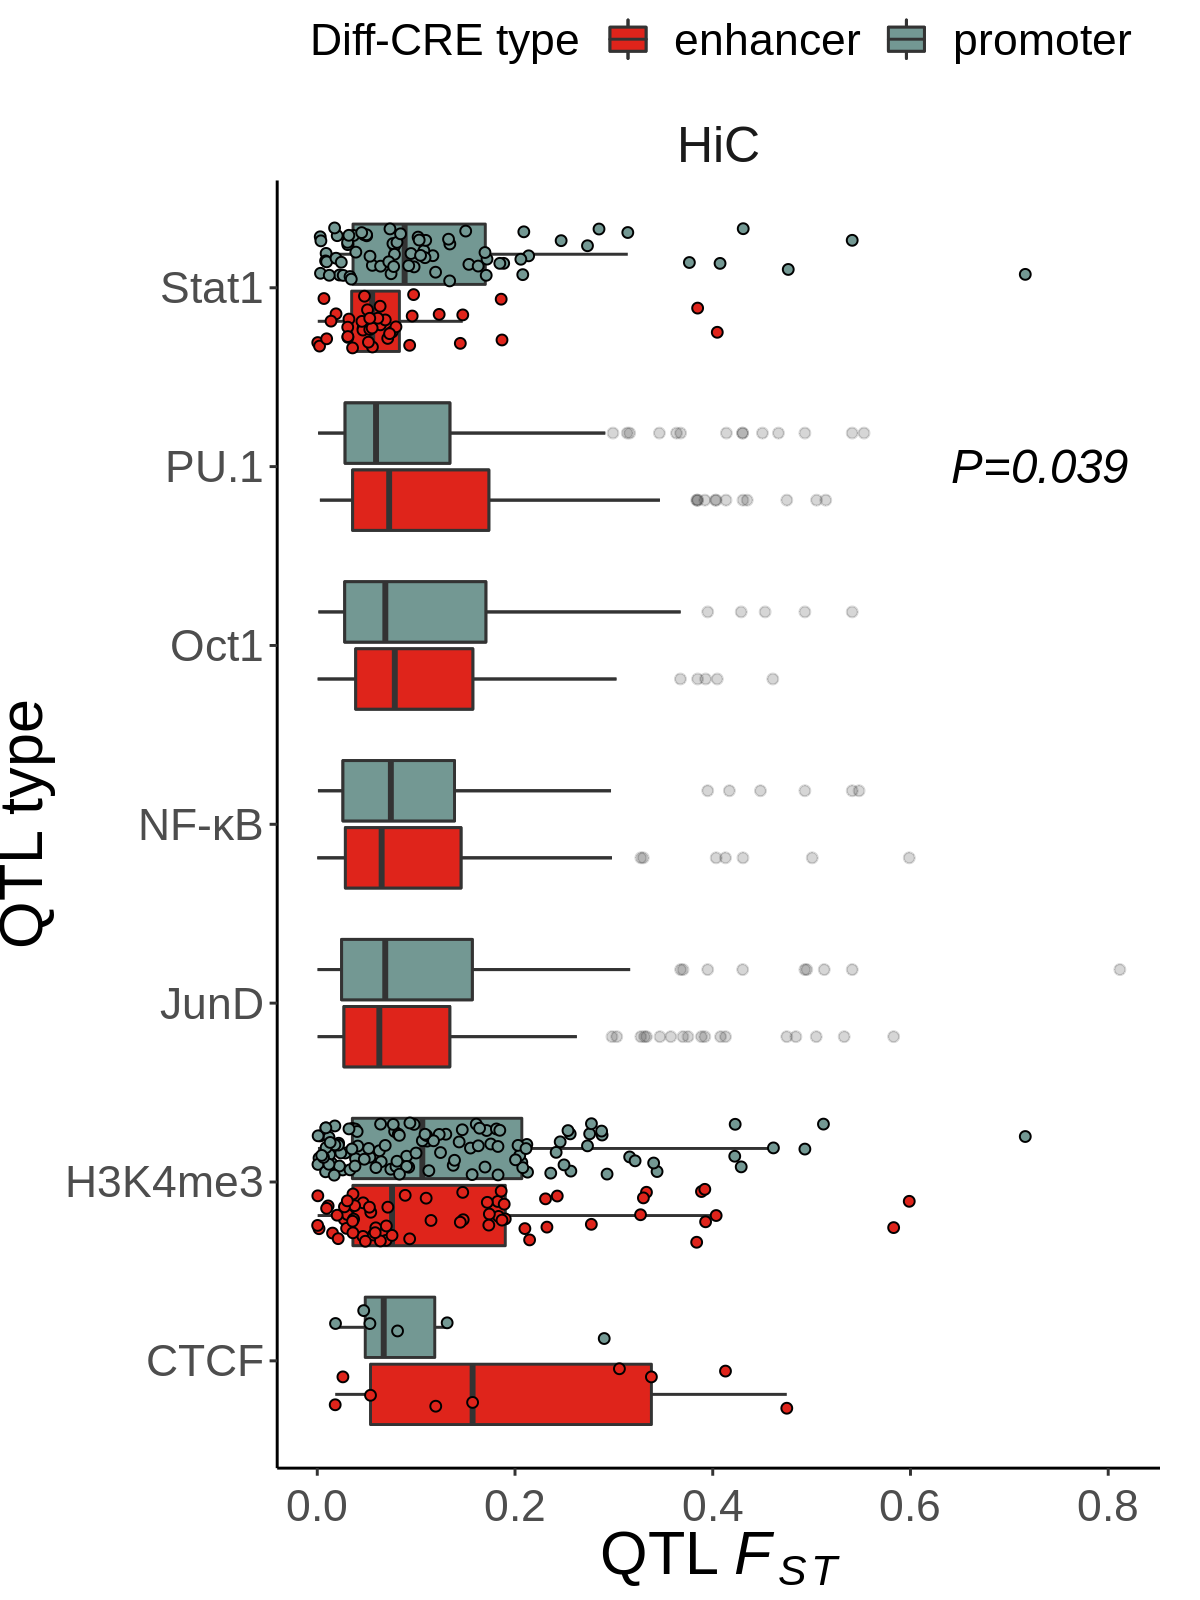

In [33]:
ps5 <- groupedBoxplot(bfw %>%
                    dplyr::filter(qtl_type=='bqtl',
                                  diff_status=='diff',
                                    score_type %in% c('HiC')),
             'chip_type',
             'fst_var',
             groupvar='cre_type',
             xlab='QTL type',
             ylab=expression('QTL '*italic(F[ST])),
             plotpoints=TRUE,
             show_wilcox=TRUE,
             pvalsize=6,
             nominal_p_only=TRUE,
             legtextsize=16,
             alt='greater',
             logscale=FALSE,
             colorX=FALSE,
             colorvals=cre_colors,
             showleg=TRUE,
             legendpos='top',
             horizontal=TRUE,
             facets='score_type',
             frows=1,
             fscales='fixed',
             fdir='h',
             w=6,h=8,
             angleHjVj=c(0,.5,0),
             debug=FALSE) +
          labs(fill='Diff-CRE type', alpha='Diff-CRE type')
ps5


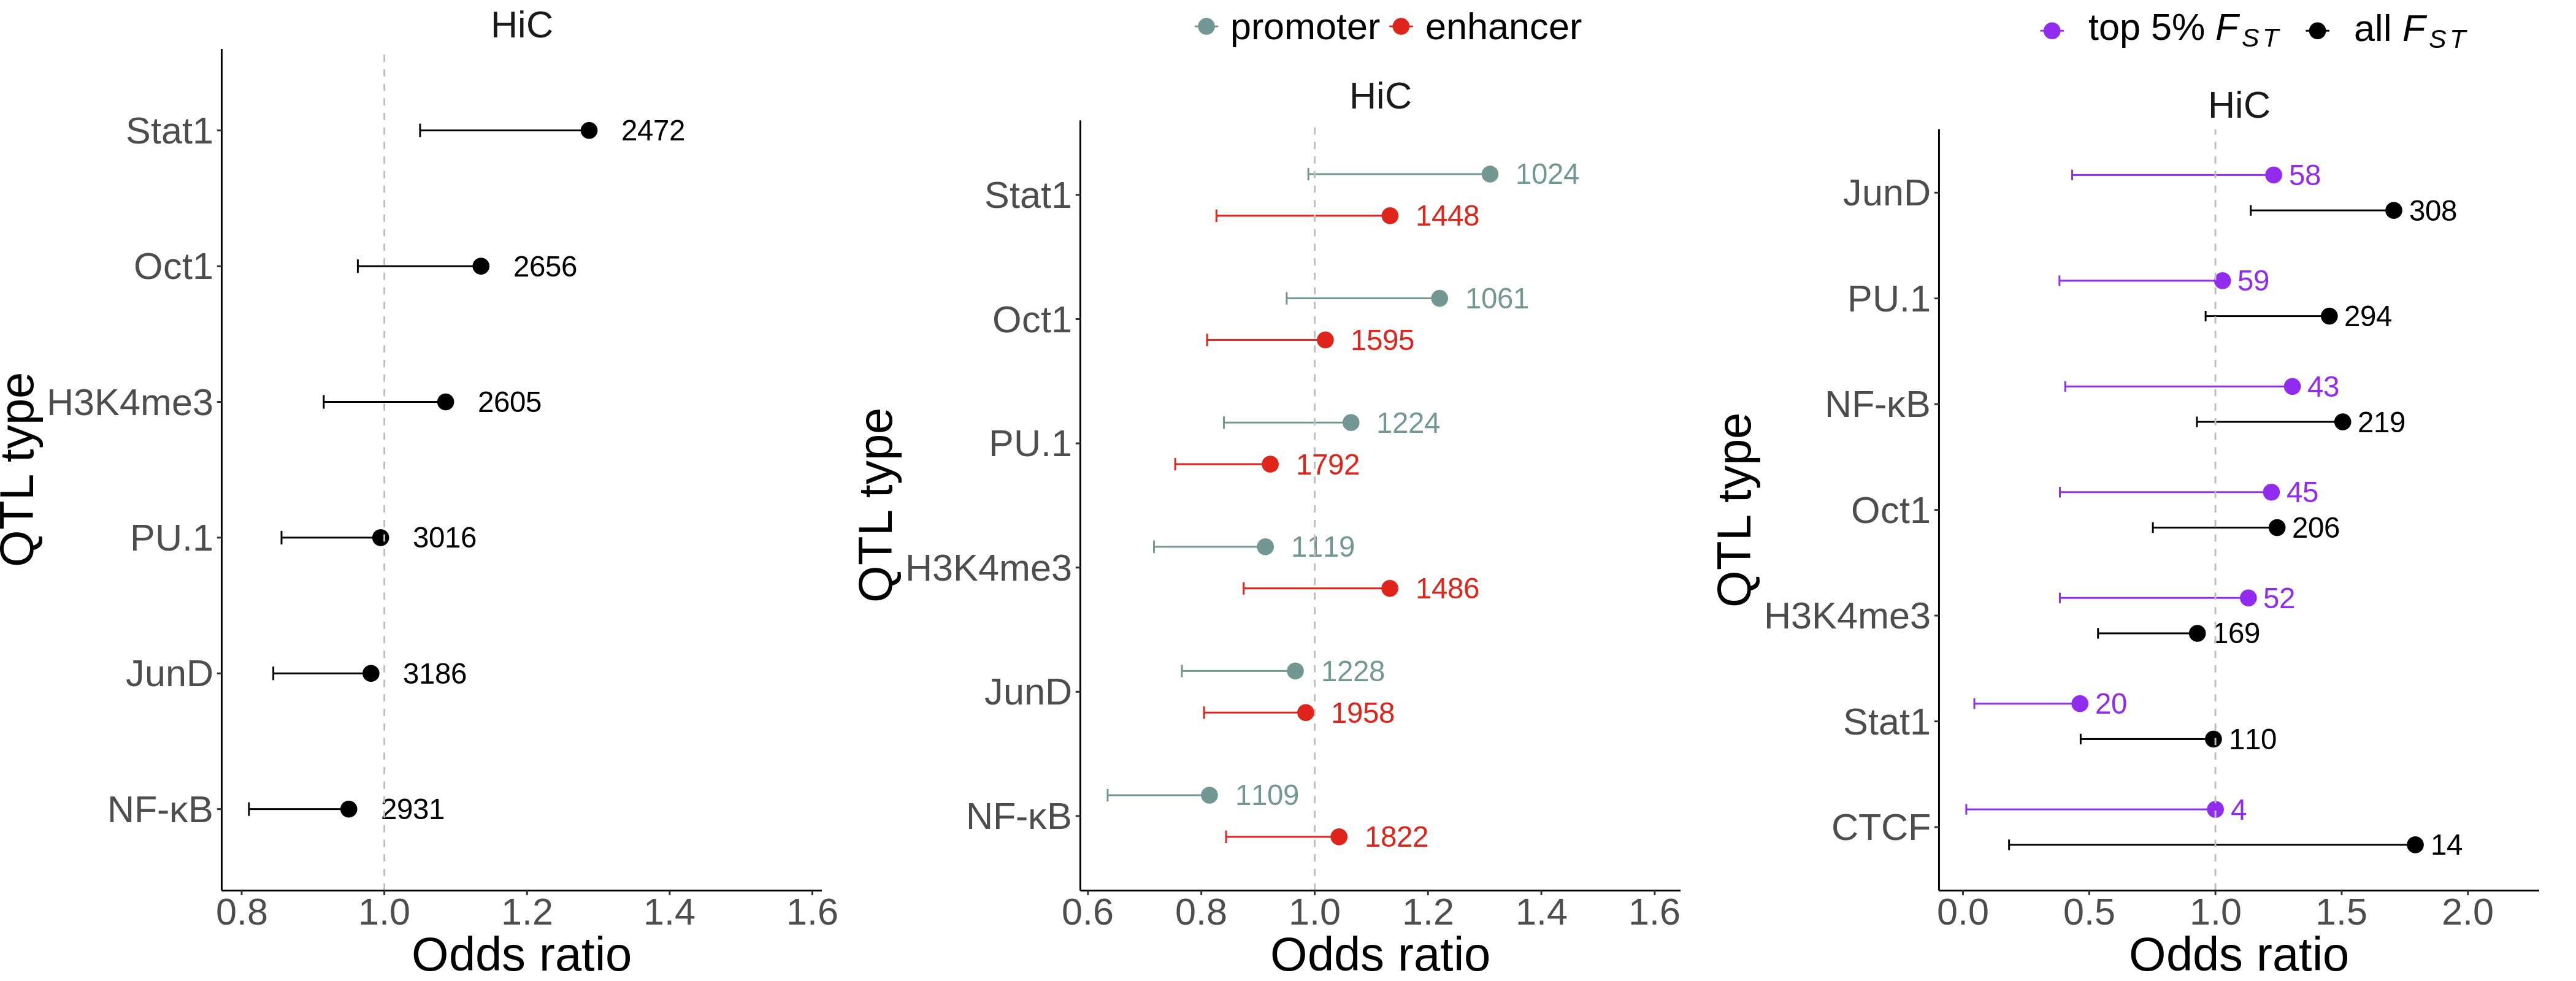

In [34]:
# w=7, h=8

options(repr.plot.width = 21, repr.plot.height = 8, repr.plot.res = 200)

g1 <- gridExtra::grid.arrange(
      ps1
#         theme(plot.margin = unit(c(0,3,0,0),"line"))
        ,
      ps2
#         theme(plot.margin = unit(c(0,1.5,0,0),"line"))
        ,
      ps3,
      nrow = 1
#       top = grid::textGrob(
#            gtitle,
#            gp = grid::gpar(fontsize = 26)
#       ),
#       padding = unit(3, "line")
    )
grid::grid.draw(g1)

ggsave(
    file.path(
        suppdir, 
        'HiC_bQTL.png'
    ),
    plot=g1,
    width=21, 
    height=8
)

In [35]:
11/17

[1] 0.6470588

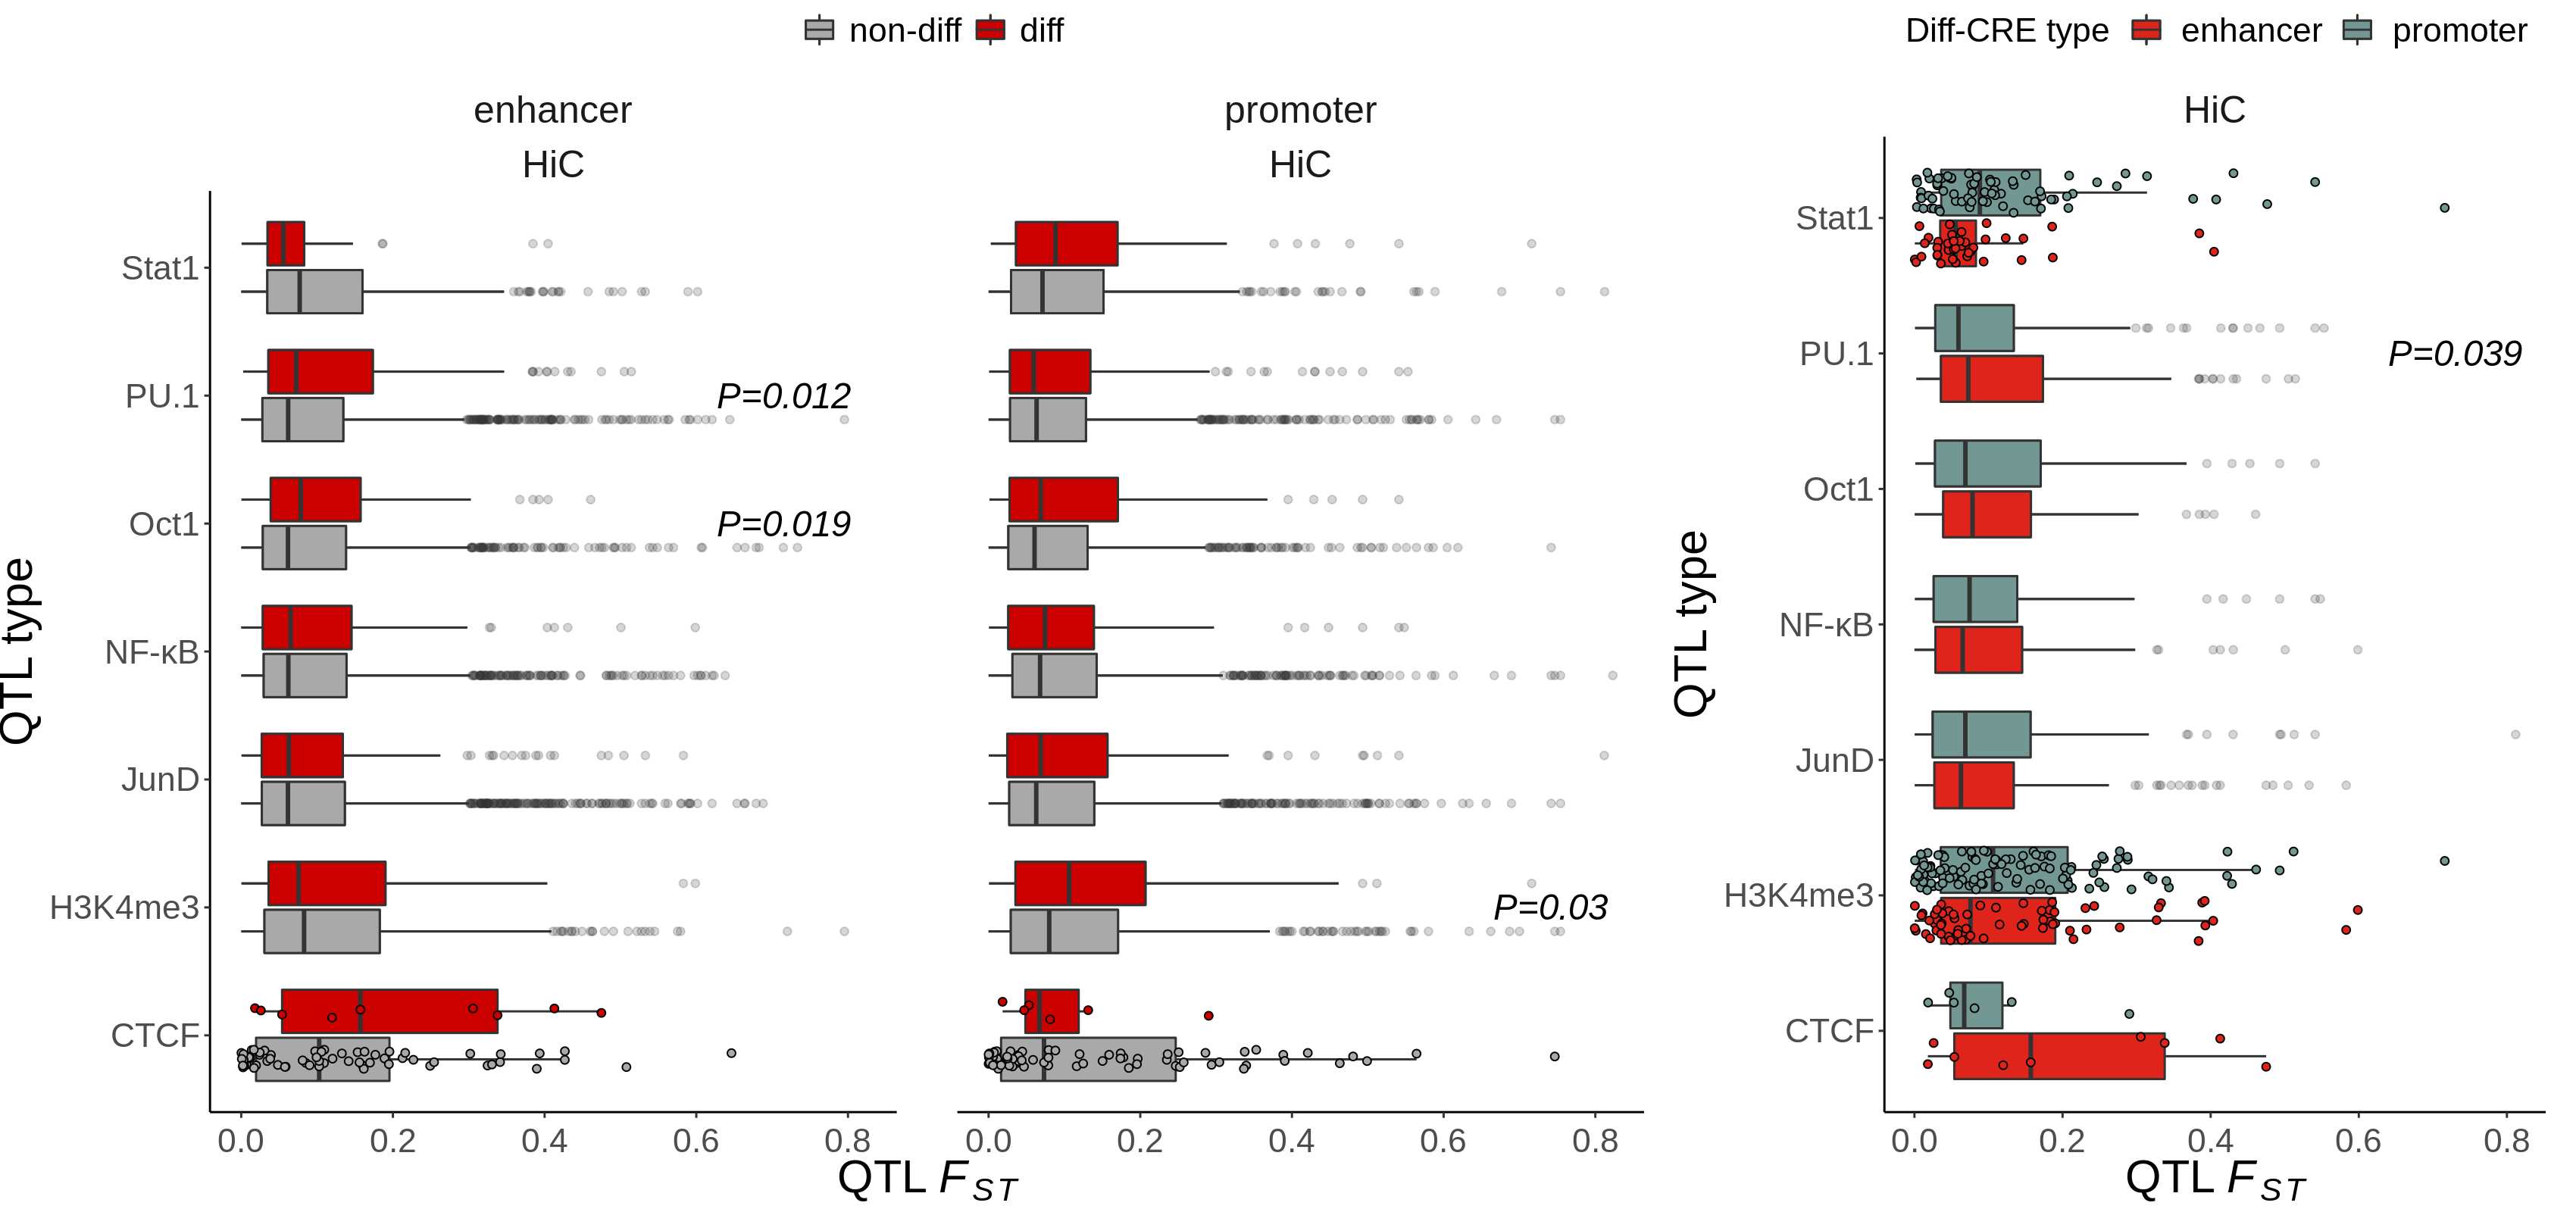

In [36]:

options(repr.plot.width = 17, repr.plot.height = 8, repr.plot.res = 200)


g2 <- gridExtra::grid.arrange(
      ps4
#         theme(plot.margin = unit(c(0,3,0,0),"line"))
        ,
      ps5
#         theme(plot.margin = unit(c(0,1.5,0,0),"line"))
        ,
      nrow = 1,
     layout_matrix = rbind(c(rep(1,13),rep(2,7)))
#       top = grid::textGrob(
#            gtitle,
#            gp = grid::gpar(fontsize = 26)
#       ),
#       padding = unit(3, "line")
    )
grid::grid.draw(g2)

ggsave(
    file.path(
        suppdir, 
        'HiC_bQTL_FST_cretype.png'
    ),
    plot=g2,
    width=17, 
    height=8
)

# review replies

## diff-promoter vs enhancer detection

In [37]:
d_all_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/data/210922output/allZerosFilt.meanQN.16.AFR_EUR.diff.allComponents.txt.gz'
d_all <- read_tsv(d_all_fname)
d_all

Rows: 201912 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (9): seqnames, strand, class, TargetGene, name, group1, group2, score_t...
dbl (22): start, end, width, TargetGeneTSS, TargetGeneExpression, distance, ...
lgl  (3): isSelfPromoter, TargetGeneIsExpressed, selection_candidate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seqnames start     end       width strand class      TargetGene
1      chr19     58873687  58874464 778   *      promoter   A1BG      
2      chr19     58873687  58874464 778   *      promoter   A1BG-AS1  
3      chr12      9255999   9256499 501   *      genic      A2M       
4      chr12      9270729   9271300 572   *      intergenic A2M       
5      chr22     43116666  43117166 501   *      promoter   A4GALT    
6      chr17     31860529  31861029 501   *      promoter   AA06      
7      chr12     53886720  53887220 501   *      genic      AAAS      
8      chr12     53602620  53603120 501   *      intergenic AAAS      
9      chr12     53718446  53718946 501   *      intergenic AAAS      
10     chr12     53738460  53739396 937   *      intergenic AAAS      
11     chr12     53714871  53715662 792   *      promoter   AAAS      
12     chr12     53773640  53774228 589   *      promoter   AAAS      
13     chr12     53894427  53894954 528   *      promoter   AAAS      
14     chr9      98637649  98638509 861   *      promoter   AAED1     
15     chr9      99180419  99180919 501   *      promoter   AAED1     
16     chr9      99212186  99212686 501   *      promoter   AAED1     
17     chr9      99417349  99417849 501   *      promoter   AAED1     
18     chr15     67378153  67378653 501   *      genic      AAGAB     
19     chr15     67383471  67383971 501   *      genic      AAGAB     
20     chr15     67413312  67413812 501   *      genic      AAGAB     
21     chr15     67533472  67533972 501   *      genic      AAGAB     
22     chr15     67546778  67547387 610   *      promoter   AAGAB     
23     chr2      69870727  69871227 501   *      promoter   AAK1      
24     chr2      70056487  70056987 501   *      promoter   AAK1      
25     chr11     77531630  77532409 780   *      promoter   AAMDC     
26     chr2     219128776 219129276 501   *      genic      AAMP      
27     chr2     219149034 219149534 501   *      genic      AAMP      
28     chr2     219151795 219152295 501   *      genic      AAMP      
29     chr2     219194481 219194981 501   *      genic      AAMP      
30     chr2     219260658 219261158 501   *      genic      AAMP      
31     chr2     219122241 219122741 501   *      intergenic AAMP      
32     chr2     219081482 219082369 888   *      promoter   AAMP      
33     chr2     219134682 219135364 683   *      promoter   AAMP      
34     chr17     74469571  74470086 516   *      genic      AANAT     
35     chr17     74475649  74476159 511   *      genic      AANAT     
36     chr17     74477129  74477635 507   *      genic      AANAT     
37     chr17     74461987  74462487 501   *      intergenic AANAT     
38     chr17     74502369  74502870 502   *      intergenic AANAT     
39     chr20     34824088  34824588 501   *      promoter   AAR2      
40     chr16     70415167  70415667 501   *      genic      AARS      
41     chr16     70464472  70464978 507   *      genic      AARS      
42     chr16     70510349  70510849 501   *      genic      AARS      
43     chr16     70323162  70323669 508   *      promoter   AARS      
44     chr16     70332808  70333315 508   *      promoter   AARS      
45     chr6      44225058  44225558 501   *      promoter   AARS2     
46     chr6      44233275  44233775 501   *      promoter   AARS2     
47     chr6      44280813  44281313 501   *      promoter   AARS2     
48     chr17     41080595  41081095 501   *      intergenic AARSD1    
49     chr17     40984908  40985686 779   *      promoter   AARSD1    
50     chr17     41116242  41116765 524   *      promoter   AARSD1    
⋮      ⋮        ⋮         ⋮         ⋮     ⋮      ⋮          ⋮         
201863 chr20     44485798  44486469 672   *      promoter   ZSWIM3    
201864 chr20     44509597  44510097 501   *      promoter   ZSWIM3    
201865 chr20     44519676  44520176 501   *      promoter   ZSWIM3    
201866 chr19     13944335  13944836 502   *      intergenic ZSWIM4    
201867 chr19     13957285  1395

In [38]:
d_all %>% filter(score_type=='atac')

seqnames start     end       width strand class      TargetGene
1     chr19     58873687  58874464 778   *      promoter   A1BG      
2     chr19     58873687  58874464 778   *      promoter   A1BG-AS1  
3     chr12      9255999   9256499 501   *      genic      A2M       
4     chr12      9270729   9271300 572   *      intergenic A2M       
5     chr22     43116666  43117166 501   *      promoter   A4GALT    
6     chr17     31860529  31861029 501   *      promoter   AA06      
7     chr12     53886720  53887220 501   *      genic      AAAS      
8     chr12     53602620  53603120 501   *      intergenic AAAS      
9     chr12     53718446  53718946 501   *      intergenic AAAS      
10    chr12     53738460  53739396 937   *      intergenic AAAS      
11    chr12     53714871  53715662 792   *      promoter   AAAS      
12    chr12     53773640  53774228 589   *      promoter   AAAS      
13    chr12     53894427  53894954 528   *      promoter   AAAS      
14    chr9      98637649  98638509 861   *      promoter   AAED1     
15    chr9      99180419  99180919 501   *      promoter   AAED1     
16    chr9      99212186  99212686 501   *      promoter   AAED1     
17    chr9      99417349  99417849 501   *      promoter   AAED1     
18    chr15     67378153  67378653 501   *      genic      AAGAB     
19    chr15     67383471  67383971 501   *      genic      AAGAB     
20    chr15     67413312  67413812 501   *      genic      AAGAB     
21    chr15     67533472  67533972 501   *      genic      AAGAB     
22    chr15     67546778  67547387 610   *      promoter   AAGAB     
23    chr2      69870727  69871227 501   *      promoter   AAK1      
24    chr2      70056487  70056987 501   *      promoter   AAK1      
25    chr11     77531630  77532409 780   *      promoter   AAMDC     
26    chr2     219128776 219129276 501   *      genic      AAMP      
27    chr2     219149034 219149534 501   *      genic      AAMP      
28    chr2     219151795 219152295 501   *      genic      AAMP      
29    chr2     219194481 219194981 501   *      genic      AAMP      
30    chr2     219260658 219261158 501   *      genic      AAMP      
31    chr2     219122241 219122741 501   *      intergenic AAMP      
32    chr2     219081482 219082369 888   *      promoter   AAMP      
33    chr2     219134682 219135364 683   *      promoter   AAMP      
34    chr17     74469571  74470086 516   *      genic      AANAT     
35    chr17     74475649  74476159 511   *      genic      AANAT     
36    chr17     74477129  74477635 507   *      genic      AANAT     
37    chr17     74461987  74462487 501   *      intergenic AANAT     
38    chr17     74502369  74502870 502   *      intergenic AANAT     
39    chr20     34824088  34824588 501   *      promoter   AAR2      
40    chr16     70415167  70415667 501   *      genic      AARS      
41    chr16     70464472  70464978 507   *      genic      AARS      
42    chr16     70510349  70510849 501   *      genic      AARS      
43    chr16     70323162  70323669 508   *      promoter   AARS      
44    chr16     70332808  70333315 508   *      promoter   AARS      
45    chr6      44225058  44225558 501   *      promoter   AARS2     
46    chr6      44233275  44233775 501   *      promoter   AARS2     
47    chr6      44280813  44281313 501   *      promoter   AARS2     
48    chr17     41080595  41081095 501   *      intergenic AARSD1    
49    chr17     40984908  40985686 779   *      promoter   AARSD1    
50    chr17     41116242  41116765 524   *      promoter   AARSD1    
⋮     ⋮        ⋮         ⋮         ⋮     ⋮      ⋮          ⋮         
50429 chr20     44485798  44486469 672   *      promoter   ZSWIM3    
50430 chr20     44509597  44510097 501   *      promoter   ZSWIM3    
50431 chr20     44519676  44520176 501   *      promoter   ZSWIM3    
50432 chr19     13944335  13944836 502   *      intergenic ZSWIM4    
50433 chr19     13957285  13957785 501   *      intergenic ZSWIM4    
50434 chr19     

In [39]:
d_all %>% 
    mutate(class=if_else(class=='promoter','promoter','enhancer'),
           diff_status = if_else(p<0.05, TRUE,FALSE)) %>% 
    filter(score_type %in% c('atac','chip')) %>% 
    select(seqnames, start, end, class, score_type, diff_status) %>% 
    distinct() %>% 
    group_by(score_type, class) %>% 
    summarize(N_diff = sum(diff_status),
              N = n(),
              prop_diff = N_diff/N)

`summarise()` has grouped output by 'score_type'. You can override using the
`.groups` argument.


score_type class    N_diff N     prop_diff 
1 atac       enhancer 3076   15055 0.20431750
2 atac       promoter 1572    8891 0.17680801
3 chip       enhancer 1493   15058 0.09914995
4 chip       promoter  776    8878 0.08740707

In [40]:
d_all %>% 
    mutate(class=if_else(class=='promoter','promoter','enhancer'),
           diff_status = if_else(p<0.05, TRUE,FALSE)) %>% 
    filter(score_type %in% c('atac','chip')) %>% 
    group_by(score_type, class) %>% 
    summarize(N_diff = sum(diff_status),
              N = n(),
              prop_diff = N_diff/N)

`summarise()` has grouped output by 'score_type'. You can override using the
`.groups` argument.


score_type class    N_diff N     prop_diff 
1 atac       enhancer 5626   26862 0.20944085
2 atac       promoter 4018   23616 0.17013889
3 chip       enhancer 2720   26862 0.10125828
4 chip       promoter 2143   23616 0.09074356

## allele frequency binning

In [75]:
wabc_olap_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/work/a9/36b10b0c513fff8286ea7b8fb5f37b/allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.txt.junD.txt.gz'
wabc_olap <- read_tsv(wabc_olap_fname) %>% 
    rowwise() %>% 
    mutate(bqtl_mean_alt_freq = mean(c(bqtl_AFR_alt_frq,bqtl_EUR_alt_frq)), .before=bqtl_AFR_alt_frq) %>% 
    ungroup() 
wabc_olap

Rows: 52729 Columns: 106
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (50): hgnc_symbol, name, bqtl_pos_all, bqtl_alt_affinity, bqtl_alt_high_...
dbl (53): TargetGeneTSS, distance, mean_ABC, width, rank2_percentile, fst_pe...
lgl  (3): bqtl_concordance, isSelfPromoter, eqtl_concordance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hgnc_symbol name                                TargetGeneTSS distance
1     A1BG        promoter|chr19:58838084-58838864     58864865      26391.0
2     A1BG        promoter|chr19:58873687-58874546     58864865       9251.5
3     A1BG-AS1    promoter|chr19:58838084-58838864     58863335      24861.0
4     A1BG-AS1    promoter|chr19:58873687-58874546     58863335      10781.5
5     A2M         genic|chr12:9255999-9256500           9268825      12575.5
6     A2M         intergenic|chr12:9270663-9271300      9268825       2156.5
7     A4GALT      promoter|chr22:43116666-43117166     43116916          0.0
8     AA06        promoter|chr17:31860529-31861029     31860779          0.0
9     AAAS        intergenic|chr12:53602620-53603120   53715412     112542.0
10    AAAS        promoter|chr12:53714871-53715662     53715412        145.5
11    AAAS        intergenic|chr12:53718446-53718946   53715412       3284.0
12    AAAS        intergenic|chr12:53738460-53739396   53715412      23516.0
13    AAAS        promoter|chr12:53773640-53774228     53715412      58522.0
14    AAAS        genic|chr12:53886720-53887220        53715412     171558.0
15    AAAS        promoter|chr12:53894432-53894954     53715412     179281.0
16    AAED1       promoter|chr9:98637649-98638509      99417599     779520.0
17    AAED1       promoter|chr9:99180419-99180919      99417599     236930.0
18    AAED1       promoter|chr9:99212186-99212686      99417599     205163.0
19    AAED1       promoter|chr9:99417349-99417849      99417599          0.0
20    AAGAB       genic|chr15:67378153-67378653        67547074     168671.0
21    AAGAB       genic|chr15:67383471-67383971        67547074     163353.0
22    AAGAB       genic|chr15:67393413-67393915        67547074     153410.0
23    AAGAB       genic|chr15:67413312-67413812        67547074     133512.0
24    AAGAB       genic|chr15:67533472-67533972        67547074      13352.0
25    AAGAB       promoter|chr15:67546778-67547387     67547074          8.5
26    AAK1        promoter|chr2:69870727-69871227      69870977          0.0
27    AAK1        promoter|chr2:70056487-70056987      69870977     185760.0
28    AAMDC       promoter|chr11:77531630-77532409     77532159        139.5
29    AAMDC       promoter|chr11:77705467-77706238     77532159     173693.5
30    AAMP        promoter|chr2:219081482-219082369   219134932      53006.5
31    AAMP        intergenic|chr2:219122241-219122743 219134932      12440.0
32    AAMP        promoter|chr2:219134682-219135364   219134932         91.0
33    AAMP        genic|chr2:219149034-219149534      219134932      14352.0
34    AAMP        genic|chr2:219151795-219152297      219134932      17114.0
35    AAMP        genic|chr2:219194481-219195011      219134932      59814.0
36    AAMP        genic|chr2:219260658-219261158      219134932     125976.0
37    AANAT       intergenic|chr17:74461987-74462488   74463629       1391.5
38    AANAT       genic|chr17:74469569-74470086        74463629       6198.5
39    AANAT       genic|chr17:74475649-74476159        74463629      12275.0
40    AANAT       genic|chr17:74477129-74477635        74463629      13753.0
41    AANAT       intergenic|chr17:74502369-74502870   74463629      38990.5
42    AANAT       intergenic|chr17:74511446-74511946   74463629      48067.0
43    AAR2        promoter|chr20:34824088-34824588     34824338          0.0
44    AARS        promoter|chr16:70323162-70323669     70323412          3.5
45    AARS        genic|chr16:70415167-70415667        70323412      92005.0
46    AARS        genic|chr16:70438133-70438633        70323412     114971.0
47    AARS        genic|chr16:70464472-70464978        70323412     141313.0
48    AARS        genic|chr16:70510349-70510849        70323412     187187.0
49    AARS2       promoter|chr6:44214444-44214944      44281063      66369.0
50    AARS2       promoter|chr6:44225058-44225558      44281063      55755.0
⋮     ⋮           ⋮                                   ⋮             ⋮       
52

### test

In [69]:
bcre <- wabc_olap %>% 
    filter(bqtl_p < 0.05) %>% 
    select(name, seqnames,start,end,class,hgnc_symbol,atac_lfc,chip_lfc,atac_p,chip_p,contains('bqtl')) %>% 
    mutate(class=if_else(class=='promoter','promoter','enhancer')) %>% 
    group_by(name) %>%
    arrange(atac_p, .by_group=TRUE) %>%
    slice(1) %>%
    ungroup() %>% 
    rowwise() %>% 
    mutate(bqtl_mean_alt_freq = mean(c(bqtl_AFR_alt_frq,bqtl_EUR_alt_frq)), .before=bqtl_AFR_alt_frq)
bcre

name                              seqnames start     end       class   
1    genic|chr1:100217620-100218122    chr1     100217620 100218122 enhancer
2    genic|chr1:100224432-100224933    chr1     100224432 100224933 enhancer
3    genic|chr1:100542267-100542767    chr1     100542267 100542767 enhancer
4    genic|chr1:100596123-100596681    chr1     100596123 100596681 enhancer
5    genic|chr1:104104568-104105068    chr1     104104568 104105068 enhancer
6    genic|chr1:109104277-109104779    chr1     109104277 109104779 enhancer
7    genic|chr1:109652383-109652883    chr1     109652383 109652883 enhancer
8    genic|chr1:11025466-11025966      chr1      11025466  11025966 enhancer
9    genic|chr1:110546575-110547076    chr1     110546575 110547076 enhancer
10   genic|chr1:110759432-110759932    chr1     110759432 110759932 enhancer
11   genic|chr1:110925991-110926491    chr1     110925991 110926491 enhancer
12   genic|chr1:11132613-11133119      chr1      11132613  11133119 enhancer
13   genic|chr1:111422585-111423097    chr1     111422585 111423097 enhancer
14   genic|chr1:111740090-111740592    chr1     111740090 111740592 enhancer
15   genic|chr1:112048311-112048838    chr1     112048311 112048838 enhancer
16   genic|chr1:112050736-112051239    chr1     112050736 112051239 enhancer
17   genic|chr1:112143411-112143911    chr1     112143411 112143911 enhancer
18   genic|chr1:112146512-112147012    chr1     112146512 112147012 enhancer
19   genic|chr1:112166914-112167417    chr1     112166914 112167417 enhancer
20   genic|chr1:112944717-112945217    chr1     112944717 112945217 enhancer
21   genic|chr1:113243334-113243834    chr1     113243334 113243834 enhancer
22   genic|chr1:11335543-11336264      chr1      11335543  11336264 enhancer
23   genic|chr1:113573765-113574382    chr1     113573765 113574382 enhancer
24   genic|chr1:114323291-114323803    chr1     114323291 114323803 enhancer
25   genic|chr1:114337068-114337568    chr1     114337068 114337568 enhancer
26   genic|chr1:114401994-114402500    chr1     114401994 114402500 enhancer
27   genic|chr1:115047796-115048296    chr1     115047796 115048296 enhancer
28   genic|chr1:116655266-116655792    chr1     116655266 116655792 enhancer
29   genic|chr1:117087339-117087850    chr1     117087339 117087850 enhancer
30   genic|chr1:117604446-117605012    chr1     117604446 117605012 enhancer
31   genic|chr1:117914049-117914584    chr1     117914049 117914584 enhancer
32   genic|chr1:11809148-11809648      chr1      11809148  11809648 enhancer
33   genic|chr1:119529986-119530486    chr1     119529986 119530486 enhancer
34   genic|chr1:12127898-12128398      chr1      12127898  12128398 enhancer
35   genic|chr1:1373349-1373849        chr1       1373349   1373849 enhancer
36   genic|chr1:144931874-144932667    chr1     144931874 144932667 enhancer
37   genic|chr1:145501972-145502472    chr1     145501972 145502472 enhancer
38   genic|chr1:146580557-146581057    chr1     146580557 146581057 enhancer
39   genic|chr1:146716762-146717709    chr1     146716762 146717709 enhancer
40   genic|chr1:150539806-150540314    chr1     150539806 150540314 enhancer
41   genic|chr1:150547530-150548037    chr1     150547530 150548037 enhancer
42   genic|chr1:153721813-153722313    chr1     153721813 153722313 enhancer
43   genic|chr1:154763665-154764165    chr1     154763665 154764165 enhancer
44   genic|chr1:15482768-15483275      chr1      15482768  15483275 enhancer
45   genic|chr1:15494891-15495440      chr1      15494891  15495440 enhancer
46   genic|chr1:155057406-155057906    chr1     155057406 155057906 enhancer
47   genic|chr1:156089603-156090103    chr1     156089603 156090103 enhancer
48   genic|chr1:156128799-156129309    chr1     156128799 156129309 enhancer
49   genic|chr1:156454313-156454840    chr1     156454313 156454840 enhancer
50   genic|chr1:156777350-156777852    chr1     156777350 156777852 enhancer
⋮    ⋮                                 ⋮        ⋮         ⋮         ⋮       
4

In [80]:
bcre %>% 
    mutate(diff_status = if_else(atac_p < 0.05, 'diff','non-diff')) %>% 
    group_by(class, diff_status) %>% 
    mutate(mean_fst = mean(bqtl_fst, na.rm=TRUE)) %>% 
    ungroup() %>% 
    select(class, diff_status, mean_fst) %>% 
    distinct() %>% 
    pivot_wider(names_from='diff_status',
                values_from='mean_fst',
                names_glue="{diff_status}.{.value}")

class    non-diff.mean_fst diff.mean_fst
1 enhancer 0.09381554        0.1225873    
2 promoter 0.10116393        0.1213356

Warning message:
“Removed 296 rows containing non-finite values (stat_bin).”


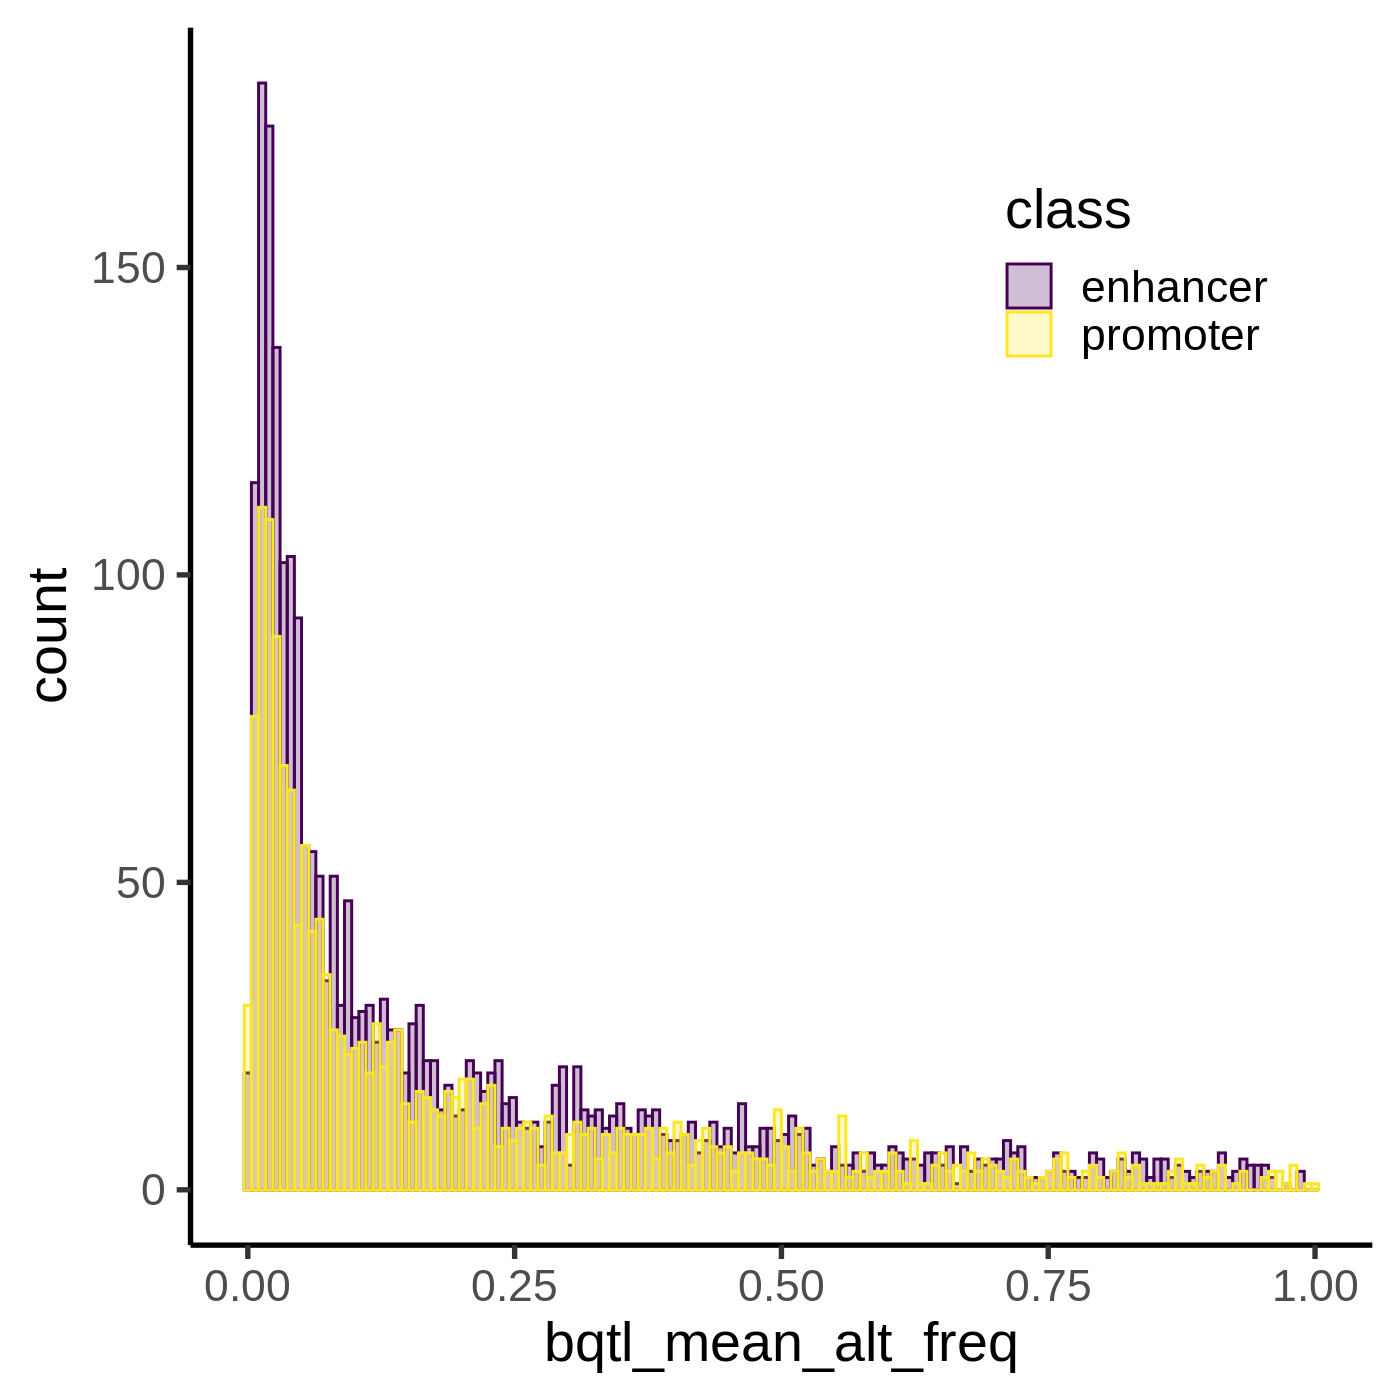

In [71]:
groupedDistPlot(bcre, 
                xvar = "bqtl_mean_alt_freq", groupvar = "class", density = FALSE, 
    position = "identity", bwidth = NULL, nbins = 150, logscale = FALSE, 
    colorvals = NULL, legendpos = c(0.8, 0.8), w = 7, h = 7)

In [ ]:
?ntile

In [99]:
diffQTLFSTWilcoxon <-  function(df,
                              qtl_p_thresh=0.05,
                              qtl_p_col='bqtl_p',
                              qtl_dir_col='bqtl_direction',
                              abc_p_thresh=0.05,
                              abc_p_nonthresh=abc_p_thresh,
                              freq_bin = FALSE, # bin tests by mean allele frequency
                              abc_p_col='atac_p',
                              abc_dir_col='atac_monodirection',
                              fst_col='bqtl_fst',
                              class_filt='none', # 'promoter', 'non-promoter', 'none'
                              class_res='atac',
                              conf_int=FALSE,
                              return_df=TRUE) {

    outcols <- c('seqnames',
                 'start',
                 'end',
                 'name',
                 'class',
                 'isSelfPromoter',
                 'qtl_p',
                 'abc_p',
                 'qtl_dir',
                 'abc_dir',
                 'atac_lfc',
                 'chip_lfc',
                 'hic_lfc',
                 'fst_var',
                 'diff_status')

    dfs <- df %>%
        dplyr::rename(qtl_p := {{qtl_p_col}},
                      abc_p := {{abc_p_col}},
                      qtl_dir := {{qtl_dir_col}},
                      abc_dir := {{abc_dir_col}}) %>%
        # dplyr::filter to QTL with directional info
        dplyr::filter(qtl_p < qtl_p_thresh)

    if (grepl('chip', abc_p_col) | grepl('hic', abc_p_col)) {
      # only count each HiChIP bin once
      dfs <- dfs %>%
            group_by(hgnc_symbol, name) %>%
            arrange(qtl_p, .by_group=TRUE) %>%
            slice(1) %>%
            ungroup() %>%
            group_by(hgnc_symbol, chip_lfc, abc_p) %>%
            mutate(chipbin_has_promoter = if_else(any(class=='promoter'), TRUE, FALSE))

      if (class_res=='chip') {

        if (class_filt=='promoter') {
            dfs <- dfs %>% dplyr::filter(chipbin_has_promoter)
        } else if (class_filt=='non-promoter') {
            dfs <- dfs %>% dplyr::filter(!chipbin_has_promoter)
        }

      } else {
        if (class_filt=='promoter') {
            print('Testing promoter CREs only')
            dfs <- dfs %>% dplyr::filter(class=='promoter')
        } else if (class_filt=='non-promoter') {
            print('Testing non-promoter CREs only')
            dfs <- dfs %>% dplyr::filter(class!='promoter')
        } else {
            print('No CRE class type filtering.')
        }
      }

      # take the CRE with the most significant QTL in the HiChIP bin
      dfs <- dfs %>%
            arrange(qtl_p, .by_group=TRUE) %>%
            slice(1) %>%
            ungroup()

    } else {
        if (class_filt=='promoter') {
            print('Testing promoter CREs only')
            dfs <- dfs %>% dplyr::filter(class=='promoter')
        } else if (class_filt=='non-promoter') {
            print('Testing non-promoter CREs only')
            dfs <- dfs %>% dplyr::filter(class!='promoter')
        } else {
            print('No CRE class type filtering.')
        }
    }


    dfs <- dfs %>%
        dplyr::rename(fst_var := {{fst_col}}) %>%
        dplyr::filter(!is.na(fst_var))

    # only count each CRE once
    # (remove double counts due to multiple target genes per CRE)
    dfs <- dfs %>%
      group_by(name) %>%
      arrange(qtl_p, abc_p, .by_group=TRUE) %>%
      slice(1) %>%
      ungroup()

    # probability of success as proportion down bQTL & down DE
    # out of all CREs with matching direction
    dfs <- dfs %>%
        mutate(diff_status = case_when(abc_p < abc_p_thresh ~ 'diff',
                                       abc_p >= abc_p_nonthresh ~ 'non-diff')) %>%
        dplyr::filter(!is.na(diff_status))

    diff_fst <- dfs %>%
        dplyr::filter(diff_status=='diff') %>%
        pull(fst_var)
    nondiff_fst <- dfs %>%
        dplyr::filter(diff_status=='non-diff') %>%
        pull(fst_var)
    
    if (freq_bin) {
        
#         dfs_summ <- dfs %>% 
#             mutate(af_bin = ntile(bqtl_mean_alt_frq, 10)) %>% 
#             group_by(af_bin,diff_status) %>% 
#             mutate(mean_fst = mean(fst_var, na.rm=TRUE)) %>% 
#             ungroup() %>% 
#             select(af_bin, diff_status, mean_fst) %>% 
#             distinct() %>% 
#             pivot_wider(names_from='diff_status',
#                         values_from='mean_fst',
#                         names_glue="{diff_status}.{.value}")
        
        dfs <- dfs %>% 
            rowwise() %>% 
            mutate(bqtl_mean_alt_freq = mean(c(bqtl_AFR_alt_frq,bqtl_EUR_alt_frq)), .before=bqtl_AFR_alt_frq) %>% 
            ungroup() %>% 
            mutate(af_bin = ntile(bqtl_mean_alt_freq, 10)) %>% 
            group_by(af_bin) %>% 
            summarize(bqtl_mean_alt_freq_lower = min(bqtl_mean_alt_freq, na.rm=TRUE),
                      bqtl_mean_alt_freq_upper = max(bqtl_mean_alt_freq, na.rm=TRUE),
                      diff.N = length(fst_var[diff_status=='diff' & !is.na(fst_var)]),
                      non_diff.N = length(fst_var[diff_status=='non-diff' & !is.na(fst_var)]),
                      diff.bqtl_alt_frq_AFR_mean = mean(bqtl_AFR_alt_frq[diff_status=='diff' & !is.na(fst_var)], na.rm=TRUE),
                      diff.bqtl_alt_frq_EUR_mean = mean(bqtl_EUR_alt_frq[diff_status=='diff' & !is.na(fst_var)], na.rm=TRUE),
                      non_diff.bqtl_alt_frq_AFR_mean = mean(bqtl_AFR_alt_frq[diff_status=='non-diff' & !is.na(fst_var)], na.rm=TRUE),
                      non_diff.bqtl_alt_frq_EUR_mean = mean(bqtl_EUR_alt_frq[diff_status=='non-diff' & !is.na(fst_var)], na.rm=TRUE),
                      diff.fst_var_mean = mean(fst_var[diff_status=='diff'], na.rm=TRUE),
                      non_diff.fst_var_mean = mean(fst_var[diff_status=='non-diff'], na.rm=TRUE),
                      diff_wilcoxP = wilcox.test(fst_var ~ diff_status)$p.value) %>% 
            ungroup()
        
        return(dfs)
        
    } else {
        wt <- wilcox.test(diff_fst, nondiff_fst, alternative='greater', conf.int=conf_int)

        wres <- list(qtl_significance = qtl_p_thresh,
                     diff_significance = abc_p_thresh,
                     pvalue = wt$p.value)
    }

    if (return_df) {
        outdf <- dfs %>%
            dplyr::select(any_of(outcols)) %>%
            mutate(diff_wilcoxP = wt$p.value)
        return(outdf)
    }

    return(wres)

}

In [117]:
st <- 'atac'
qt <- 'bqtl'
cf <- 'non-promoter'

diffQTLFSTWilcoxon(wabc_olap,
                  qtl_p_thresh=0.05,
                  qtl_p_col=paste0(qt, '_p'),
                  qtl_dir_col=paste0(qt, '_direction'),
                  abc_p_thresh=0.05,
                  abc_p_nonthresh=0.05,
                  abc_p_col=paste0(st, '_p'),
                  abc_dir_col=paste0(st, '_monodirection'),
                  fst_col=paste0(qt, '_fst'),
                  class_filt=cf, # 'promoter', 'non-promoter', 'none'
                  class_res='chip',
                  freq_bin=FALSE,
                  return_df=FALSE)
#     mutate(cre_type=cf,
#            qtl_type=qt,
#            score_type=st)

[1] "Testing non-promoter CREs only"


$qtl_significance
[1] 0.05

$diff_significance
[1] 0.05

$pvalue
[1] 2.407611e-09

In [112]:
tbin <- diffQTLFSTWilcoxon(wabc_olap,
                          qtl_p_thresh=0.05,
                          qtl_p_col=paste0(qt, '_p'),
                          qtl_dir_col=paste0(qt, '_direction'),
                          abc_p_thresh=0.05,
                          abc_p_nonthresh=0.05,
                          abc_p_col=paste0(st, '_p'),
                          abc_dir_col=paste0(st, '_monodirection'),
                          fst_col=paste0(qt, '_fst'),
                          class_filt=cf, # 'promoter', 'non-promoter', 'none'
                          class_res='chip',
                          freq_bin = TRUE,
                          return_df=FALSE) %>% 
    mutate(cre_type='enhancer',
           qtl_type=qt,
           score_type=st,
           .before=1) %>% 
    rename(allele_frequency_lower = bqtl_mean_alt_freq_lower,
           allele_frequency_upper = bqtl_mean_alt_freq_upper) %>% 
    select(-c(9:12),-qtl_type,-af_bin) %>% 
    rename(CRE_type = cre_type,
           diff_N = diff.N,
           non_diff_N = non_diff.N,
           diff_mean_fst = diff.fst_var_mean,
           non_diff_mean_fst = non_diff.fst_var_mean,
           wilcox_P = diff_wilcoxP) %>% 
    mutate(chip_type = 'JunD', .before=1)

tbin

[1] "Testing non-promoter CREs only"


chip_type CRE_type score_type allele_frequency_lower allele_frequency_upper
1  JunD      enhancer atac       0.00000000             0.01431980            
2  JunD      enhancer atac       0.01431980             0.02326970            
3  JunD      enhancer atac       0.02326970             0.03521299            
4  JunD      enhancer atac       0.03579950             0.05336620            
5  JunD      enhancer atac       0.05337635             0.08770900            
6  JunD      enhancer atac       0.08771879             0.14417150            
7  JunD      enhancer atac       0.14448265             0.23488500            
8  JunD      enhancer atac       0.23490550             0.36796745            
9  JunD      enhancer atac       0.36803850             0.56265950            
10 JunD      enhancer atac       0.56411600             0.98627700            
   diff_N non_diff_N diff_mean_fst non_diff_mean_fst wilcox_P   
1  58     176        0.03065923    0.01847658        0.677955083
2  66     168        0.03557230    0.03507143        0.051909901
3  60     173        0.05339874    0.05270755        0.842303006
4  64     169        0.07574173    0.07373190        0.642787602
5  63     170        0.09847734    0.09805614        0.786972895
6  74     159        0.14276200    0.12157398        0.070128391
7  70     163        0.15741479    0.12573022        0.033471578
8  75     158        0.18342397    0.14289410        0.014553668
9  81     152        0.19742026    0.16903259        0.255206923
10 73     160        0.19365736    0.11950617        0.000272994

In [114]:
tbin %>% 
    pull(wilcox_P) %>% 
    mean()

[1] 0.3375562

In [113]:
outdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/noCEU'
tbin %>% 
    write_tsv(file.path(outdir, 'JunD_enhancer_bQTL_diff_vs_nondiff_wilcox.allele_freq_binned.txt'))

### agg

In [27]:
bwres_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/190922outputNoCEU/aggregate/allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.diffQTLoverlap.fstWilcoxBinnedAgg.txt.gz'
bwres <- read_tsv(bwres_fname) %>% 
    filter(qtl_type=='bqtl') %>% 
    mutate(cre_type = case_when(cre_type=='promoter' ~ 'promoter',
                                cre_type=='non-promoter' ~ 'enhancer',
                                cre_type=='all' ~ 'all'),
           score_type = case_when(score_type=='ABC' ~ 'ABC',
                                  score_type=='atac' ~ 'ATAC',
                                  score_type=='chip' ~ 'ChIP',
                                  score_type=='hic' ~ 'HiC'),
           chip_type = case_when(chip_type=='nfkB' ~ "NF-\u03baB",
                               chip_type=='stat1' ~ "Stat1",
                               chip_type=='oct1' ~ "Oct1",
                               chip_type=='h3k4me3' ~ "H3K4me3",
                               chip_type=='pu1' ~ "PU.1",
                               chip_type=='junD' ~ "JunD",
                               chip_type=='ctcf' ~ "CTCF"))
bwres

Rows: 1233 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): cre_type, qtl_type, score_type, chip_type
dbl (12): af_bin, bqtl_mean_alt_freq_lower, bqtl_mean_alt_freq_upper, diff.N...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cre_type qtl_type score_type af_bin bqtl_mean_alt_freq_lower
1   promoter bqtl     ChIP        1     0.01941750              
2   promoter bqtl     ChIP        2     0.09538710              
3   promoter bqtl     ChIP        3     0.15532510              
4   promoter bqtl     ChIP        4     0.23497370              
5   promoter bqtl     ChIP        5     0.31547900              
6   promoter bqtl     ChIP        6     0.37182550              
7   promoter bqtl     ChIP        7     0.43307150              
8   promoter bqtl     ChIP        8     0.47763700              
9   promoter bqtl     ChIP        9     0.54366650              
10  promoter bqtl     ChIP       10     0.67060800              
11  enhancer bqtl     ChIP        1     0.02002425              
12  enhancer bqtl     ChIP        2     0.11675705              
13  enhancer bqtl     ChIP        3     0.17483400              
14  enhancer bqtl     ChIP        4     0.24504000              
15  enhancer bqtl     ChIP        5     0.33489650              
16  enhancer bqtl     ChIP        6     0.37541250              
17  enhancer bqtl     ChIP        7     0.42257450              
18  enhancer bqtl     ChIP        8     0.53069150              
19  enhancer bqtl     ChIP        9     0.64078700              
20  enhancer bqtl     ChIP       10     0.71415100              
21  promoter bqtl     ATAC        1     0.01941750              
22  promoter bqtl     ATAC        2     0.09538710              
23  promoter bqtl     ATAC        3     0.15532510              
24  promoter bqtl     ATAC        4     0.23497370              
25  promoter bqtl     ATAC        5     0.31547900              
26  promoter bqtl     ATAC        6     0.37182550              
27  promoter bqtl     ATAC        7     0.43307150              
28  promoter bqtl     ATAC        8     0.47763700              
29  promoter bqtl     ATAC        9     0.54366650              
30  promoter bqtl     ATAC       10     0.67060800              
31  enhancer bqtl     ATAC        1     0.02002425              
32  enhancer bqtl     ATAC        2     0.11675705              
33  enhancer bqtl     ATAC        3     0.17483400              
34  enhancer bqtl     ATAC        4     0.24504000              
35  enhancer bqtl     ATAC        5     0.32347700              
36  enhancer bqtl     ATAC        6     0.37120590              
37  enhancer bqtl     ATAC        7     0.41857200              
38  enhancer bqtl     ATAC        8     0.47724450              
39  enhancer bqtl     ATAC        9     0.61563000              
40  enhancer bqtl     ATAC       10     0.70717700              
41  promoter bqtl     HiC         1     0.01941750              
42  promoter bqtl     HiC         2     0.09538710              
43  promoter bqtl     HiC         3     0.15532510              
44  promoter bqtl     HiC         4     0.23497370              
45  promoter bqtl     HiC         5     0.31547900              
46  promoter bqtl     HiC         6     0.37182550              
47  promoter bqtl     HiC         7     0.43307150              
48  promoter bqtl     HiC         8     0.47763700              
49  promoter bqtl     HiC         9     0.54366650              
50  promoter bqtl     HiC        10     0.67060800              
⋮   ⋮        ⋮        ⋮          ⋮      ⋮                       
371 enhancer bqtl     ChIP        1     0.001789975             
372 enhancer bqtl     ChIP        2     0.018496400             
373 enhancer bqtl     ChIP        3     0.031622900             
374 enhancer bqtl     ChIP        4     0.046539400             
375 enhancer bqtl     ChIP        5     0.065036000             
376 enhancer bqtl     ChIP        6     0.111008890             
377 enhancer bqtl     ChIP        7     0.180373350             
378 enhancer bqtl     ChIP        8     0.295990500             
379 enhancer bqtl     ChIP        9     0.432926500             
380 enhancer bqtl     ChIP       10    

In [40]:
bwressumm <- bwres %>% 
    filter(qtl_type=='bqtl') %>% 
    group_by(qtl_type,chip_type,cre_type,score_type) %>% 
    summarize(Nbins_diff_greater = sum(diff.fst_var_mean > non_diff.fst_var_mean),
              Nbins_nom_sig = sum(diff_wilcoxP < 0.05),
              mean_dnd_lfc = mean(log2(diff.fst_var_mean/non_diff.fst_var_mean)),
              std_dnd_lfc = sd(log2(diff.fst_var_mean/non_diff.fst_var_mean)),
              se_dnd_lfc = std_dnd_lfc/N()) %>% 
    ungroup() %>% 
    arrange(desc(Nbins_nom_sig)) %>% 
    pivot_longer(cols=c('Nbins_diff_greater','Nbins_nom_sig'),
                 names_to='metric',
                 values_to='Nbins') %>% 
    mutate(metric = ifelse(metric=='Nbins_diff_greater', 
                           "Diff > non-diff mean FST",
                           "Wilcoxon P < 0.05"))
bwressumm

`summarise()` has grouped output by 'qtl_type', 'chip_type', 'cre_type'. You
can override using the `.groups` argument.


qtl_type chip_type cre_type score_type metric                   Nbins
1  bqtl     JunD      enhancer ATAC       Diff > non-diff mean FST 10   
2  bqtl     JunD      enhancer ATAC       Wilcoxon P < 0.05         5   
3  bqtl     NF-κB     enhancer ATAC       Diff > non-diff mean FST  6   
4  bqtl     NF-κB     enhancer ATAC       Wilcoxon P < 0.05         4   
5  bqtl     PU.1      enhancer ATAC       Diff > non-diff mean FST  7   
6  bqtl     PU.1      enhancer ATAC       Wilcoxon P < 0.05         4   
7  bqtl     PU.1      enhancer HiC        Diff > non-diff mean FST  7   
8  bqtl     PU.1      enhancer HiC        Wilcoxon P < 0.05         3   
9  bqtl     Stat1     promoter ChIP       Diff > non-diff mean FST  5   
10 bqtl     Stat1     promoter ChIP       Wilcoxon P < 0.05         3   
11 bqtl     H3K4me3   enhancer ChIP       Diff > non-diff mean FST  6   
12 bqtl     H3K4me3   enhancer ChIP       Wilcoxon P < 0.05         2   
13 bqtl     H3K4me3   promoter ChIP       Diff > non-diff mean FST  6   
14 bqtl     H3K4me3   promoter ChIP       Wilcoxon P < 0.05         2   
15 bqtl     H3K4me3   promoter HiC        Diff > non-diff mean FST  8   
16 bqtl     H3K4me3   promoter HiC        Wilcoxon P < 0.05         2   
17 bqtl     NF-κB     enhancer ChIP       Diff > non-diff mean FST  7   
18 bqtl     NF-κB     enhancer ChIP       Wilcoxon P < 0.05         2   
19 bqtl     Oct1      enhancer ATAC       Diff > non-diff mean FST  8   
20 bqtl     Oct1      enhancer ATAC       Wilcoxon P < 0.05         2   
21 bqtl     Stat1     enhancer ATAC       Diff > non-diff mean FST  5   
22 bqtl     Stat1     enhancer ATAC       Wilcoxon P < 0.05         2   
23 bqtl     H3K4me3   enhancer HiC        Diff > non-diff mean FST  6   
24 bqtl     H3K4me3   enhancer HiC        Wilcoxon P < 0.05         1   
25 bqtl     H3K4me3   promoter ATAC       Diff > non-diff mean FST  5   
26 bqtl     H3K4me3   promoter ATAC       Wilcoxon P < 0.05         1   
27 bqtl     JunD      enhancer ChIP       Diff > non-diff mean FST  6   
28 bqtl     JunD      enhancer ChIP       Wilcoxon P < 0.05         1   
29 bqtl     JunD      promoter ATAC       Diff > non-diff mean FST  7   
30 bqtl     JunD      promoter ATAC       Wilcoxon P < 0.05         1   
31 bqtl     JunD      promoter HiC        Diff > non-diff mean FST  6   
32 bqtl     JunD      promoter HiC        Wilcoxon P < 0.05         1   
33 bqtl     NF-κB     promoter ATAC       Diff > non-diff mean FST  4   
34 bqtl     NF-κB     promoter ATAC       Wilcoxon P < 0.05         1   
35 bqtl     NF-κB     promoter HiC        Diff > non-diff mean FST  3   
36 bqtl     NF-κB     promoter HiC        Wilcoxon P < 0.05         1   
37 bqtl     PU.1      enhancer ChIP       Diff > non-diff mean FST  9   
38 bqtl     PU.1      enhancer ChIP       Wilcoxon P < 0.05         1   
39 bqtl     PU.1      promoter ATAC       Diff > non-diff mean FST  5   
40 bqtl     PU.1      promoter ATAC       Wilcoxon P < 0.05         1   
41 bqtl     PU.1      promoter ChIP       Diff > non-diff mean FST  7   
42 bqtl     PU.1      promoter ChIP       Wilcoxon P < 0.05         1   
43 bqtl     Stat1     enhancer ChIP       Diff > non-diff mean FST  6   
44 bqtl     Stat1     enhancer ChIP       Wilcoxon P < 0.05         1   
45 bqtl     CTCF      enhancer ATAC       Diff > non-diff mean FST  8   
46 bqtl     CTCF      enhancer ATAC       Wilcoxon P < 0.05         0   
47 bqtl     CTCF      promoter ATAC       Diff > non-diff mean FST  6   
48 bqtl     CTCF      promoter ATAC       Wilcoxon P < 0.05         0   
49 bqtl     CTCF      promoter ChIP       Diff > non-diff mean FST  4   
50 bqtl     CTCF      promoter ChIP       Wilcoxon P < 0.05         0   
51 bqtl     H3K4me3   enhancer ATAC       Diff > non-diff mean FST  6   
52 bqtl     H3K4me3   enhancer ATAC       Wilcoxon P < 0.05         0   
53 bqtl     JunD      enhancer HiC        Diff > non-diff mean FST  7   
54 bqtl     JunD      enhancer HiC        Wilcoxon P < 0.05  

In [41]:
groupedBoxplot

function (df, xvar, yvar, groupvar = "replicate", xlab = xvar, 
    ylab = yvar, plotpoints = FALSE, points_thresh = 200, show_wilcox = FALSE, 
    paired_t_test = FALSE, testout = FALSE, alt = "two.sided", 
    pvalsize = 4, nominal_p_only = FALSE, ylimadj = 0, orderpval = FALSE, 
    logscale = FALSE, colorX = FALSE, colorvals = NULL, showleg = FALSE, 
    legendpos = "right", legtextsize = 12, horizontal = TRUE, 
    facets = NULL, frows = 2, fscales = "fixed", fdir = "h", 
    w = 7, h = 7, angleHjVj = c(20, 0.5, 0.5), debug = FALSE) 
{
    options(repr.plot.width = w, repr.plot.height = h, repr.plot.res = 200)
    if (colorX) {
        colorvar <- xvar
    }
    else {
        colorvar <- groupvar
    }
    outliers <- 0.2
    if (plotpoints) 
        outliers <- 0
    if (horizontal) {
        ytextjust <- 0.9
    }
    else {
        ytextjust <- 1.1
    }
    if (show_wilcox & is.null(groupvar)) {
        if (!is.null(facets)) {
            testTypes <- df %>% group_by(across(any_of(facets))) %>% 
                dplyr::rename(`:=`(xvarvals, {
                  {
                    xvar
                  }
                })) %>% summarize(Nxvar = n_distinct(xvarvals)) %>% 
                dplyr::filter(Nxvar == 2) %>% ungroup() %>% dplyr::select(any_of(facets)) %>% 
                distinct()
            wilcox_df <- merge(df, testTypes)
        }
        else {
            wilcox_df <- df
        }
        wilcox_df <- wilcox_df %>% group_by(across(any_of(facets))) %>% 
            dplyr::rename(`:=`(wilcox_test_var, {
                {
                  xvar
                }
            }), `:=`(ycol, {
                {
                  yvar
                }
            })) %>% mutate(maxy = max(ycol) * ytextjust) %>% 
            group_by(maxy, .add = TRUE)
        if (is.null(facets)) {
            wilcox_df <- wilcox_df %>% mutate(wilcox_test_var = as.factor(wilcox_test_var))
            wvs <- levels(wilcox_df$wilcox_test_var)
            wv1 <- wilcox_df %>% filter(wilcox_test_var == wvs[1]) %>% 
                pull(ycol)
            wv2 <- wilcox_df %>% filter(wilcox_test_var == wvs[2]) %>% 
                pull(ycol)
            wres <- wilcox.test(wv2, wv1, alternative = alt, 
                conf.int = TRUE)
            wilcox_df <- as_tibble(list(estimate = wres$estimate[[1]], 
                group1 = wvs[2], group2 = wvs[1], n1 = length(wv2), 
                n2 = length(wv1), statistic = wres$statistic[[1]], 
                p = wres$p.value, conf.low = wres$conf.int[1], 
                conf.high = wres$conf.int[2], method = "Wilcoxon", 
                alternative = alt, maxy = wilcox_df %>% pull(maxy) %>% 
                  unique))
        }
        else {
            if (paired_t_test) {
                wilcox_df <- wilcox_df %>% rstatix::t_test(ycol ~ 
                  wilcox_test_var, paired = TRUE, p.adjust.method = "none")
            }
            else {
                wilcox_df <- wilcox_df %>% mutate(wilcox_test_var = fct_relevel(wilcox_test_var, 
                  rev))
                wvs <- levels(wilcox_df$wilcox_test_var)
                print("running wilcox tryCatch")
                wilcox_df <- tryCatch({
                  rstatix::wilcox_test(wilcox_df, ycol ~ wilcox_test_var, 
                    alternative = alt, detailed = TRUE, p.adjust.method = "none")
                }, error = function(e) {
                  print(e)
                  return(wilcox_df %>% summarize(p = Inf) %>% 
                    mutate(group1 = wvs[2], conf.low = NA, conf.high = NA))
                })
            }
        }
        wilcox_df <- wilcox_df %>% mutate(`:=`(!!xvar, group1), 
            xposn = 1.5, yposn = maxy, wilcox_lab = paste0("P = ", 
                signif(p, digits = 2)))
        if (orderpval) {
            wilcox_df <- wilcox_df %>% arrange(p) %>% mutate(across(all_of(facets), 
                ~fct_reorder(as_factor(.x), p)))
            df <- df %>% mutate(across(all_of

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


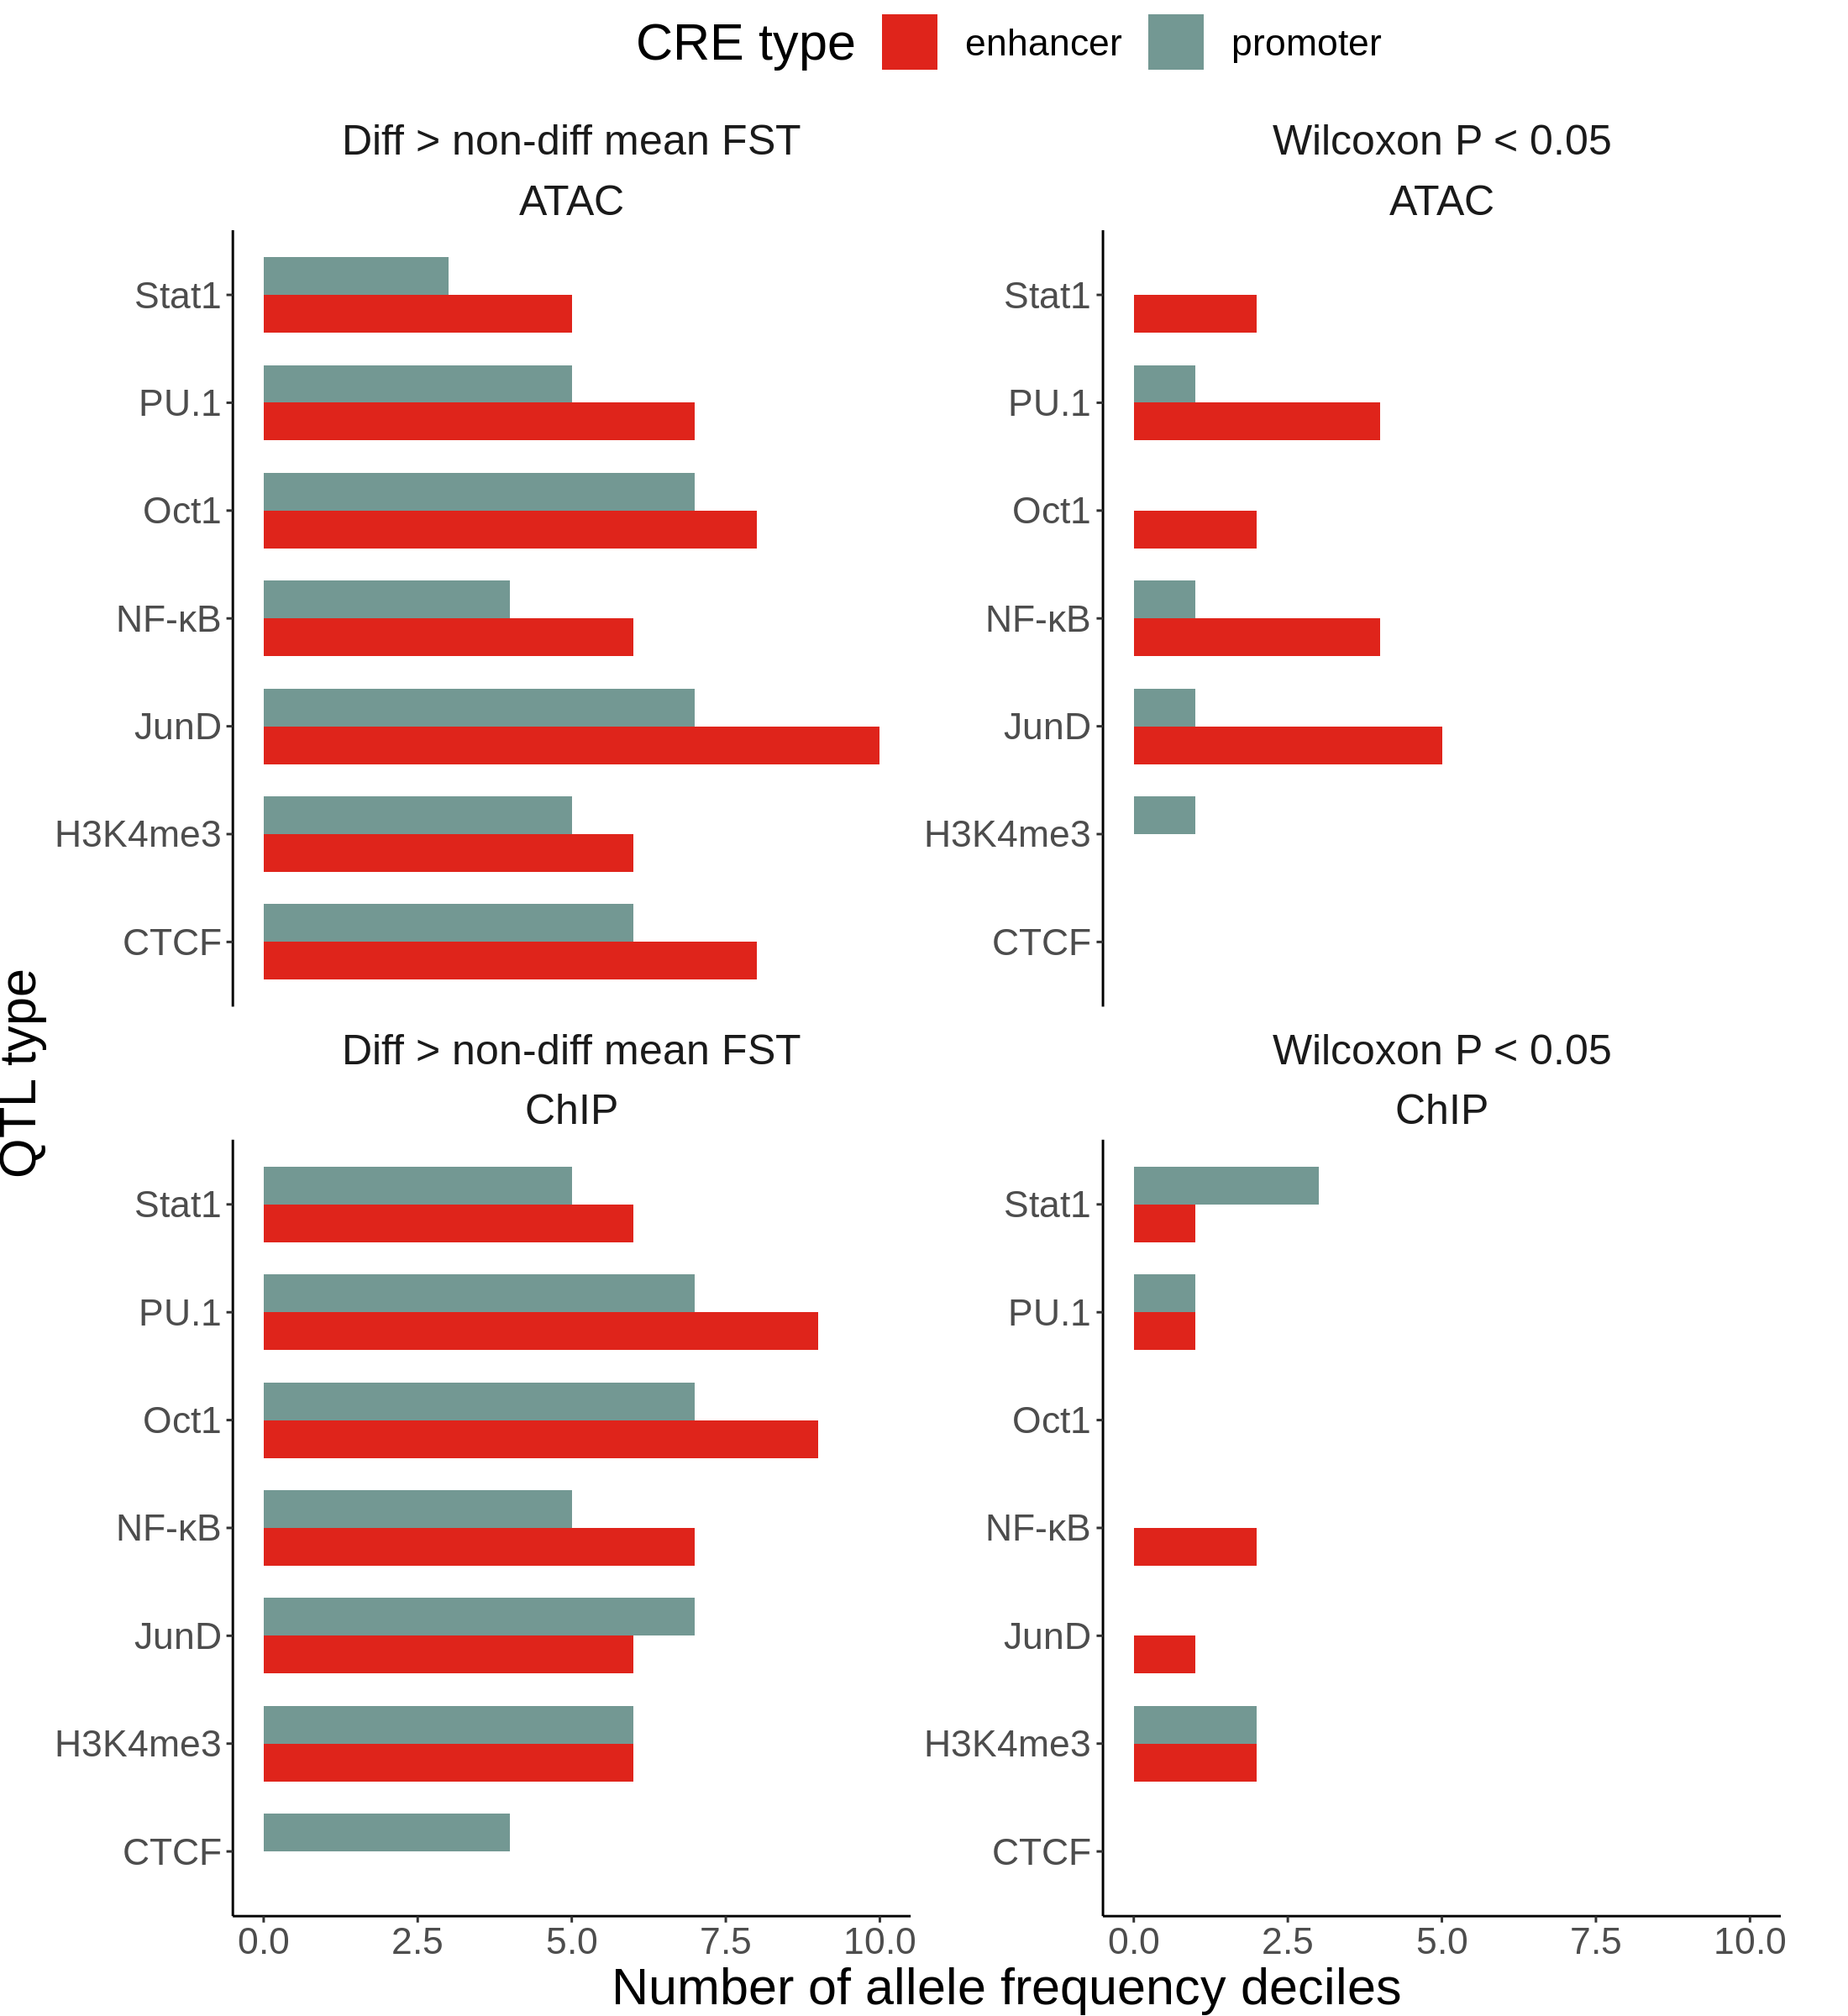

In [63]:
cre_colors <- c("#DF241B", "#739893")
titlesize <- 22
textsize <- 16

options(repr.plot.width = 11, repr.plot.height = 12, repr.plot.res = 200)

bwressumm %>% 
    filter(score_type %in% c('ATAC','ChIP')) %>% 
ggplot(aes(x=chip_type, y=Nbins, fill=cre_type)) +
        geom_bar(stat="identity", position="dodge", width=0.7) +
#         geom_text(position=position_dodge(width=.7),aes(y=count+10,label=count,hjust=0)) +
#         scale_y_continuous(expand = c(.1, .1)) +
        scale_fill_manual(values=cre_colors) +
        coord_flip() + 
        labs(
            y = "Number of allele frequency deciles",
            x = "QTL type",
            fill = "CRE type") +
        theme_classic() +
        facet_wrap(c('metric','score_type'), nrow = 2, dir = 'v', scales = 'free_y') + 
        theme(axis.text.x = element_text(size=textsize),
              axis.text.y = element_text(size=textsize),
        #           axis.ticks.length.x = unit(0.75, "line"),
              axis.title.x = element_text(size=titlesize),
              axis.title.y = element_text(size=titlesize),
              legend.position = 'top',
              legend.title = element_text(size=titlesize),
              legend.text = element_text(size=textsize),
              legend.key.size = unit(1.75, "line"),
              legend.background = element_rect(fill = "transparent",colour = NA),
              strip.background = element_blank(), 
            strip.placement = "outside", 
              strip.text = element_text(size = 18),
        #           legend.box.background = element_rect(fill = "transparent",colour = NA),
#               legend.box.background = element_rect(colour = "black"),
        #           panel.background = element_rect(fill = "transparent",colour = NA)
                  plot.margin = unit(c(0,2,0,0),"line")
        #           plot.background = element_rect(fill = "transparent",colour = NA)
             )

In [68]:
bwressumm2 <- bwres %>% 
    filter(qtl_type=='bqtl') %>% 
    group_by(qtl_type,chip_type,cre_type,score_type) %>% 
    summarize(Nbins_diff_greater = sum(diff.fst_var_mean > non_diff.fst_var_mean),
              Nbins_nom_sig = sum(diff_wilcoxP < 0.05),
              mean_dnd_lfc = mean(log2(diff.fst_var_mean/non_diff.fst_var_mean)),
              std_dnd_lfc = sd(log2(diff.fst_var_mean/non_diff.fst_var_mean)),
              se_dnd_lfc = std_dnd_lfc/sqrt(dplyr::n())) %>% 
    ungroup() %>% 
    arrange(desc(mean_dnd_lfc))
bwressumm2

`summarise()` has grouped output by 'qtl_type', 'chip_type', 'cre_type'. You
can override using the `.groups` argument.


qtl_type chip_type cre_type score_type Nbins_diff_greater Nbins_nom_sig
1  bqtl     CTCF      enhancer ATAC        8                  0           
2  bqtl     JunD      enhancer ATAC       10                  5           
3  bqtl     Oct1      enhancer ATAC        8                  2           
4  bqtl     Oct1      promoter HiC         7                  0           
5  bqtl     PU.1      enhancer HiC         7                  3           
6  bqtl     Stat1     enhancer ChIP        6                  1           
7  bqtl     PU.1      enhancer ATAC        7                  4           
8  bqtl     H3K4me3   promoter HiC         8                  2           
9  bqtl     Oct1      enhancer ChIP        9                  0           
10 bqtl     PU.1      enhancer ChIP        9                  1           
11 bqtl     Oct1      enhancer HiC         8                  0           
12 bqtl     NF-κB     enhancer ChIP        7                  2           
13 bqtl     Oct1      promoter ChIP        7                  0           
14 bqtl     NF-κB     enhancer ATAC        6                  4           
15 bqtl     Stat1     enhancer ATAC        5                  2           
16 bqtl     H3K4me3   enhancer ChIP        6                  2           
17 bqtl     Oct1      promoter ATAC        7                  0           
18 bqtl     JunD      promoter ATAC        7                  1           
19 bqtl     H3K4me3   promoter ChIP        6                  2           
20 bqtl     PU.1      promoter ChIP        7                  1           
21 bqtl     JunD      promoter ChIP        7                  0           
22 bqtl     NF-κB     promoter ATAC        4                  1           
23 bqtl     JunD      enhancer ChIP        6                  1           
24 bqtl     JunD      enhancer HiC         7                  0           
25 bqtl     H3K4me3   promoter ATAC        5                  1           
26 bqtl     Stat1     promoter ChIP        5                  3           
27 bqtl     H3K4me3   enhancer ATAC        6                  0           
28 bqtl     PU.1      promoter ATAC        5                  1           
29 bqtl     NF-κB     enhancer HiC         4                  0           
30 bqtl     JunD      promoter HiC         6                  1           
31 bqtl     H3K4me3   enhancer HiC         6                  1           
32 bqtl     PU.1      promoter HiC         7                  0           
33 bqtl     CTCF      promoter ChIP        4                  0           
34 bqtl     Stat1     promoter HiC         7                  0           
35 bqtl     NF-κB     promoter ChIP        5                  0           
36 bqtl     NF-κB     promoter HiC         3                  1           
37 bqtl     Stat1     promoter ATAC        3                  0           
38 bqtl     CTCF      promoter ATAC        6                  0           
39 bqtl     Stat1     enhancer HiC         2                  0           
40 bqtl     CTCF      enhancer ChIP       NA                 NA           
41 bqtl     CTCF      enhancer HiC        NA                 NA           
42 bqtl     CTCF      promoter HiC        NA                 NA           
   mean_dnd_lfc  std_dnd_lfc se_dnd_lfc
1   0.6948096310 1.0117629   0.31994753
2   0.2651504469 0.2701576   0.08543132
3   0.2603568158 0.2866605   0.09065002
4   0.2301091389 0.4454154   0.14085273
5   0.2163302403 0.2894842   0.09154296
6   0.1972024256 0.4241126   0.13411618
7   0.1876104304 0.2290338   0.07242684
8   0.1852785580 0.2928546   0.09260876
9   0.1808212451 0.1913879   0.06052216
10  0.1722939138 0.1891715   0.05982129
11  0.1661270902 0.1560514   0.04934779
12  0.1645617246 0.2624431   0.08299181
13  0.1607236043 0.3135614   0.09915683
14  0.1494678573 0.3389104   0.10717286
15  0.1456876737 0.5561674   0.17587559
16  0.1384001801 0.3381955   0.10694679
17  0.1133924826 0.3383689   0.10700165
18  0.0925107354 0.3121880   0.09872252
19  0.0912787562 0

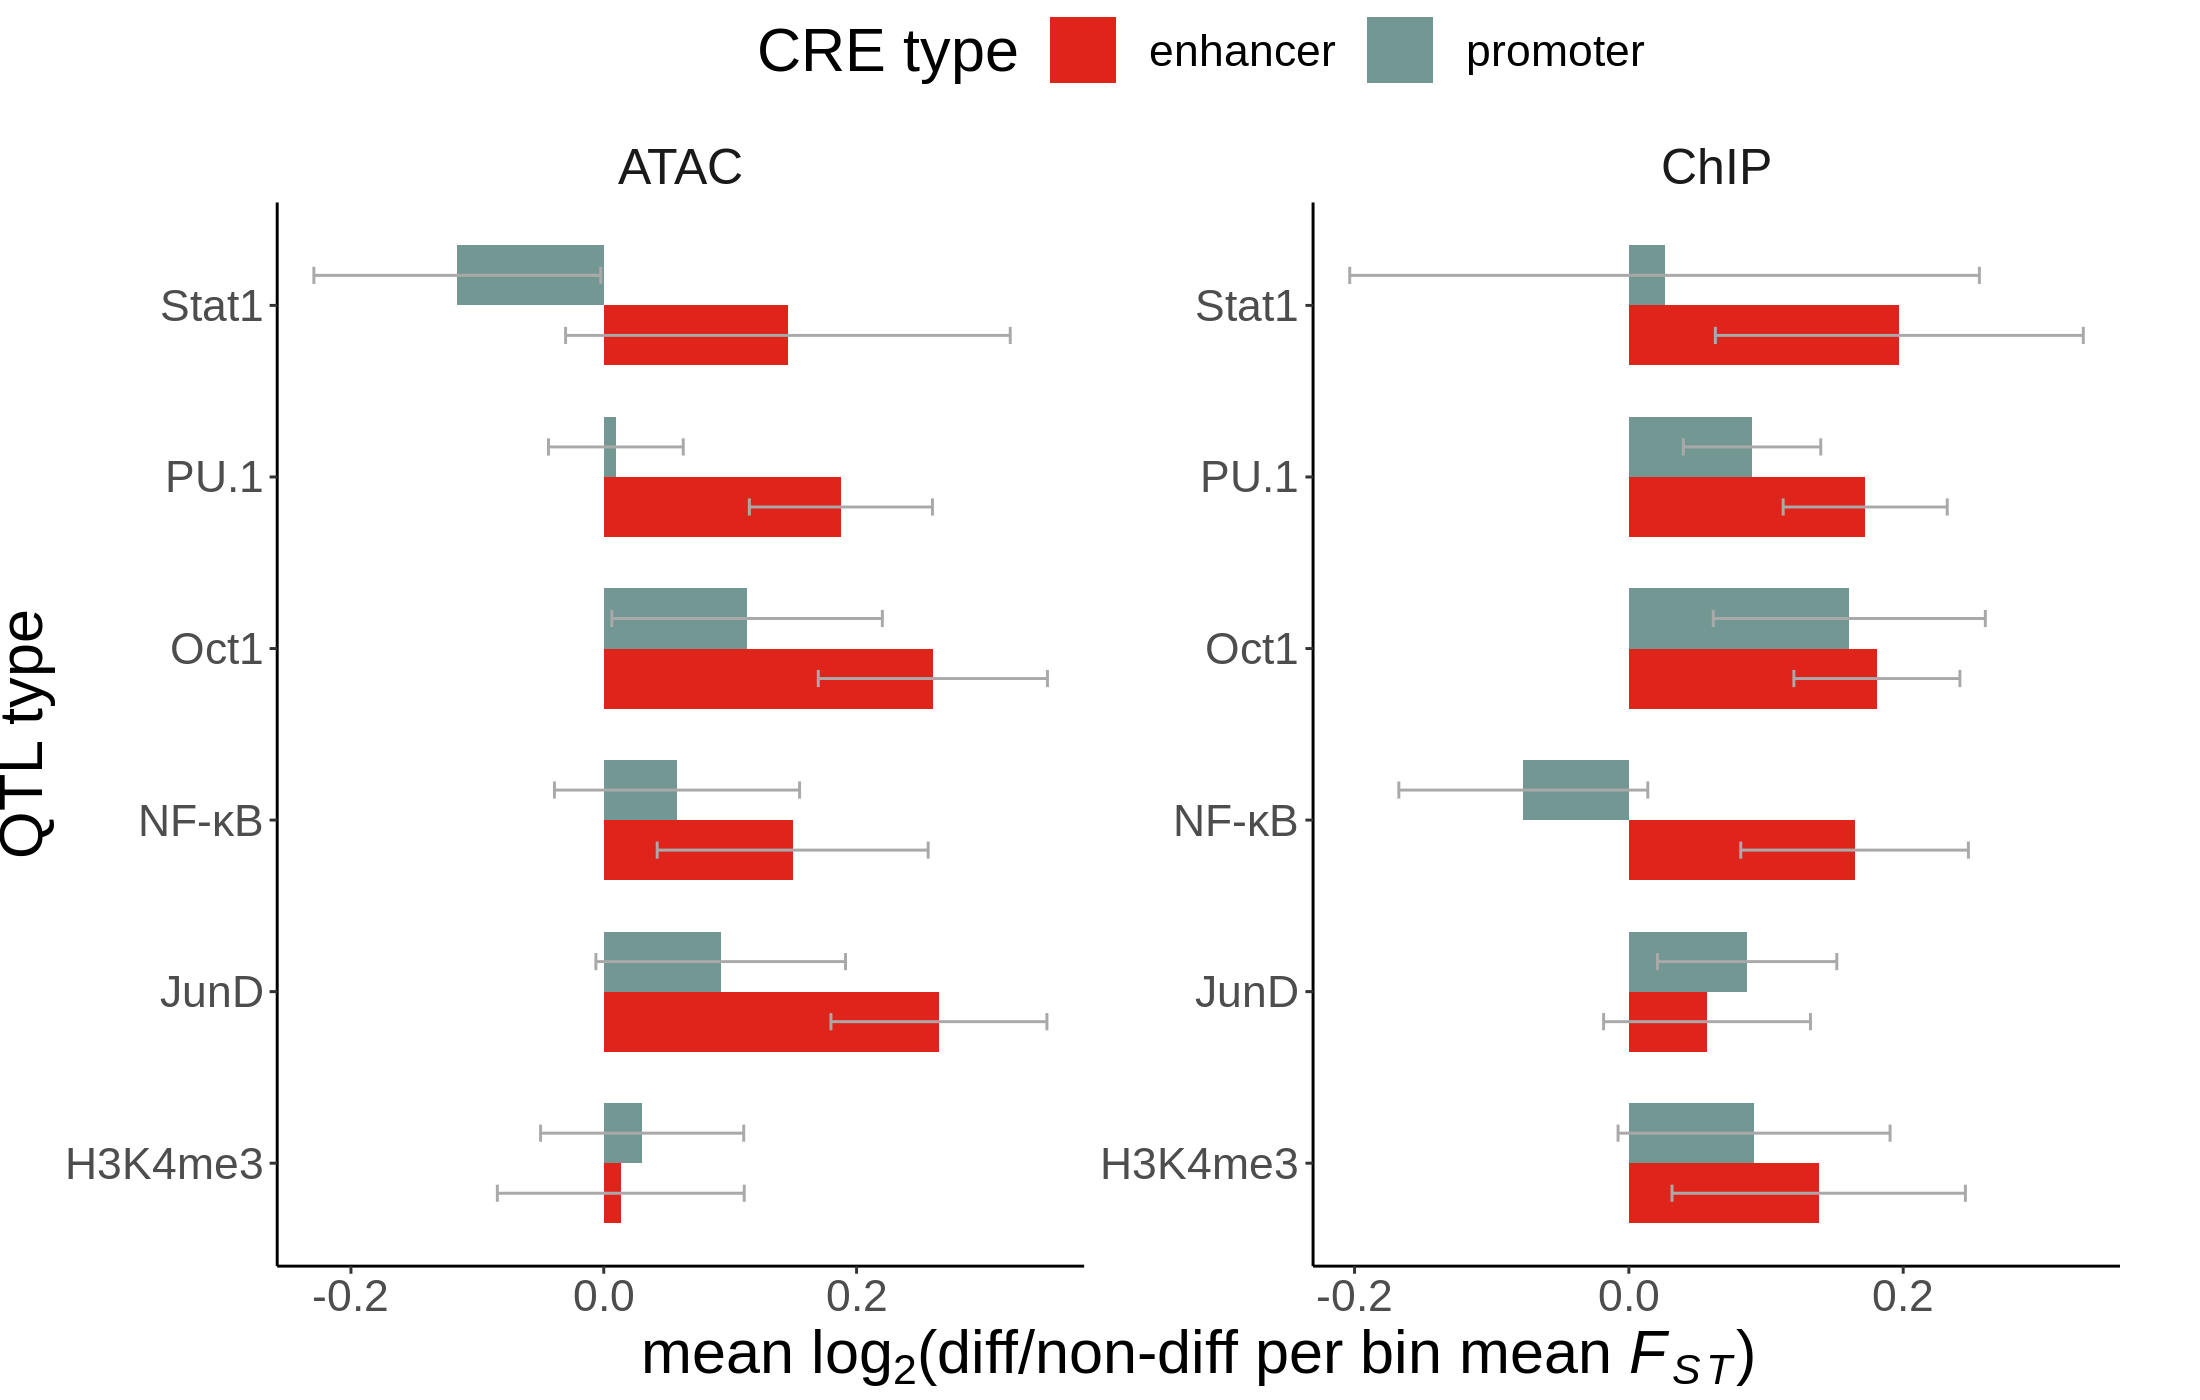

In [74]:
cre_colors <- c("#DF241B", "#739893")
titlesize <- 22
textsize <- 16

options(repr.plot.width = 11, repr.plot.height = 7, repr.plot.res = 200)

bwressumm2 %>% 
    filter(score_type %in% c('ATAC','ChIP'),
           chip_type != 'CTCF') %>% 
ggplot(aes(x=chip_type, y=mean_dnd_lfc, fill=cre_type)) +
        geom_bar(stat="identity", position="dodge", width=0.7) + 
        geom_errorbar(aes(ymin = mean_dnd_lfc - se_dnd_lfc, ymax = mean_dnd_lfc + se_dnd_lfc), 
                      position=position_dodge(width=0.7),
                      width = 0.2, 
                      color = "darkgray") +
        scale_fill_manual(values=cre_colors) +
        coord_flip() + 
        labs(
            y = expression("mean log"[2]*"(diff/non-diff per bin mean "*italic(F[ST])*")"),
            x = "QTL type",
            fill = "CRE type") +
        theme_classic() +
        facet_wrap('score_type', nrow = 1, dir = 'h', scales = 'free') + 
        theme(axis.text.x = element_text(size=textsize),
              axis.text.y = element_text(size=textsize),
        #           axis.ticks.length.x = unit(0.75, "line"),
              axis.title.x = element_text(size=titlesize),
              axis.title.y = element_text(size=titlesize),
              legend.position = 'top',
              legend.title = element_text(size=titlesize),
              legend.text = element_text(size=textsize),
              legend.key.size = unit(1.75, "line"),
              legend.background = element_rect(fill = "transparent",colour = NA),
              strip.background = element_blank(), 
            strip.placement = "outside", 
              strip.text = element_text(size = 18),
        #           legend.box.background = element_rect(fill = "transparent",colour = NA),
#               legend.box.background = element_rect(colour = "black"),
        #           panel.background = element_rect(fill = "transparent",colour = NA)
                  plot.margin = unit(c(0,2,0,0),"line")
        #           plot.background = element_rect(fill = "transparent",colour = NA)
             )

## iHS

In [102]:
ihs_fname <- "/home/kpettie/nf_selection/supp_data/LeaEtAl2021/JohnsonAndVoight2018/JohnsonAndVoight2018_iHSscores_8pops_percentiles.txt.gz"
ihs <- read_tsv(ihs_fname)
ihs

Rows: 13508851 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): seqnames, RSNUM
dbl (28): rank2_abs_ihs, start, max_abs_ihs, daf_CEU, daf_TSI, daf_FIN, daf_...
lgl  (1): selection_candidate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


rank2_abs_ihs seqnames start     RSNUM       max_abs_ihs daf_CEU
1        0             chr1     200165237 rs146917591 0.418       0.0000 
2        0             chr4     127790670 rs78531214  0.019       0.0000 
3        0             chr2       2290779 rs115788827 2.944       0.0000 
4        0             chr20     18548858 rs140624959 0.347       0.0000 
5        0             chr9     114766818 rs2762486   0.250       0.0152 
6        0             chr9     121698757 rs115245846 0.825       0.0000 
7        0             chr3       5045861 rs143166352 0.211       0.0000 
8        0             chr10     76571066 rs12776360  0.568       0.0303 
9        0             chr4       8130022 rs184612156 0.804       0.0000 
10       0             chr1      72023792 rs115585195 0.519       0.0253 
11       0             chr4      64938844 rs115710752 0.181       0.0000 
12       0             chr7     105510600 rs368009154 1.739       1.0000 
13       0             chr1      16460218 rs141919044 0.939       0.0000 
14       0             chr2     109781675 rs77551690  2.178       0.0000 
15       0             chr2     160892060 rs148926223 0.289       0.0101 
16       0             chr4     129043329 rs35810613  1.427       0.0000 
17       0             chr16      6479279 rs137986511 0.707       0.0000 
18       0             chr22     25342331 rs111469084 0.048       0.0000 
19       0             chr7     121528732 rs142160725 0.258       0.0101 
20       0             chr4     101969950 rs112144575 0.157       0.0152 
21       0             chr10     64393507 rs149715244 0.130       0.0000 
22       0             chr3     103284627 rs114391514 0.201       0.0000 
23       0             chr15     91501344 rs73494552  0.210       0.0000 
24       0             chr20     22307605 rs113680947 1.690       0.0000 
25       0             chr2     128276033 rs187659616 0.040       0.0000 
26       0             chr7     126626394 rs113356105 0.425       0.0000 
27       0             chr7     150494597 rs142499401 0.596       0.0000 
28       0             chr8      37959331 rs147539194 0.956       0.0303 
29       0             chr1     194409596 rs115962078 0.438       1.0000 
30       0             chr10     62772086 rs142333891 0.207       0.0000 
31       0             chr1       9988482 rs111522342 0.947       0.0000 
32       0             chr1      58475327 rs140481639 0.298       0.0000 
33       0             chr5      27608980 rs138112924 0.864       0.0152 
34       0             chr7     155175399 rs117195854 0.022       0.0202 
35       0             chrX      21063610 rs191353348 0.414       0.0101 
36       0             chr8      19471375 rs58944821  0.308       0.0000 
37       0             chrX      20304604 rs185431421 1.100       0.0051 
38       0             chr20     36350927 rs113615620 0.039       0.0000 
39       0             chr17     48183351 rs149593436 0.013       0.0000 
40       0             chrX      48968587 rs189663567 1.106       0.0051 
41       0             chr10    109999320 rs145569623 0.099       0.0000 
42       0             chr13     47451847 rs140950739 0.190       0.0000 
43       0             chr4     103616578 rs17033184  0.444       0.0000 
44       0             chr10     61488229 rs116689036 0.303       0.0000 
45       0             chr8      16691692 rs114470858 2.167       0.0000 
46       0             chr2      72680716 rs12996385  0.353       0.0253 
47       0             chr4      65812760 rs115832116 0.154       0.0000 
48       0             chr2     128276401 rs147118279 0.040       0.0000 
49       0             chr2     213174652 rs142730360 0.981       0.0101 
50       0             chrX      29364856 rs140088181 0.122       0.0000 
⋮        ⋮             ⋮        ⋮         ⋮           ⋮           ⋮      
13508802 5.986         chr19     57797910 rs142965298 6.590       0.0101 
13508803 5.988         chr2     152481854 rs373421444 6.540       0.0101 
13508804 5.99

In [103]:
fst_fname <- "/cashew/users/kade/nextflow/selection_1000G/abc/fst/070422output/fst_sub/EUR_vs_AFR.ccres_shared_allsamps.fst.percentiles.txt.gz"
fst <- read_tsv(fst_fname)
fst

Rows: 171517 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): seqnames
dbl (3): start, FST, fst_percentile

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seqnames start     FST         fst_percentile
1      chr1     740243    2.62413e-01 0.9732155     
2      chr1     740284    1.35139e-02 0.6331559     
3      chr1     740285    4.70958e-03 0.4563279     
4      chr1     740388    1.18435e-02 0.6149886     
5      chr1     740416    2.61220e-01 0.9729764     
6      chr1     740495    2.47406e-03 0.4001294     
7      chr1     740525    3.07407e-02 0.7533597     
8      chr1     757394    1.22874e-02 0.6196587     
9      chr1     757567    1.24728e-03 0.3284048     
10     chr1     757576    2.04715e-05 0.2025805     
11     chr1     757640    6.33724e-01 0.9991371     
12     chr1     757691    1.28443e-01 0.9226899     
13     chr1     757734    3.41643e-01 0.9852085     
14     chr1     758391    1.16612e-03 0.2892658     
15     chr1     758400    2.04715e-05 0.2025805     
16     chr1     758412    1.22874e-02 0.6196587     
17     chr1     758426    1.16612e-03 0.2892658     
18     chr1     758449    4.86356e-02 0.8175108     
19     chr1     758478    1.16612e-03 0.2892658     
20     chr1     758504    4.15128e-02 0.7965566     
21     chr1     758509    2.35240e-03 0.3802539     
22     chr1     758591    2.35945e-02 0.7141391     
23     chr1     758626    3.33653e-01 0.9841648     
24     chr1     758663    1.18435e-02 0.6149886     
25     chr1     758664    4.74484e-02 0.8141759     
26     chr1     758770    1.29614e-01 0.9234420     
27     chr1     758853    4.05238e-03 0.4518736     
28     chr1     762685    2.35240e-03 0.3802539     
29     chr1     762687    1.24728e-03 0.3284048     
30     chr1     762843    2.12090e-02 0.6982865     
31     chr1     762856    1.31760e-02 0.6296810     
32     chr1     762890    2.04715e-05 0.2025805     
33     chr1     762932    4.98228e-02 0.8203618     
34     chr1     762947    2.12090e-02 0.6982865     
35     chr1     763019    1.30299e-02 0.6293195     
36     chr1     763101    1.16612e-03 0.2892658     
37     chr1     763129    2.12090e-02 0.6982865     
38     chr1     888086    3.53870e-03 0.4373094     
39     chr1     888169    2.04715e-05 0.2025805     
40     chr1     888205    8.60757e-03 0.5664628     
41     chr1     888220    3.26335e-02 0.7618312     
42     chr1     888239    1.02256e-01 0.9014325     
43     chr1     888240    5.91137e-03 0.5112729     
44     chr1     888364    2.04715e-05 0.2025805     
45     chr1     888389    8.60757e-03 0.5664628     
46     chr1     888442    2.71691e-02 0.7348368     
47     chr1     888563    4.72502e-03 0.4782383     
48     chr1     888564    1.16612e-03 0.2892658     
49     chr1     892646    2.04715e-05 0.2025805     
50     chr1     892674    2.35240e-03 0.3802539     
⋮      ⋮        ⋮         ⋮           ⋮             
171468 chr9     140317481 2.04715e-05 0.2025805     
171469 chr9     140317622 2.04715e-05 0.2025805     
171470 chr9     140317725 1.44987e-02 0.6438837     
171471 chr9     140317726 1.44987e-02 0.6438837     
171472 chr9     140317774 1.23607e-01 0.9194249     
171473 chr9     140317872 5.33322e-02 0.8286584     
171474 chr9     140317898 3.53870e-03 0.4373094     
171475 chr9     140317979 2.31289e-02 0.7111423     
171476 chr9     140317991 5.58578e-02 0.8342672     
171477 chr9     140317999 4.53931e-02 0.8081531     
171478 chr9     140353684 2.04715e-05 0.2025805     
171479 chr9     140353689 3.69276e-03 0.4377409     
171480 chr9     140353745 2.47406e-03 0.4001294     
171481 chr9     140353783 2.82306e-02 0.7399267     
171482 chr9     140353805 2.04715e-05 0.2025805     
171483 chr9     140353882 2.04715e-05 0.2025805     
171484 chr9     140353917 1.68476e-02 0.6666161     
171485 chr9     140353964 2.13360e-02 0.7019479     
171486 chr9     140354014 2.35240e-03 0.3802539     
171487 chr9     140446124 3.78785e-02 0.7833159     
171488 chr9     140446141 2.35240e-03 0.3802539     
171489 chr9     140446157 1.16612e-03 0.2892658     
171490 chr9     140446171 2.42969e-02 0.7184827     
171491 chr9     140446172 2.4296

In [129]:
qtl_name <- 'junD'
qtl_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/work/a9/36b10b0c513fff8286ea7b8fb5f37b/junD.txt'
frq_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/work/a9/36b10b0c513fff8286ea7b8fb5f37b/alternateAlleleHighFreq.AFREUR.bed.gz'
frq <- read_tsv(frq_fname)
# bQTL data (either all tested or sig only (CTCF))
qtl <- read_tsv(qtl_fname)

if (qtl_name=='ctcf') {
    qtl <- qtl %>%
        mutate(bqtl_alt_affinity = if_else(beta < 0, 'low', 'high')) %>%
        dplyr::select(-beta)
} else {
    qtl <- qtl %>%
        mutate(bqtl_alt_affinity = case_when(POSTfreq > prechipfreq ~ 'low',
                                             POSTfreq < prechipfreq ~ 'high',
                                             POSTfreq == prechipfreq ~ 'neutral'))
}
qtl <- qtl %>%
     merge(
     .,
     frq %>%
         dplyr::select(-start) %>%
         dplyr::rename(Chr=seqnames,
                       position=end),
     all.x=TRUE
  ) %>%
  merge(.,
       fst %>%
           dplyr::rename(Chr=seqnames,
                  position=start,
                  bqtl_fst=FST,
                  bqtl_fst_percentile=fst_percentile),
       all.x=TRUE)

print('Merging data tables...')

qtl <- as.data.table(ihs %>%
        dplyr::select(seqnames,
                      start,
                      rank2_abs_ihs,
                      rank2_percentile,
                      max_abs_ihs) %>%
        dplyr::rename(Chr=seqnames,
                      position=start,
                      bqtl_rank2_abs_ihs=rank2_abs_ihs,
                      bqtl_rank2_percentile=rank2_percentile,
                      bqtl_max_abs_ihs=max_abs_ihs))[as.data.table(qtl),
                                                        on = .(Chr, position),
                                                        mult='first'
                                                    ] %>% 
                                                        as_tibble()
qtl

Rows: 409474 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): seqnames, ref, alt, alt_high_freq
dbl (6): start, end, AFR_ref_frq, AFR_alt_frq, EUR_ref_frq, EUR_alt_frq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1880520 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chr, ALTallele, POSTallele
dbl (7): position, Depth, ALTdepth, REFDepth, POSTfreq, prechipfreq, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Merging data tables..."


Chr  position  bqtl_rank2_abs_ihs bqtl_rank2_percentile
1       chr1  67181    NA                 NA                   
2       chr1  84244    NA                 NA                   
3       chr1  86018    NA                 NA                   
4       chr1  86331    NA                 NA                   
5       chr1  87190    NA                 NA                   
6       chr1  91605    NA                 NA                   
7       chr1  92858    NA                 NA                   
8       chr1  94986    NA                 NA                   
9       chr1 126113    NA                 NA                   
10      chr1 540975    NA                 NA                   
11      chr1 618463    NA                 NA                   
12      chr1 713189    NA                 NA                   
13      chr1 713190    NA                 NA                   
14      chr1 713977    NA                 NA                   
15      chr1 714019    NA                 NA                   
16      chr1 714427    NA                 NA                   
17      chr1 715074    NA                 NA                   
18      chr1 715205    NA                 NA                   
19      chr1 715271    NA                 NA                   
20      chr1 716241    NA                 NA                   
21      chr1 717474    NA                 NA                   
22      chr1 717627    NA                 NA                   
23      chr1 722980    NA                 NA                   
24      chr1 722981    NA                 NA                   
25      chr1 724103    NA                 NA                   
26      chr1 728951    NA                 NA                   
27      chr1 729679    NA                 NA                   
28      chr1 731718    NA                 NA                   
29      chr1 735068    NA                 NA                   
30      chr1 735985    NA                 NA                   
31      chr1 736745    NA                 NA                   
32      chr1 738539    NA                 NA                   
33      chr1 739565    NA                 NA                   
34      chr1 739608    NA                 NA                   
35      chr1 740416    NA                 NA                   
36      chr1 740857    NA                 NA                   
37      chr1 741397    NA                 NA                   
38      chr1 746189    NA                 NA                   
39      chr1 748061    NA                 NA                   
40      chr1 748878    NA                 NA                   
41      chr1 751756    NA                 NA                   
42      chr1 752242    NA                 NA                   
43      chr1 752566    NA                 NA                   
44      chr1 752796    NA                 NA                   
45      chr1 752894    NA                 NA                   
46      chr1 753405    NA                 NA                   
47      chr1 753865    NA                 NA                   
48      chr1 753976    NA                 NA                   
49      chr1 754964    NA                 NA                   
50      chr1 757640    NA                 NA                   
⋮       ⋮    ⋮         ⋮                  ⋮                    
1880491 chr9 140924984 0.028              0.02290033           
1880492 chr9 140950994 0.953              0.66429820           
1880493 chr9 140977802 1.881              0.94154696           
1880494 chr9 140981573    NA                      NA           
1880495 chr9 140986481 1.412              0.84627290           
1880496 chr9 140986533    NA                      NA           
1880497 chr9 140995944    NA                      NA           
1880498 chr9 141003672    NA                      NA           
1880499 chr9 141005806 0.658              0.49353787           
1880500 chr9 141005820 0.507              0.39117303           
1880501 chr9 141022099    NA            

In [132]:
qtl %>% 
    filter(!is.na(bqtl_max_abs_ihs),
           !is.na(bqtl_fst))

Chr  position  bqtl_rank2_abs_ihs bqtl_rank2_percentile bqtl_max_abs_ihs
1     chr1  894573   1.577              0.8886429             1.631           
2     chr1  894719   0.373              0.2934757             1.197           
3     chr1  935398   1.386              0.8385856             1.626           
4     chr1  935459   0.616              0.4659977             0.801           
5     chr1  935492   1.058              0.7148907             1.660           
6     chr1  944564   1.352              0.8280752             1.417           
7     chr1  948869   2.110              0.9653911             2.272           
8     chr1  948870   1.594              0.8924101             1.695           
9     chr1  948921   1.695              0.9126507             1.707           
10    chr1  949053   1.656              0.9052554             1.854           
11    chr1  952003   1.344              0.8255301             1.521           
12    chr1  968345   0.754              0.5536334             1.015           
13    chr1  968513   0.718              0.5315766             1.920           
14    chr1 1004946   1.769              0.9253456             1.863           
15    chr1 1004957   0.804              0.5832491             0.857           
16    chr1 1004980   0.804              0.5832491             0.857           
17    chr1 1142150   2.905              0.9950529             3.106           
18    chr1 1167796   2.754              0.9928132             2.873           
19    chr1 1169980   1.334              0.8223101             1.408           
20    chr1 1170148   1.995              0.9547978             2.067           
21    chr1 1209482   2.378              0.9817986             2.701           
22    chr1 1235710   2.108              0.9652280             2.771           
23    chr1 1235792   1.359              0.8302895             1.453           
24    chr1 1334700   0.794              0.5774186             1.109           
25    chr1 1334993   0.476              0.3690772             1.308           
26    chr1 1342612   1.484              0.8660984             2.283           
27    chr1 1342645   1.437              0.8533995             2.599           
28    chr1 1342770   0.946              0.6607460             1.143           
29    chr1 1353591   0.651              0.4889986             0.893           
30    chr1 1353601   1.430              0.8514206             1.519           
31    chr1 1550745   1.037              0.7052115             1.062           
32    chr1 1710035   1.512              0.8732349             2.672           
33    chr1 1796424   1.155              0.7567848             1.483           
34    chr1 1827256   1.178              0.7660455             1.322           
35    chr1 1827319   1.240              0.7897875             1.373           
36    chr1 1840514   1.517              0.8744825             1.594           
37    chr1 2126746   0.322              0.2548458             1.084           
38    chr1 2313540   0.853              0.6111000             0.918           
39    chr1 2313612   1.033              0.7033476             1.076           
40    chr1 2319329   1.877              0.9410180             1.989           
41    chr1 2322996   0.286              0.2272028             0.376           
42    chr1 2323041   0.393              0.3083950             0.447           
43    chr1 2477625   0.424              0.3313033             1.322           
44    chr1 2513014   0.685              0.5108591             1.902           
45    chr1 2513161   0.969              0.6723551             1.013           
46    chr1 2518049   0.231              0.1844207             0.634           
47    chr1 2518160   0.748              0.5500032             1.000           
48    chr1 2518411   0.160              0.1284228             0.918           
49    chr1 3535550   1.003              0.6890873             1.120           
50    chr1 3535556   1.111              0.7383617       

In [138]:
removecols1 <- intersect(colnames(wabc_olap), colnames(qtl))
removecols2 <- wabc_olap %>% 
    select(starts_with('bqtl')) %>% 
    colnames()
removecols <- unique(c(removecols1,removecols2))
removecols

[1] "bqtl_alt_affinity"       "Depth"                  
 [3] "ALTdepth"                "REFDepth"               
 [5] "ALTallele"               "POSTallele"             
 [7] "POSTfreq"                "prechipfreq"            
 [9] "bqtl_fst"                "bqtl_fst_percentile"    
[11] "bqtl_pos"                "bqtl_pos_all"           
[13] "bqtl_alt_high_freq"      "bqtl_concordance"       
[15] "bqtl_p"                  "bqtl_mean_alt_freq"     
[17] "bqtl_AFR_alt_frq"        "bqtl_EUR_alt_frq"       
[19] "bqtl_N"                  "bqtl_fst_percentile_all"
[21] "bqtl_alt_affinity_all"   "bqtl_alt_high_freq_all" 
[23] "bqtl_direction"

In [142]:
wabc_olap <- wabc_olap %>% 
    select(-all_of(removecols))

In [148]:
qtl

Chr  position  bqtl_rank2_abs_ihs bqtl_rank2_percentile
1       chr1  67181    NA                 NA                   
2       chr1  84244    NA                 NA                   
3       chr1  86018    NA                 NA                   
4       chr1  86331    NA                 NA                   
5       chr1  87190    NA                 NA                   
6       chr1  91605    NA                 NA                   
7       chr1  92858    NA                 NA                   
8       chr1  94986    NA                 NA                   
9       chr1 126113    NA                 NA                   
10      chr1 540975    NA                 NA                   
11      chr1 618463    NA                 NA                   
12      chr1 713189    NA                 NA                   
13      chr1 713190    NA                 NA                   
14      chr1 713977    NA                 NA                   
15      chr1 714019    NA                 NA                   
16      chr1 714427    NA                 NA                   
17      chr1 715074    NA                 NA                   
18      chr1 715205    NA                 NA                   
19      chr1 715271    NA                 NA                   
20      chr1 716241    NA                 NA                   
21      chr1 717474    NA                 NA                   
22      chr1 717627    NA                 NA                   
23      chr1 722980    NA                 NA                   
24      chr1 722981    NA                 NA                   
25      chr1 724103    NA                 NA                   
26      chr1 728951    NA                 NA                   
27      chr1 729679    NA                 NA                   
28      chr1 731718    NA                 NA                   
29      chr1 735068    NA                 NA                   
30      chr1 735985    NA                 NA                   
31      chr1 736745    NA                 NA                   
32      chr1 738539    NA                 NA                   
33      chr1 739565    NA                 NA                   
34      chr1 739608    NA                 NA                   
35      chr1 740416    NA                 NA                   
36      chr1 740857    NA                 NA                   
37      chr1 741397    NA                 NA                   
38      chr1 746189    NA                 NA                   
39      chr1 748061    NA                 NA                   
40      chr1 748878    NA                 NA                   
41      chr1 751756    NA                 NA                   
42      chr1 752242    NA                 NA                   
43      chr1 752566    NA                 NA                   
44      chr1 752796    NA                 NA                   
45      chr1 752894    NA                 NA                   
46      chr1 753405    NA                 NA                   
47      chr1 753865    NA                 NA                   
48      chr1 753976    NA                 NA                   
49      chr1 754964    NA                 NA                   
50      chr1 757640    NA                 NA                   
⋮       ⋮    ⋮         ⋮                  ⋮                    
1880491 chr9 140924984 0.028              0.02290033           
1880492 chr9 140950994 0.953              0.66429820           
1880493 chr9 140977802 1.881              0.94154696           
1880494 chr9 140981573    NA                      NA           
1880495 chr9 140986481 1.412              0.84627290           
1880496 chr9 140986533    NA                      NA           
1880497 chr9 140995944    NA                      NA           
1880498 chr9 141003672    NA                      NA           
1880499 chr9 141005806 0.658              0.49353787           
1880500 chr9 141005820 0.507              0.39117303           
1880501 chr9 141022099    NA            

In [152]:
qtl %>% 
    filter(duplicated(paste(Chr, position)) | duplicated(paste(Chr, position, fromLast = TRUE))) %>% 
    select(ref:bqtl_fst_percentile, everything())

ref       alt          AFR_ref_frq AFR_alt_frq EUR_ref_frq EUR_alt_frq
1  G         GC           0.9916470   0.00835322  0.997573    0.00242718 
2  G         T            0.8735080   0.12649200  0.719660    0.28034000 
3  G         T            0.8735080   0.12649200  0.719660    0.28034000 
4  C         T            0.8842480   0.11575200  0.764563    0.23543700 
5  C         CTTTTG       0.9952270   0.00477327  1.000000    0.00000000 
6  C         CTTTTG       0.9952270   0.00477327  1.000000    0.00000000 
7  T         TGCGCCCCC    0.7911690   0.20883100  0.998786    0.00121359 
8  T         C            0.7195700   0.28043000  0.996359    0.00364078 
9  T         C            0.7195700   0.28043000  0.996359    0.00364078 
10 C         G            0.9665870   0.03341290  0.440534    0.55946600 
11 C         CCT          1.0000000   0.00000000  0.996359    0.00364078 
12 C         CCT          1.0000000   0.00000000  0.996359    0.00364078 
13 T         TGCGGCGCGGCA 0.9844870   0.01551310  0.996359    0.00364078 
14 T         C            0.0883055   0.91169500  0.364078    0.63592200 
15 T         C            0.0883055   0.91169500  0.364078    0.63592200 
16 G         T            0.9391410   0.06085920  1.000000    0.00000000 
17 CAAAAAAGA C            1.0000000   0.00000000  1.000000    0.00000000 
18 A         ACT          0.9057280   0.09427210  0.628641    0.37135900 
19 A         T            0.8520290   0.14797100  0.649272    0.35072800 
20 A         T            0.8520290   0.14797100  0.649272    0.35072800 
   alt_high_freq bqtl_fst   bqtl_fst_percentile Chr   position 
1  AFR           0.06950420 0.8600605           chr1   22351947
2  EUR           0.00206099 0.3339203           chr1   22351947
3  EUR           0.06950420 0.8600605           chr1   22351947
4  EUR           0.04723540 0.8125317           chr12  15724215
5  AFR           0.00353870 0.4373094           chr12  15724215
6  AFR           0.04723540 0.8125317           chr12  15724215
7  AFR           0.20335600 0.9579109           chr16  70488586
8  AFR           0.26923900 0.9746031           chr16  70488586
9  AFR           0.20335600 0.9579109           chr16  70488586
10 EUR           0.00247406 0.4001294           chr17  46993233
11 EUR           0.49921200 0.9961870           chr17  46993233
12 EUR           0.00247406 0.4001294           chr17  46993233
13 AFR           0.00618332 0.5190506           chr19  14800922
14 AFR           0.19571300 0.9555321           chr19  14800922
15 AFR           0.00618332 0.5190506           chr19  14800922
16 AFR           0.05927410 0.8413568           chr2   30669993
17 none          0.36532500 0.9876980           chr2  203130282
18 EUR           0.19369600 0.9548500           chr8   77912608
19 EUR           0.10328400 0.9024353           chr8   77912608
20 EUR           0.19369600 0.9548500           chr8   77912608
   bqtl_rank2_abs_ihs bqtl_rank2_percentile bqtl_max_abs_ihs Depth ALTdepth
1  1.361              0.8309186             2.112            129     0     
2  1.361              0.8309186             2.112            129     0     
3  1.361              0.8309186             2.112            129     0     
4  0.768              0.5620341             1.070            306    18     
5  0.768              0.5620341             1.070            306    18     
6  0.768              0.5620341             1.070            306    18     
7     NA                     NA                NA            106     9     
8     NA                     NA                NA            106     9     
9     NA                     NA                NA            106     9     
10    NA                     NA                NA            158    28     
11    NA                     NA                NA            158    28     
12    NA                     NA                NA            158    28     
13    NA                     NA                NA             95    88     
14    NA                     NA          

In [156]:
?ifelse

In [158]:
# widen and add bQTL
wabc_ihs <- plyranges::join_overlap_left(
    wabc_olap %>% plyranges::as_granges(),
    qtl %>%
        dplyr::rename(seqnames=Chr,
                      start=position,
                      bqtl_p=pvalue) %>%
        mutate(end=start+1,
               bqtl_pos=start) %>%
        plyranges::as_granges()
) %>%
    as_tibble() %>%
    mutate(coded_alt_affinity = case_when(bqtl_alt_affinity=='high' ~ 1,
                                          bqtl_alt_affinity=='low' ~ -1),
           coded_alt_high_freq = case_when(alt_high_freq=='AFR' ~ 1,
                                           alt_high_freq=='EUR' ~ -1)) %>%
    group_by(hgnc_symbol, name) %>%
    arrange(bqtl_p, .by_group=TRUE) %>%
    mutate(bqtl_N=sum(bqtl_p < 0.05),
           bqtl_pos_all=paste0(bqtl_pos[bqtl_p < 0.05], collapse=';'),
           bqtl_fst_percentile_all=paste0(bqtl_fst_percentile[bqtl_p < 0.05], collapse=';'),
           bqtl_alt_affinity_all=paste0(bqtl_alt_affinity[bqtl_p < 0.05], collapse=';'),
           bqtl_alt_high_freq_all=paste0(alt_high_freq[bqtl_p < 0.05], collapse=';'),
           # concordance = if high frequency allele is the high or low affinity allele consistently throughout a CRE
           bqtl_concordance=case_when(sum(bqtl_p < 0.05)>0 & (paste0(coded_alt_affinity[bqtl_p < 0.05], collapse=';')==paste0(coded_alt_high_freq[bqtl_p < 0.05], collapse=';') |
                                           paste0(-coded_alt_affinity[bqtl_p < 0.05], collapse=';')==paste0(coded_alt_high_freq[bqtl_p < 0.05], collapse=';')) ~ TRUE,
                                       sum(bqtl_p < 0.05)>0 ~ FALSE),
           bqtl_ihs_exists = if_else(any(!is.na(bqtl_max_abs_ihs) & !is.na(bqtl_p)), TRUE, FALSE),
           bqtl_ihs_pos=ifelse(bqtl_ihs_exists, bqtl_pos[bqtl_p==min(bqtl_p[!is.na(bqtl_max_abs_ihs)])], NA),
           bqtl_ihs_p=ifelse(bqtl_ihs_exists, min(bqtl_p[!is.na(bqtl_max_abs_ihs)]), NA),
           bqtl_rank2_abs_ihs=ifelse(bqtl_ihs_exists, bqtl_rank2_abs_ihs[bqtl_p==min(bqtl_p[!is.na(bqtl_max_abs_ihs)])], NA),
           bqtl_rank2_percentile=ifelse(bqtl_ihs_exists, bqtl_rank2_percentile[bqtl_p==min(bqtl_p[!is.na(bqtl_max_abs_ihs)])], NA),
           bqtl_max_abs_ihs=ifelse(bqtl_ihs_exists, bqtl_max_abs_ihs[bqtl_p==min(bqtl_p[!is.na(bqtl_max_abs_ihs)])], NA)) %>%
    dplyr::slice(1) %>%
    ungroup() %>%
    dplyr::select(-c(ref,alt,AFR_ref_frq,EUR_ref_frq),
                  -starts_with('coded_')) %>%
    dplyr::rename(bqtl_AFR_alt_frq=AFR_alt_frq,
                  bqtl_EUR_alt_frq=EUR_alt_frq,
                  bqtl_alt_high_freq=alt_high_freq) %>% 
    mutate(bqtl_direction = case_when(
                ((bqtl_alt_affinity=='high' & bqtl_alt_high_freq=='AFR') |
                    (bqtl_alt_affinity=='low' & bqtl_alt_high_freq=='EUR')) &
                bqtl_concordance ~ 'down',
                ((bqtl_alt_affinity=='high' & bqtl_alt_high_freq=='EUR') |
                    (bqtl_alt_affinity=='low' & bqtl_alt_high_freq=='AFR')) &
                bqtl_concordance ~ 'up'
            )
          )
wabc_ihs

seqnames start     end       width strand hgnc_symbol
1     chr19     58838084  58838864 781   *      A1BG       
2     chr19     58873687  58874546 860   *      A1BG       
3     chr19     58838084  58838864 781   *      A1BG-AS1   
4     chr19     58873687  58874546 860   *      A1BG-AS1   
5     chr12      9255999   9256500 502   *      A2M        
6     chr12      9270663   9271300 638   *      A2M        
7     chr22     43116666  43117166 501   *      A4GALT     
8     chr17     31860529  31861029 501   *      AA06       
9     chr12     53886720  53887220 501   *      AAAS       
10    chr12     53602620  53603120 501   *      AAAS       
11    chr12     53718446  53718946 501   *      AAAS       
12    chr12     53738460  53739396 937   *      AAAS       
13    chr12     53714871  53715662 792   *      AAAS       
14    chr12     53773640  53774228 589   *      AAAS       
15    chr12     53894432  53894954 523   *      AAAS       
16    chr9      98637649  98638509 861   *      AAED1      
17    chr9      99180419  99180919 501   *      AAED1      
18    chr9      99212186  99212686 501   *      AAED1      
19    chr9      99417349  99417849 501   *      AAED1      
20    chr15     67378153  67378653 501   *      AAGAB      
21    chr15     67383471  67383971 501   *      AAGAB      
22    chr15     67393413  67393915 503   *      AAGAB      
23    chr15     67413312  67413812 501   *      AAGAB      
24    chr15     67533472  67533972 501   *      AAGAB      
25    chr15     67546778  67547387 610   *      AAGAB      
26    chr2      69870727  69871227 501   *      AAK1       
27    chr2      70056487  70056987 501   *      AAK1       
28    chr11     77531630  77532409 780   *      AAMDC      
29    chr11     77705467  77706238 772   *      AAMDC      
30    chr2     219149034 219149534 501   *      AAMP       
31    chr2     219151795 219152297 503   *      AAMP       
32    chr2     219194481 219195011 531   *      AAMP       
33    chr2     219260658 219261158 501   *      AAMP       
34    chr2     219122241 219122743 503   *      AAMP       
35    chr2     219081482 219082369 888   *      AAMP       
36    chr2     219134682 219135364 683   *      AAMP       
37    chr17     74469569  74470086 518   *      AANAT      
38    chr17     74475649  74476159 511   *      AANAT      
39    chr17     74477129  74477635 507   *      AANAT      
40    chr17     74461987  74462488 502   *      AANAT      
41    chr17     74502369  74502870 502   *      AANAT      
42    chr17     74511446  74511946 501   *      AANAT      
43    chr20     34824088  34824588 501   *      AAR2       
44    chr16     70415167  70415667 501   *      AARS       
45    chr16     70438133  70438633 501   *      AARS       
46    chr16     70464472  70464978 507   *      AARS       
47    chr16     70510349  70510849 501   *      AARS       
48    chr16     70323162  70323669 508   *      AARS       
49    chr6      44214444  44214944 501   *      AARS2      
50    chr6      44225058  44225558 501   *      AARS2      
⋮     ⋮        ⋮         ⋮         ⋮     ⋮      ⋮          
52405 chr19     13944335  13944836 502   *      ZSWIM4     
52406 chr19     13957285  13957785 501   *      ZSWIM4     
52407 chr19     13961131  13961651 521   *      ZSWIM4     
52408 chr19     13972507  13973007 501   *      ZSWIM4     
52409 chr19     13905820  13906523 704   *      ZSWIM4     
52410 chr1      45671931  45672500 570   *      ZSWIM5     
52411 chr17     15860426  15860929 504   *      ZSWIM7     
52412 chr17     15862414  15862914 501   *      ZSWIM7     
52413 chr17     15931401  15931901 501   *      ZSWIM7     
52414 chr17     15731990  15732492 503   *      ZSWIM7     
52415 chr17     15734443  15734943 501   *      ZSWIM7     
52416 chr17     15736289  15736796 508   *      ZSWIM7     
52417 chr17     15902443  15903295 853   *      ZSWIM7     
52418 chr10     75548858  75549358 501   *      ZSWIM8     
52419 chr10     75549473  75549973 501   *    

In [169]:
wresihs <- diffQTLFSTWilcoxon(wabc_ihs,
                  qtl_p_thresh=0.05,
                  qtl_p_col=paste0(qt, '_p'),
                  qtl_dir_col=paste0(qt, '_direction'),
                  abc_p_thresh=0.05,
                  abc_p_nonthresh=0.05,
                  abc_p_col=paste0(st, '_p'),
                  abc_dir_col=paste0(st, '_monodirection'),
                  fst_col=paste0(qt, '_max_abs_ihs'),
                  class_filt=cf, # 'promoter', 'non-promoter', 'none'
                  class_res='chip',
                  freq_bin=FALSE,
                  return_df=TRUE) %>% 
    mutate(cre_type=cf,
                           qtl_type=qt,
                           score_type=st,
           .before=1)
wresihs

[1] "Testing non-promoter CREs only"


cre_type     qtl_type score_type seqnames start     end      
1    non-promoter bqtl     atac       chr1     100217620 100218122
2    non-promoter bqtl     atac       chr1     100224432 100224933
3    non-promoter bqtl     atac       chr1     100542267 100542767
4    non-promoter bqtl     atac       chr1     100596123 100596681
5    non-promoter bqtl     atac       chr1     104104568 104105068
6    non-promoter bqtl     atac       chr1     109104277 109104779
7    non-promoter bqtl     atac       chr1      11025466  11025966
8    non-promoter bqtl     atac       chr1     110546575 110547076
9    non-promoter bqtl     atac       chr1     110759432 110759932
10   non-promoter bqtl     atac       chr1     110925991 110926491
11   non-promoter bqtl     atac       chr1      11132613  11133119
12   non-promoter bqtl     atac       chr1     111422585 111423097
13   non-promoter bqtl     atac       chr1     112048311 112048838
14   non-promoter bqtl     atac       chr1     112050736 112051239
15   non-promoter bqtl     atac       chr1     112143411 112143911
16   non-promoter bqtl     atac       chr1     112146512 112147012
17   non-promoter bqtl     atac       chr1     112166914 112167417
18   non-promoter bqtl     atac       chr1     112944717 112945217
19   non-promoter bqtl     atac       chr1     113243334 113243834
20   non-promoter bqtl     atac       chr1      11335543  11336264
21   non-promoter bqtl     atac       chr1     114323291 114323803
22   non-promoter bqtl     atac       chr1     114337068 114337568
23   non-promoter bqtl     atac       chr1     114401994 114402500
24   non-promoter bqtl     atac       chr1     115047796 115048296
25   non-promoter bqtl     atac       chr1     116655266 116655792
26   non-promoter bqtl     atac       chr1     117087339 117087850
27   non-promoter bqtl     atac       chr1     117604446 117605012
28   non-promoter bqtl     atac       chr1     117914049 117914584
29   non-promoter bqtl     atac       chr1      11809148  11809648
30   non-promoter bqtl     atac       chr1     119529986 119530486
31   non-promoter bqtl     atac       chr1      12127898  12128398
32   non-promoter bqtl     atac       chr1     146580557 146581057
33   non-promoter bqtl     atac       chr1     146716762 146717709
34   non-promoter bqtl     atac       chr1     150539806 150540314
35   non-promoter bqtl     atac       chr1     150547530 150548037
36   non-promoter bqtl     atac       chr1     153721813 153722313
37   non-promoter bqtl     atac       chr1     154763665 154764165
38   non-promoter bqtl     atac       chr1      15482768  15483275
39   non-promoter bqtl     atac       chr1      15494891  15495440
40   non-promoter bqtl     atac       chr1     155057406 155057906
41   non-promoter bqtl     atac       chr1     156089603 156090103
42   non-promoter bqtl     atac       chr1     156128799 156129309
43   non-promoter bqtl     atac       chr1     156454313 156454840
44   non-promoter bqtl     atac       chr1     156777350 156777852
45   non-promoter bqtl     atac       chr1      15742395  15742895
46   non-promoter bqtl     atac       chr1     157493795 157494297
47   non-promoter bqtl     atac       chr1     157741971 157742481
48   non-promoter bqtl     atac       chr1      15898265  15898765
49   non-promoter bqtl     atac       chr1     159808340 159808841
50   non-promoter bqtl     atac       chr1     159826083 159826661
⋮    ⋮            ⋮        ⋮          ⋮        ⋮         ⋮        
2362 non-promoter bqtl     atac       chr2     188033312 188033812
2363 non-promoter bqtl     atac       chr2     191879913 191880413
2364 non-promoter bqtl     atac       chr2     192515588 192516094
2365 non-promoter bqtl     atac       chr2     196966299 196966800
2366 non-promoter bqtl     atac       chr2     197039149 197039650
2367 non-promoter bqtl     atac       chr2     203472782 203473282
2368 non-promoter bqtl     atac       chr2     204548647 204549159
2369 non-promoter bqtl     atac       chr2     20455

In [172]:
diffQTLFSTWilcoxon(wabc_ihs,
                  qtl_p_thresh=0.05,
                  qtl_p_col=paste0(qt, '_p'),
                  qtl_dir_col=paste0(qt, '_direction'),
                  abc_p_thresh=0.05,
                  abc_p_nonthresh=0.05,
                  abc_p_col=paste0(st, '_p'),
                  abc_dir_col=paste0(st, '_monodirection'),
                  fst_col=paste0(qt, '_fst'),
                  class_filt=cf, # 'promoter', 'non-promoter', 'none'
                  class_res='chip',
                  freq_bin=FALSE,
                  return_df=FALSE) 

[1] "Testing non-promoter CREs only"


$qtl_significance
[1] 0.05

$diff_significance
[1] 0.05

$pvalue
[1] 2.407611e-09

In [3]:
library(argparse)
library(docstring)
library(readxl)
library(plyranges)
library(ggplot2)
library(tidyverse)


Attaching package: ‘docstring’


The following object is masked from ‘package:utils’:

    ?


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: IRanges

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

In [4]:
ref_fname <- '/cashew/users/kade/nextflow/selection_1000G/abc/from_sherlock/abc_1000G/bqtl_topcands/work/b1/627e72af457eb9a99f8a6df8310e59/31Mar21_LCLs_mashR_eQTL_annotation.txt'
eqtl_lfsr_fname <- '/cashew/users/kade/nextflow/selection_1000G/abc/from_sherlock/abc_1000G/bqtl_topcands/work/b1/627e72af457eb9a99f8a6df8310e59/31Mar21_LFSR_eQTL_mashr_nocor.txt'
eqtl_es_fname <- '/cashew/users/kade/nextflow/selection_1000G/abc/from_sherlock/abc_1000G/bqtl_topcands/work/b1/627e72af457eb9a99f8a6df8310e59/31Mar21_pm_eQTL_mashr_nocor.txt'
chain_fname <- '/cashew/users/kade/nextflow/selection_1000G/abc/from_sherlock/abc_1000G/bqtl_topcands/work/b1/627e72af457eb9a99f8a6df8310e59/hg38ToHg19.over.chain'

In [5]:
# Lea et al. eQTL data
es_pre <- 'es'
pv_pre <- 'lfsr'
ref <- read_tsv(ref_fname, col_types=cols_only('c','c'))
eqtl_lfsr <- read_tsv(eqtl_lfsr_fname)
eqtl_es <- read_tsv(eqtl_es_fname)
print('Binding ref to eQTL')
print(dim(ref))
print(dim(eqtl_es))
print(dim(eqtl_lfsr))
eqtl <- rbind(
    cbind(ref, eqtl_es) %>%
        mutate(stat = 'es'),
    cbind(ref, eqtl_lfsr) %>%
        mutate(stat = 'lfsr')
)
print('Pivoting eQTL')
eqtl <- eqtl %>%
    pivot_wider(names_from=stat,
                names_glue="{stat}_{.value}",
                values_from=3:last_col(1)) %>%
    dplyr::rename_with(~paste0(.x, '_LCL_bulk_eqtl'), dplyr::starts_with(c('es_','lfsr_'))) %>%
    separate(SNP, c('seqnames','start'), sep=":", remove=TRUE, convert=TRUE) %>%
    mutate(seqnames = paste0('chr',seqnames)) %>%
    as_granges(width=1)

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 66613 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (12): ACRYL, BAFF, BPA, DEX, ETOH, FSL1, GARD, H20, IFNG, IGF, PFOA, TUNIC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 66613 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (12): ACRYL, BAFF, BPA, DEX, ETOH, FSL1, GARD, H20, IFNG, IGF, PFOA, TUNIC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Binding ref to eQTL"
[1] 66613     2
[1] 66613    12
[1] 66613    12
[1] "Pivoting eQTL"


In [6]:
liftover_grange <- function(df, ch_fname, from_b="GRCh38", to_b="hg19") {

    #' Liftover granges object
    #'
    #' @param df Genomic ranges object to liftover
    #' @param ch_fname Filename of liftover chain file (must correspond to `from_b`/`to_b`)
    #' @param from_b Genome of input granges object
    #' @param to_b Genome to liftover to

    genome(df) = from_b
    if(!(require(rtracklayer))) {
      if (!requireNamespace("BiocManager", quietly = TRUE))
        install.packages("BiocManager")

      BiocManager::install("rtracklayer")
    }
    library(rtracklayer)
    ch = import.chain(ch_fname)
    seqlevelsStyle(df) = "UCSC"  # necessary
    print(paste0("Lifting over ranges from ", from_b, " to ", to_b, "..."))
    df_new = liftOver(df, ch)
    df_new = unlist(df_new)
    genome(df_new) = to_b
    nc <- length(df_new) - length(df)
    print(paste0("Ranges gained/lost in liftOver = ", if_else(nc>0,'+',''), nc))
    return(df_new)
}

In [7]:
eqtl_19 <- liftover_grange(eqtl, chain_fname) %>%
    as_tibble %>%
    mutate(eqtl_pos = start) %>%
    dplyr::rename(eGene = gene) %>%
    as_granges
eqtl_19

Loading required package: rtracklayer

Warning message in (function (seqlevels, genome, new_style) :
“cannot switch GRCh38's seqlevels from NCBI to UCSC style”


[1] "Lifting over ranges from GRCh38 to hg19..."
[1] "Ranges gained/lost in liftOver = -196"


GRanges object with 66417 ranges and 26 metadata columns:
          seqnames    ranges strand |       eGene es_ACRYL_LCL_bulk_eqtl
             <Rle> <IRanges>  <Rle> | <character>              <numeric>
      [1]     chr1  10060171      * |      CLSTN1            -0.18606921
      [2]     chr1    936194      * |    TNFRSF18            -0.11557004
      [3]     chr1 100652404      * |        RTCA             0.00774536
      [4]     chr1 100695913      * |         DBT             0.15514467
      [5]     chr1    938300      * |      ATAD3B            -0.12929174
      ...      ...       ...    ... .         ...                    ...
  [66413]     chr9 101848586      * |        ALG2            0.000873526
  [66414]     chr9 101851219      * |        ALG2           -0.024461296
  [66415]     chr9 101945831      * |      SEC61B           -0.074637122
  [66416]     chr9 102162570      * |        ALG2           -0.189767415
  [66417]     chr9 102162570      * |       NR4A3            0.011

### agg

In [47]:
biw_fname <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/bqtl_topcands/190922outputNoCEU/aggregate/allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.diffQTLoverlap.ihsWilcoxDataAgg.txt.gz'
biw <- read_tsv(biw_fname)
biw

Rows: 47738 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (10): cre_type, qtl_type, score_type, seqnames, name, class, qtl_dir, ab...
dbl  (9): start, end, qtl_p, abc_p, atac_lfc, chip_lfc, hic_lfc, fst_var, di...
lgl  (1): isSelfPromoter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cre_type     qtl_type score_type seqnames start     end      
1     promoter     bqtl     chip       chr1     109633075 109633612
2     promoter     bqtl     chip       chr1      11986235  11986851
3     promoter     bqtl     chip       chr1      12039987  12040686
4     promoter     bqtl     chip       chr1     151693736 151694262
5     promoter     bqtl     chip       chr1     151735737 151736642
6     promoter     bqtl     chip       chr1     179334604 179335328
7     promoter     bqtl     chip       chr1     212964889 212965544
8     promoter     bqtl     chip       chr1     213031230 213031846
9     promoter     bqtl     chip       chr10     60144652  60145281
10    promoter     bqtl     chip       chr10     99205524  99206137
11    promoter     bqtl     chip       chr11    116968881 116969574
12    promoter     bqtl     chip       chr11    120435576 120436076
13    promoter     bqtl     chip       chr11       313740    314282
14    promoter     bqtl     chip       chr11     66247233  66248072
15    promoter     bqtl     chip       chr12     11323529  11324475
16    promoter     bqtl     chip       chr12    121647413 121648155
17    promoter     bqtl     chip       chr12     56435268  56435935
18    promoter     bqtl     chip       chr13     43597111  43597964
19    promoter     bqtl     chip       chr14     24563089  24563638
20    promoter     bqtl     chip       chr14     35590938  35591998
21    promoter     bqtl     chip       chr14     60631897  60632461
22    promoter     bqtl     chip       chr15     40212843  40213502
23    promoter     bqtl     chip       chr15     40226058  40226574
24    promoter     bqtl     chip       chr15     55700343  55700972
25    promoter     bqtl     chip       chr15     59981330  59981983
26    promoter     bqtl     chip       chr16     75656971  75657507
27    promoter     bqtl     chip       chr16     75681335  75681936
28    promoter     bqtl     chip       chr17     18218139  18218843
29    promoter     bqtl     chip       chr17     36452699  36453344
30    promoter     bqtl     chip       chr17     37009803  37010324
31    promoter     bqtl     chip       chr17     37025861  37026373
32    promoter     bqtl     chip       chr17     41856118  41856624
33    promoter     bqtl     chip       chr19     10613224  10613731
34    promoter     bqtl     chip       chr19     18529895  18530395
35    promoter     bqtl     chip       chr19     19280848  19281410
36    promoter     bqtl     chip       chr19     23432922  23433495
37    promoter     bqtl     chip       chr19     39935935  39936499
38    promoter     bqtl     chip       chr19     50432538  50433532
39    promoter     bqtl     chip       chr19     53238057  53238585
40    promoter     bqtl     chip       chr19     57988688  57989235
41    promoter     bqtl     chip       chr19     58038416  58038942
42    promoter     bqtl     chip       chr19      6460155   6460659
43    promoter     bqtl     chip       chr19      9546004   9546548
44    promoter     bqtl     chip       chr2     170550681 170551273
45    promoter     bqtl     chip       chr2       9695699   9696199
46    promoter     bqtl     chip       chr2       9983320   9983820
47    promoter     bqtl     chip       chr20     37590730  37591230
48    promoter     bqtl     chip       chr20     44420297  44420825
49    promoter     bqtl     chip       chr22     19131940  19132440
50    promoter     bqtl     chip       chr22     35776809  35777309
⋮     ⋮            ⋮        ⋮          ⋮        ⋮         ⋮        
47689 non-promoter bqtl     hic        chr17     40464155  40464670
47690 non-promoter bqtl     hic        chr17     40679187  40679687
47691 non-promoter bqtl     hic        chr17     42408620  42409122
47692 non-promoter bqtl     hic        chr17      4278231   4279164
47693 non-promoter bqtl     hic        chr17      4631449   4631980
47694 non-promoter bqtl     hic        chr17     48785856  48786390
47695 non-promoter bqtl     hic        chr17      5145528   51

In [48]:
biw <- biw %>% 
    mutate(cre_type = if_else(cre_type=='promoter','promoter','enhancer'),
           score_type = case_when(score_type=='ABC' ~ 'ABC',
                                  score_type=='atac' ~ 'ATAC',
                                  score_type=='chip' ~ 'ChIP',
                                  score_type=='hic' ~ 'HiC'))

In [ ]:
biw %>% 
    mutate(diff_status = fct_relevel(diff_status,c('non-diff','diff'))) %>%
    dplyr::filter(qtl_type=='bqtl',
        score_type %in% c('ATAC','ChIP'))

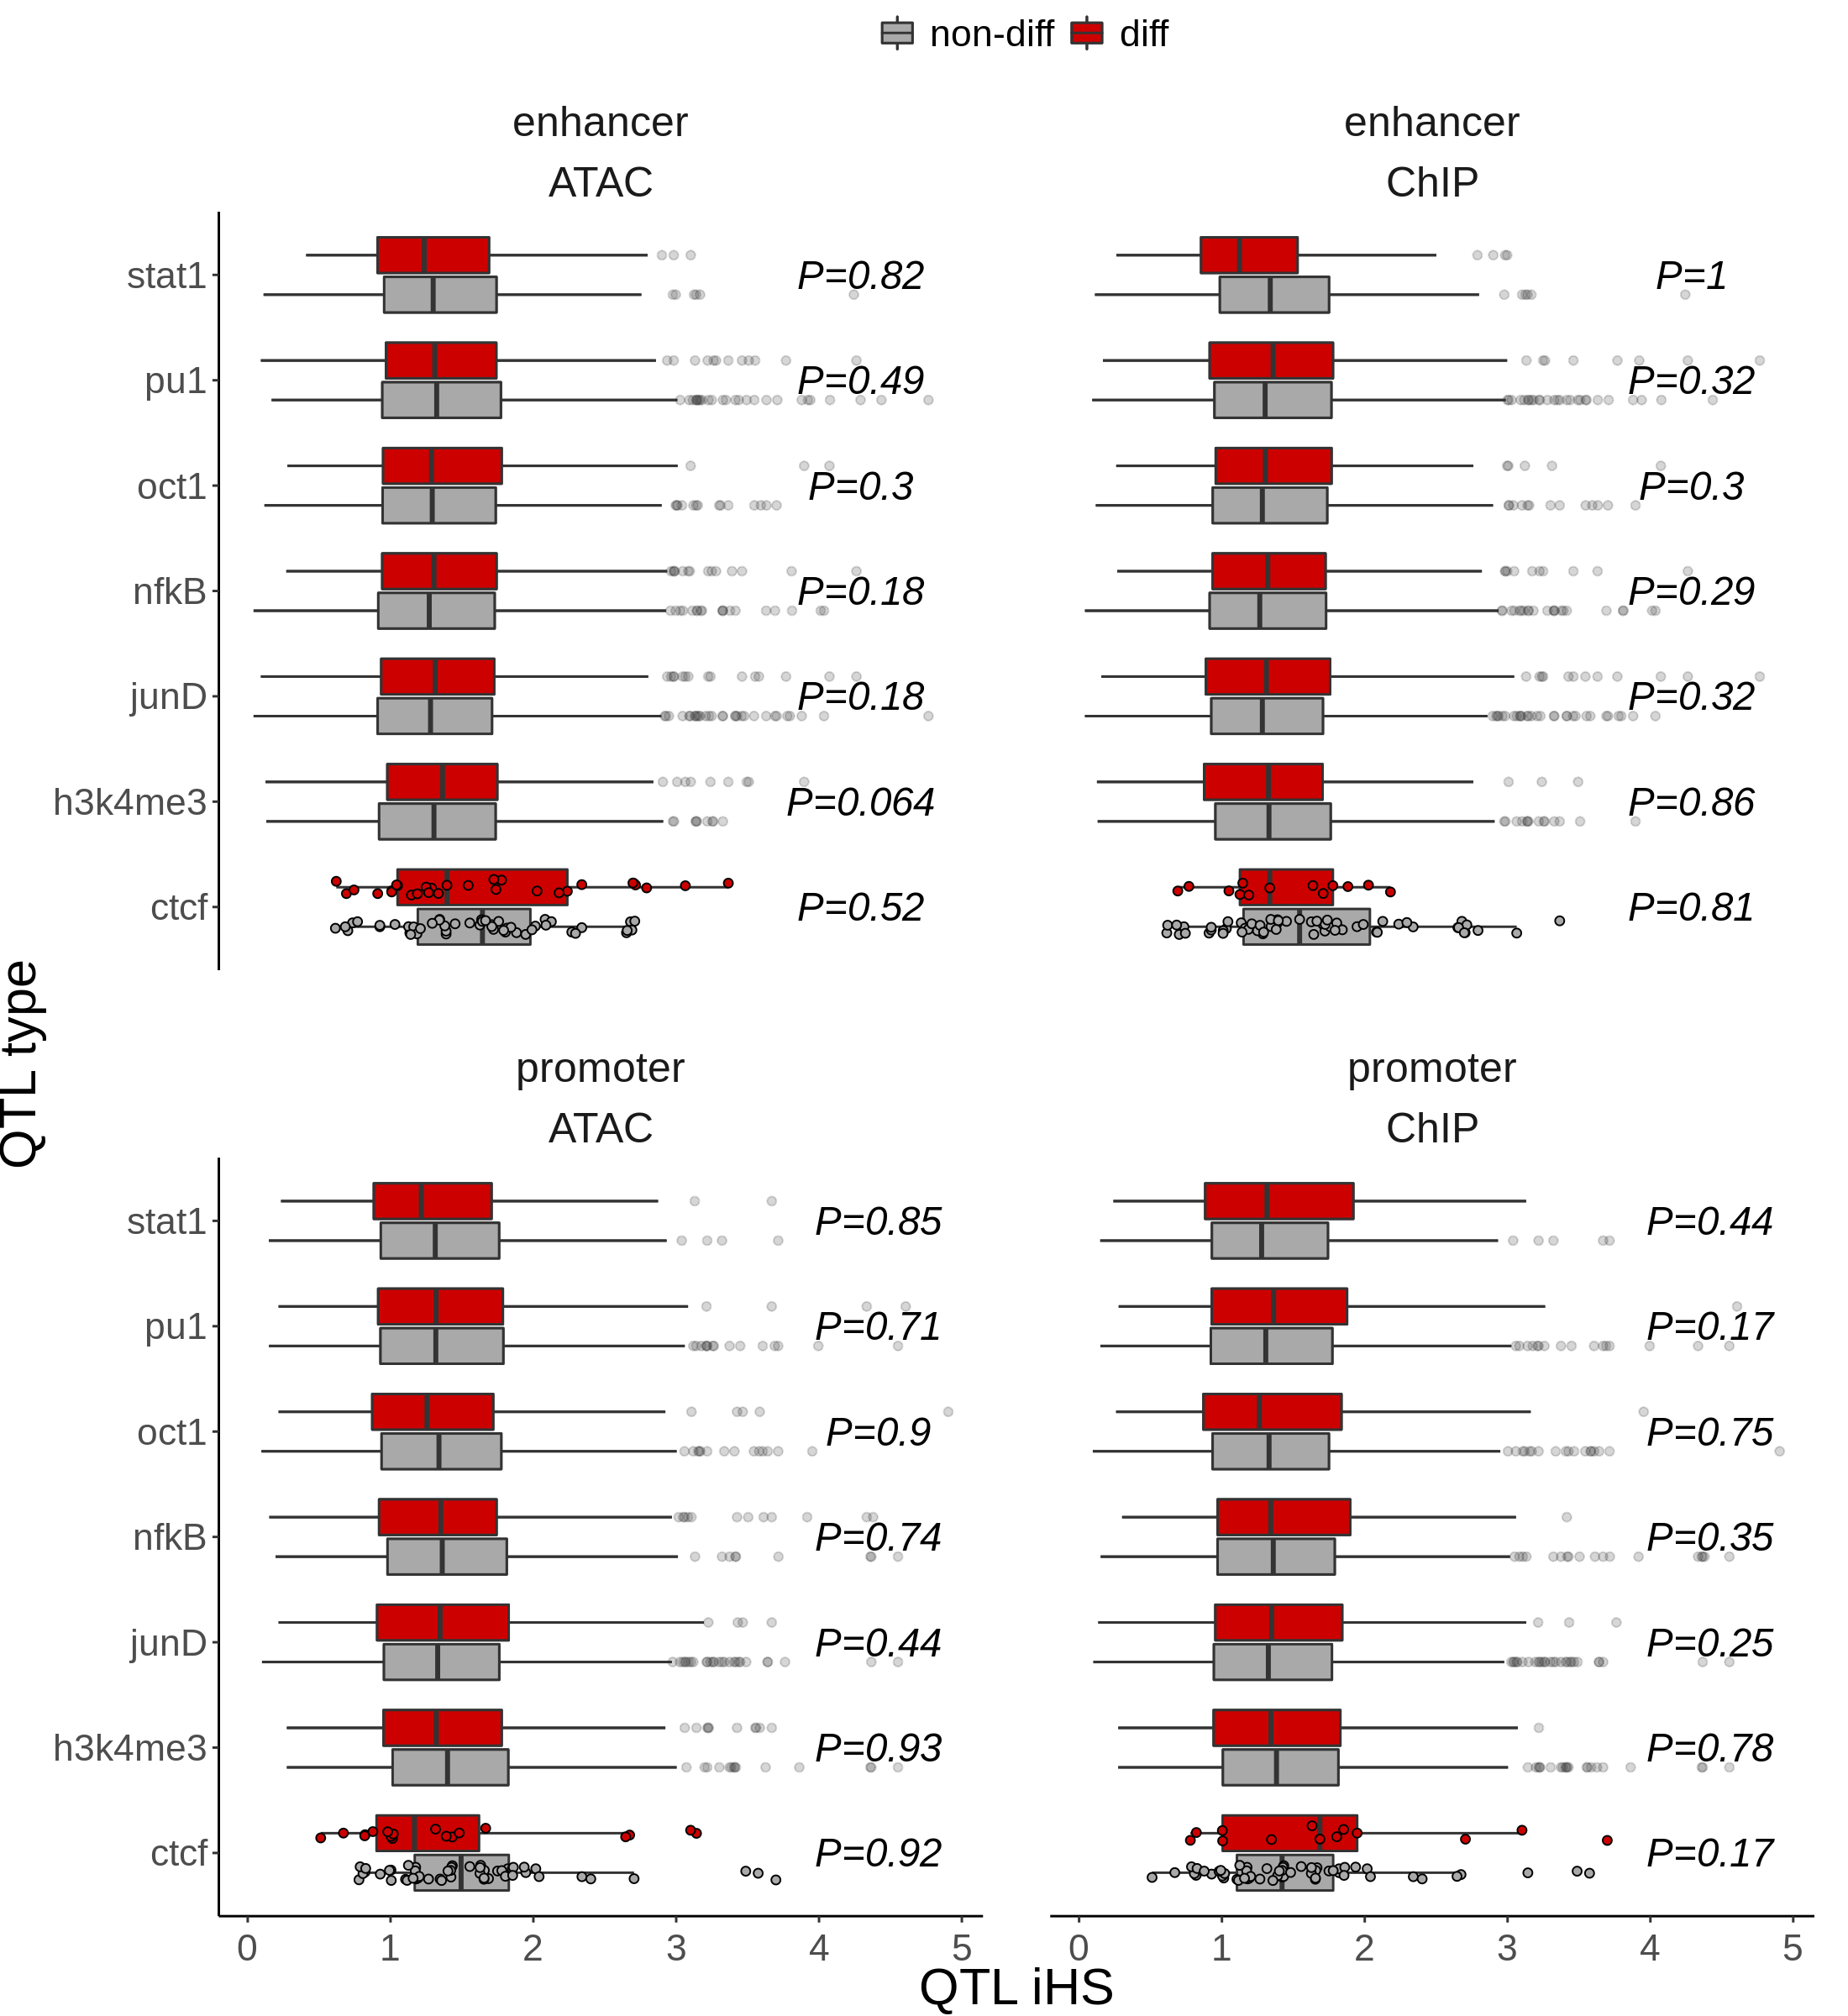

In [49]:
p18 <- groupedBoxplot(biw %>% 
                        mutate(diff_status = fct_relevel(diff_status,c('non-diff','diff'))) %>%
                        dplyr::filter(qtl_type=='bqtl',
                            score_type %in% c('ATAC','ChIP')),
             'chip_type',
             'fst_var',
             groupvar='diff_status',
             xlab='QTL type',
             ylab='QTL iHS',
             plotpoints=TRUE,
             show_wilcox=TRUE,
             pvalsize=6,
             nominal_p_only=FALSE,
             legtextsize=16,
             alt='less',
             logscale=FALSE,
             colorX=FALSE,
             colorvals=c('darkgray','red3'),
             showleg=TRUE,
             legendpos='top',
             horizontal=TRUE,
             facets=c('cre_type','score_type'),
             frows=2,
             fscales='fixed',
             fdir='h',
             w=11,h=12,
             angleHjVj=c(0,.5,0),
             debug=FALSE) +
          theme(legend.title = element_blank()) +
#         ggtitle("Ancestry divergence of select TF bQTL allele\nfrequency is greater in diff-ATAC enhancers") +
        theme(plot.title = element_text(size=30, hjust=0, margin=margin(5,0,15,0)))
p18

# ggsave(
#     file.path(
#         outdir, 
#         'Fig4a.png'
#     ),
#     width=11, 
#     height=12
# )